# 11 - Neural Networks 
## Part 1 - XOR
1. Using the XOR dataset below, train (400 epochs) a neural network (NN) using 1, 2, 3, 4, and 5 hidden layers (where each layer has only 2 neurons). For each n layers, store the resulting loss score along with n. Plot the results to find what the optimal number of layers is.
2. Repeat the above with 3-neuron and 4-neuron Hidden layers. How do these results compare to the 2 neuron layers?
3. Using the most optimal configuraion (n-layers, k-neurons per layer), compare how `tanh`, `sigmoid`,`softplus` and `relu` effect the loss after 400 epochs. Try other Activation functions as well (https://keras.io/activations/)
4. Instead of `SGD` try other optimizers and report on the loss score. (https://keras.io/optimizers/)

In [727]:
!pip3 install tensorflow keras

In [770]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD  #Stochastic Gradient Descent

import numpy as np
import pandas as pd
# fix random seed for reproducibility
np.random.seed(7)

import matplotlib.pyplot as plt
%matplotlib inline

In [771]:
n = 40
xx = np.random.random((n,1))
yy = np.random.random((n,1))

In [772]:
X = np.array([np.array([xx,-xx,-xx,xx]),np.array([yy,-yy,yy,-yy])]).reshape(2,4*n).T
y = np.array([np.ones([2*n]),np.zeros([2*n])]).reshape(4*n)

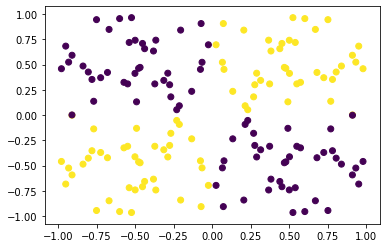

In [773]:
plt.scatter(*zip(*X), c=y)

### Loop to test different number of layers

In [774]:
scores = pd.DataFrame(np.zeros([5,1]), columns = ['score'], index = range(1,6))

for i in range(1,6):
    model = Sequential()
    for j in range(0,i):
        model.add(Dense(2, input_dim=2, activation='tanh'))
    model.add(Dense(1, input_dim=2, activation='tanh'))
    model.summary()
    sgd = SGD(lr=0.1)
    model.compile(loss='binary_crossentropy', optimizer='sgd')
    model.fit(X, y, batch_size=4, epochs=400) 
    scores.loc[i] = model.evaluate(X, y)

Model: "sequential_402"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1127 (Dense)           (None, 2)                 6         
_________________________________________________________________
dense_1128 (Dense)           (None, 1)                 3         
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________
Epoch 1/400
160/160 [==============================] - 0s 946us/step - loss: 2.0350
Epoch 2/400
160/160 [==============================] - 0s 512us/step - loss: 1.2079
Epoch 3/400
160/160 [==============================] - 0s 383us/step - loss: 0.8390
Epoch 4/400
160/160 [==============================] - 0s 508us/step - loss: 0.7437
Epoch 5/400
160/160 [==============================] - 0s 370us/step - loss: 0.7227
Epoch 6/400
160/160 [==============================] - 0s 569us/step - loss: 0.7157
Epoch 7/400
160/

160/160 [==============================] - 0s 466us/step - loss: 0.3527
Epoch 91/400
160/160 [==============================] - 0s 478us/step - loss: 0.3298
Epoch 92/400
160/160 [==============================] - 0s 487us/step - loss: 0.3274
Epoch 93/400
160/160 [==============================] - 0s 369us/step - loss: 0.3403
Epoch 94/400
160/160 [==============================] - 0s 408us/step - loss: 0.3232
Epoch 95/400
160/160 [==============================] - 0s 447us/step - loss: 0.3205
Epoch 96/400
160/160 [==============================] - 0s 499us/step - loss: 0.3236
Epoch 97/400
160/160 [==============================] - 0s 419us/step - loss: 0.3171
Epoch 98/400
160/160 [==============================] - 0s 403us/step - loss: 0.3496
Epoch 99/400
160/160 [==============================] - 0s 392us/step - loss: 0.3182
Epoch 100/400
160/160 [==============================] - 0s 409us/step - loss: 0.3220
Epoch 101/400
160/160 [==============================] - 0s 600us/step - loss

160/160 [==============================] - 0s 463us/step - loss: 0.4063
Epoch 186/400
160/160 [==============================] - 0s 500us/step - loss: 0.3828
Epoch 187/400
160/160 [==============================] - 0s 403us/step - loss: 0.3763
Epoch 188/400
160/160 [==============================] - 0s 436us/step - loss: 0.3736
Epoch 189/400
160/160 [==============================] - 0s 416us/step - loss: 0.3630
Epoch 190/400
160/160 [==============================] - 0s 387us/step - loss: 0.5816
Epoch 191/400
160/160 [==============================] - 0s 412us/step - loss: 0.6795
Epoch 192/400
160/160 [==============================] - 0s 428us/step - loss: 0.4045
Epoch 193/400
160/160 [==============================] - 0s 399us/step - loss: 0.3573
Epoch 194/400
160/160 [==============================] - 0s 345us/step - loss: 0.3676
Epoch 195/400
160/160 [==============================] - 0s 420us/step - loss: 0.3906
Epoch 196/400
160/160 [==============================] - 0s 407us/st

160/160 [==============================] - 0s 570us/step - loss: 0.3777
Epoch 281/400
160/160 [==============================] - 0s 914us/step - loss: 0.3158
Epoch 282/400
160/160 [==============================] - 0s 690us/step - loss: 0.3097
Epoch 283/400
160/160 [==============================] - 0s 459us/step - loss: 0.3966
Epoch 284/400
160/160 [==============================] - 0s 462us/step - loss: 0.4907
Epoch 285/400
160/160 [==============================] - 0s 663us/step - loss: 0.3663
Epoch 286/400
160/160 [==============================] - 0s 581us/step - loss: 0.3996
Epoch 287/400
160/160 [==============================] - 0s 538us/step - loss: 0.3131
Epoch 288/400
160/160 [==============================] - 0s 731us/step - loss: 0.3509
Epoch 289/400
160/160 [==============================] - 0s 604us/step - loss: 0.3154
Epoch 290/400
160/160 [==============================] - 0s 620us/step - loss: 0.3166
Epoch 291/400
160/160 [==============================] - 0s 625us/st

160/160 [==============================] - 0s 440us/step - loss: 0.7787
Epoch 376/400
160/160 [==============================] - 0s 557us/step - loss: 0.7276
Epoch 377/400
160/160 [==============================] - 0s 480us/step - loss: 0.7054
Epoch 378/400
160/160 [==============================] - 0s 905us/step - loss: 0.6940
Epoch 379/400
160/160 [==============================] - 0s 531us/step - loss: 0.6917
Epoch 380/400
160/160 [==============================] - 0s 469us/step - loss: 0.6870
Epoch 381/400
160/160 [==============================] - 0s 603us/step - loss: 0.6881
Epoch 382/400
160/160 [==============================] - 0s 611us/step - loss: 0.6875
Epoch 383/400
160/160 [==============================] - 0s 643us/step - loss: 0.6857
Epoch 384/400
160/160 [==============================] - 0s 724us/step - loss: 0.6854
Epoch 385/400
160/160 [==============================] - 0s 576us/step - loss: 0.6831
Epoch 386/400
160/160 [==============================] - 0s 423us/st

Epoch 62/400
160/160 [==============================] - 0s 575us/step - loss: 0.2417
Epoch 63/400
160/160 [==============================] - 0s 432us/step - loss: 0.2416
Epoch 64/400
160/160 [==============================] - 0s 439us/step - loss: 0.2387
Epoch 65/400
160/160 [==============================] - 0s 392us/step - loss: 0.2353
Epoch 66/400
160/160 [==============================] - 0s 420us/step - loss: 0.2323
Epoch 67/400
160/160 [==============================] - 0s 423us/step - loss: 0.2287
Epoch 68/400
160/160 [==============================] - 0s 438us/step - loss: 0.2264
Epoch 69/400
160/160 [==============================] - 0s 399us/step - loss: 0.2243
Epoch 70/400
160/160 [==============================] - 0s 442us/step - loss: 0.2221
Epoch 71/400
160/160 [==============================] - 0s 398us/step - loss: 0.2192
Epoch 72/400
160/160 [==============================] - 0s 419us/step - loss: 0.2173
Epoch 73/400
160/160 [==============================] - 0s 434us/

160/160 [==============================] - 0s 530us/step - loss: 0.0728
Epoch 158/400
160/160 [==============================] - 0s 926us/step - loss: 0.0726
Epoch 159/400
160/160 [==============================] - 0s 896us/step - loss: 0.0718
Epoch 160/400
160/160 [==============================] - 0s 787us/step - loss: 0.0715
Epoch 161/400
160/160 [==============================] - 0s 787us/step - loss: 0.0702
Epoch 162/400
160/160 [==============================] - 0s 751us/step - loss: 0.0686
Epoch 163/400
160/160 [==============================] - 0s 702us/step - loss: 0.0691
Epoch 164/400
160/160 [==============================] - 0s 559us/step - loss: 0.0673
Epoch 165/400
160/160 [==============================] - 0s 458us/step - loss: 0.0678
Epoch 166/400
160/160 [==============================] - 0s 427us/step - loss: 0.0666
Epoch 167/400
160/160 [==============================] - 0s 410us/step - loss: 0.0668
Epoch 168/400
160/160 [==============================] - 0s 407us/st

160/160 [==============================] - 0s 613us/step - loss: 0.0395
Epoch 253/400
160/160 [==============================] - 0s 693us/step - loss: 0.0388
Epoch 254/400
160/160 [==============================] - 0s 650us/step - loss: 0.0395
Epoch 255/400
160/160 [==============================] - 0s 804us/step - loss: 0.0388
Epoch 256/400
160/160 [==============================] - 0s 610us/step - loss: 0.0376
Epoch 257/400
160/160 [==============================] - 0s 745us/step - loss: 0.0386
Epoch 258/400
160/160 [==============================] - 0s 593us/step - loss: 0.0376
Epoch 259/400
160/160 [==============================] - 0s 495us/step - loss: 0.0383
Epoch 260/400
160/160 [==============================] - 0s 397us/step - loss: 0.0389
Epoch 261/400
160/160 [==============================] - 0s 410us/step - loss: 0.0381
Epoch 262/400
160/160 [==============================] - 0s 416us/step - loss: 0.0382
Epoch 263/400
160/160 [==============================] - 0s 443us/st

160/160 [==============================] - 0s 768us/step - loss: 0.0307
Epoch 348/400
160/160 [==============================] - 0s 822us/step - loss: 0.0292
Epoch 349/400
160/160 [==============================] - 0s 645us/step - loss: 0.0295
Epoch 350/400
160/160 [==============================] - 0s 700us/step - loss: 0.0303
Epoch 351/400
160/160 [==============================] - 0s 562us/step - loss: 0.0304
Epoch 352/400
160/160 [==============================] - 0s 926us/step - loss: 0.0299
Epoch 353/400
160/160 [==============================] - 0s 756us/step - loss: 0.0298
Epoch 354/400
160/160 [==============================] - 0s 797us/step - loss: 0.0298
Epoch 355/400
160/160 [==============================] - 0s 757us/step - loss: 0.0299
Epoch 356/400
160/160 [==============================] - 0s 827us/step - loss: 0.0301
Epoch 357/400
160/160 [==============================] - 0s 792us/step - loss: 0.0298
Epoch 358/400
160/160 [==============================] - 0s 602us/st

160/160 [==============================] - 0s 480us/step - loss: 3.9320
Epoch 33/400
160/160 [==============================] - 0s 513us/step - loss: 3.9282
Epoch 34/400
160/160 [==============================] - 0s 395us/step - loss: 3.9294
Epoch 35/400
160/160 [==============================] - 0s 396us/step - loss: 3.9281
Epoch 36/400
160/160 [==============================] - 0s 459us/step - loss: 3.9265
Epoch 37/400
160/160 [==============================] - 0s 425us/step - loss: 3.9245
Epoch 38/400
160/160 [==============================] - 0s 436us/step - loss: 3.9247
Epoch 39/400
160/160 [==============================] - 0s 419us/step - loss: 3.9224
Epoch 40/400
160/160 [==============================] - 0s 498us/step - loss: 3.9170
Epoch 41/400
160/160 [==============================] - 0s 524us/step - loss: 3.9184
Epoch 42/400
160/160 [==============================] - 0s 403us/step - loss: 3.9158
Epoch 43/400
160/160 [==============================] - 0s 472us/step - loss: 

160/160 [==============================] - 0s 745us/step - loss: 3.8833
Epoch 129/400
160/160 [==============================] - 0s 700us/step - loss: 3.8851
Epoch 130/400
160/160 [==============================] - 0s 638us/step - loss: 3.8850
Epoch 131/400
160/160 [==============================] - 0s 884us/step - loss: 3.8804
Epoch 132/400
160/160 [==============================] - 0s 624us/step - loss: 3.8829
Epoch 133/400
160/160 [==============================] - 0s 831us/step - loss: 3.8830
Epoch 134/400
160/160 [==============================] - 0s 686us/step - loss: 3.8827
Epoch 135/400
160/160 [==============================] - 0s 727us/step - loss: 3.8792
Epoch 136/400
160/160 [==============================] - 0s 626us/step - loss: 3.8837
Epoch 137/400
160/160 [==============================] - 0s 636us/step - loss: 3.8841
Epoch 138/400
160/160 [==============================] - 0s 781us/step - loss: 3.8816
Epoch 139/400
160/160 [==============================] - 0s 650us/st

160/160 [==============================] - 0s 645us/step - loss: 3.8746
Epoch 224/400
160/160 [==============================] - 0s 471us/step - loss: 3.8745
Epoch 225/400
160/160 [==============================] - 0s 1ms/step - loss: 3.8801
Epoch 226/400
160/160 [==============================] - 0s 808us/step - loss: 3.8817
Epoch 227/400
160/160 [==============================] - 0s 615us/step - loss: 3.8790
Epoch 228/400
160/160 [==============================] - 0s 510us/step - loss: 3.8797
Epoch 229/400
160/160 [==============================] - 0s 541us/step - loss: 3.8790
Epoch 230/400
160/160 [==============================] - 0s 610us/step - loss: 3.8834
Epoch 231/400
160/160 [==============================] - 0s 642us/step - loss: 3.8802
Epoch 232/400
160/160 [==============================] - 0s 626us/step - loss: 3.8787
Epoch 233/400
160/160 [==============================] - 0s 796us/step - loss: 3.8758
Epoch 234/400
160/160 [==============================] - 0s 835us/step

160/160 [==============================] - 0s 529us/step - loss: 3.8791
Epoch 319/400
160/160 [==============================] - 0s 426us/step - loss: 3.8736
Epoch 320/400
160/160 [==============================] - 0s 439us/step - loss: 3.8810
Epoch 321/400
160/160 [==============================] - 0s 452us/step - loss: 3.8747
Epoch 322/400
160/160 [==============================] - 0s 450us/step - loss: 3.8745
Epoch 323/400
160/160 [==============================] - 0s 422us/step - loss: 3.8715
Epoch 324/400
160/160 [==============================] - 0s 455us/step - loss: 3.8763
Epoch 325/400
160/160 [==============================] - 0s 440us/step - loss: 3.8792
Epoch 326/400
160/160 [==============================] - 0s 412us/step - loss: 3.8776
Epoch 327/400
160/160 [==============================] - 0s 444us/step - loss: 3.8788
Epoch 328/400
160/160 [==============================] - 0s 404us/step - loss: 3.8826
Epoch 329/400
160/160 [==============================] - 0s 422us/st

160/160 [==============================] - 0s 1ms/step - loss: 0.8112
Epoch 2/400
160/160 [==============================] - 0s 487us/step - loss: 0.6562
Epoch 3/400
160/160 [==============================] - 0s 486us/step - loss: 0.6444
Epoch 4/400
160/160 [==============================] - 0s 482us/step - loss: 0.6334
Epoch 5/400
160/160 [==============================] - 0s 1ms/step - loss: 0.6238
Epoch 6/400
160/160 [==============================] - 0s 769us/step - loss: 0.6113
Epoch 7/400
160/160 [==============================] - 0s 723us/step - loss: 0.6026
Epoch 8/400
160/160 [==============================] - 0s 637us/step - loss: 0.5922
Epoch 9/400
160/160 [==============================] - 0s 585us/step - loss: 0.5887
Epoch 10/400
160/160 [==============================] - 0s 507us/step - loss: 0.5849
Epoch 11/400
160/160 [==============================] - 0s 635us/step - loss: 0.5841
Epoch 12/400
160/160 [==============================] - 0s 800us/step - loss: 0.5825
Epoch

160/160 [==============================] - 0s 739us/step - loss: 0.2642
Epoch 98/400
160/160 [==============================] - 0s 652us/step - loss: 0.2634
Epoch 99/400
160/160 [==============================] - 0s 619us/step - loss: 0.2898
Epoch 100/400
160/160 [==============================] - 0s 630us/step - loss: 0.2551
Epoch 101/400
160/160 [==============================] - 0s 863us/step - loss: 0.2552
Epoch 102/400
160/160 [==============================] - 0s 654us/step - loss: 0.2589
Epoch 103/400
160/160 [==============================] - 0s 740us/step - loss: 0.2486
Epoch 104/400
160/160 [==============================] - 0s 686us/step - loss: 0.3092
Epoch 105/400
160/160 [==============================] - 0s 429us/step - loss: 0.2495
Epoch 106/400
160/160 [==============================] - 0s 557us/step - loss: 0.2202
Epoch 107/400
160/160 [==============================] - 0s 611us/step - loss: 0.2159
Epoch 108/400
160/160 [==============================] - 0s 866us/step

160/160 [==============================] - 0s 592us/step - loss: 0.0522
Epoch 193/400
160/160 [==============================] - 0s 483us/step - loss: 0.0535
Epoch 194/400
160/160 [==============================] - 0s 493us/step - loss: 0.0546
Epoch 195/400
160/160 [==============================] - 0s 819us/step - loss: 0.0523
Epoch 196/400
160/160 [==============================] - 0s 784us/step - loss: 0.0512
Epoch 197/400
160/160 [==============================] - 0s 633us/step - loss: 0.0539
Epoch 198/400
160/160 [==============================] - 0s 643us/step - loss: 0.0520
Epoch 199/400
160/160 [==============================] - 0s 481us/step - loss: 0.0495
Epoch 200/400
160/160 [==============================] - 0s 632us/step - loss: 0.0494
Epoch 201/400
160/160 [==============================] - 0s 800us/step - loss: 0.0496
Epoch 202/400
160/160 [==============================] - 0s 619us/step - loss: 0.0458
Epoch 203/400
160/160 [==============================] - 0s 763us/st

160/160 [==============================] - 0s 811us/step - loss: 0.0408
Epoch 288/400
160/160 [==============================] - 0s 635us/step - loss: 0.0408
Epoch 289/400
160/160 [==============================] - 0s 593us/step - loss: 0.0458
Epoch 290/400
160/160 [==============================] - 0s 485us/step - loss: 0.0347
Epoch 291/400
160/160 [==============================] - 0s 414us/step - loss: 0.0416
Epoch 292/400
160/160 [==============================] - 0s 465us/step - loss: 0.0434
Epoch 293/400
160/160 [==============================] - 0s 467us/step - loss: 0.0370
Epoch 294/400
160/160 [==============================] - 0s 430us/step - loss: 0.0432
Epoch 295/400
160/160 [==============================] - 0s 450us/step - loss: 0.0356
Epoch 296/400
160/160 [==============================] - 0s 1ms/step - loss: 0.0381
Epoch 297/400
160/160 [==============================] - 0s 800us/step - loss: 0.0379
Epoch 298/400
160/160 [==============================] - 0s 817us/step

160/160 [==============================] - 0s 559us/step - loss: 0.0347
Epoch 383/400
160/160 [==============================] - 0s 705us/step - loss: 0.0312
Epoch 384/400
160/160 [==============================] - 0s 510us/step - loss: 0.0311
Epoch 385/400
160/160 [==============================] - 0s 541us/step - loss: 0.0375
Epoch 386/400
160/160 [==============================] - 0s 595us/step - loss: 0.0385
Epoch 387/400
160/160 [==============================] - 0s 513us/step - loss: 0.0319
Epoch 388/400
160/160 [==============================] - 0s 525us/step - loss: 0.0365
Epoch 389/400
160/160 [==============================] - 0s 549us/step - loss: 0.0363
Epoch 390/400
160/160 [==============================] - 0s 560us/step - loss: 0.0310
Epoch 391/400
160/160 [==============================] - ETA: 0s - loss: 0.083 - 0s 484us/step - loss: 0.0627
Epoch 392/400
160/160 [==============================] - 0s 419us/step - loss: 0.0443
Epoch 393/400
160/160 [=====================

160/160 [==============================] - 0s 445us/step - loss: 0.7023
Epoch 65/400
160/160 [==============================] - 0s 510us/step - loss: 0.6970
Epoch 66/400
160/160 [==============================] - 0s 417us/step - loss: 0.6979
Epoch 67/400
160/160 [==============================] - 0s 484us/step - loss: 0.7017
Epoch 68/400
160/160 [==============================] - 0s 508us/step - loss: 0.6984
Epoch 69/400
160/160 [==============================] - 0s 503us/step - loss: 0.6943
Epoch 70/400
160/160 [==============================] - 0s 489us/step - loss: 0.6945
Epoch 71/400
160/160 [==============================] - 0s 524us/step - loss: 0.6963
Epoch 72/400
160/160 [==============================] - 0s 468us/step - loss: 0.6952
Epoch 73/400
160/160 [==============================] - 0s 506us/step - loss: 0.7005
Epoch 74/400
160/160 [==============================] - 0s 536us/step - loss: 0.6978
Epoch 75/400
160/160 [==============================] - 0s 658us/step - loss: 

160/160 [==============================] - 0s 534us/step - loss: 0.6110
Epoch 160/400
160/160 [==============================] - 0s 449us/step - loss: 0.6123
Epoch 161/400
160/160 [==============================] - 0s 473us/step - loss: 0.6082
Epoch 162/400
160/160 [==============================] - 0s 483us/step - loss: 0.6029
Epoch 163/400
160/160 [==============================] - 0s 462us/step - loss: 0.6034
Epoch 164/400
160/160 [==============================] - 0s 477us/step - loss: 0.6011
Epoch 165/400
160/160 [==============================] - 0s 480us/step - loss: 0.5971
Epoch 166/400
160/160 [==============================] - 0s 498us/step - loss: 0.6033
Epoch 167/400
160/160 [==============================] - 0s 499us/step - loss: 0.6030
Epoch 168/400
160/160 [==============================] - 0s 514us/step - loss: 0.5983
Epoch 169/400
160/160 [==============================] - 0s 507us/step - loss: 0.5896
Epoch 170/400
160/160 [==============================] - 0s 515us/st

160/160 [==============================] - 0s 458us/step - loss: 0.5816
Epoch 255/400
160/160 [==============================] - 0s 556us/step - loss: 0.5835
Epoch 256/400
160/160 [==============================] - 0s 586us/step - loss: 0.5847
Epoch 257/400
160/160 [==============================] - 0s 873us/step - loss: 0.5843
Epoch 258/400
160/160 [==============================] - 0s 673us/step - loss: 0.5842
Epoch 259/400
160/160 [==============================] - 0s 447us/step - loss: 0.5854
Epoch 260/400
160/160 [==============================] - 0s 603us/step - loss: 0.5851
Epoch 261/400
160/160 [==============================] - 0s 616us/step - loss: 0.5855
Epoch 262/400
160/160 [==============================] - 0s 691us/step - loss: 0.5843
Epoch 263/400
160/160 [==============================] - 0s 812us/step - loss: 0.5826
Epoch 264/400
160/160 [==============================] - 0s 710us/step - loss: 0.5840
Epoch 265/400
160/160 [==============================] - 0s 755us/st

160/160 [==============================] - 0s 717us/step - loss: 0.5829
Epoch 350/400
160/160 [==============================] - 0s 567us/step - loss: 0.5849
Epoch 351/400
160/160 [==============================] - 0s 500us/step - loss: 0.5848
Epoch 352/400
160/160 [==============================] - 0s 617us/step - loss: 0.5833
Epoch 353/400
160/160 [==============================] - 0s 789us/step - loss: 0.5845
Epoch 354/400
160/160 [==============================] - 0s 904us/step - loss: 0.5816
Epoch 355/400
160/160 [==============================] - 0s 964us/step - loss: 0.5844
Epoch 356/400
160/160 [==============================] - 0s 736us/step - loss: 0.5764
Epoch 357/400
160/160 [==============================] - 0s 706us/step - loss: 0.5851
Epoch 358/400
160/160 [==============================] - 0s 634us/step - loss: 0.5825
Epoch 359/400
160/160 [==============================] - 0s 804us/step - loss: 0.5819
Epoch 360/400
160/160 [==============================] - 0s 1ms/step

In [775]:
scores

,score
1,0.550530
2,0.024138
3,3.871407
4,0.024151
5,0.579312


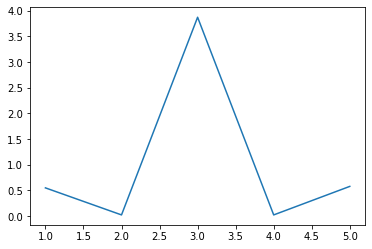

In [776]:
plt.plot(scores)

#### Result
4 layers perform best

### Test for Number of Neurons

In [777]:
scores_round2 = pd.DataFrame(np.zeros([4,1]), columns = ['score'], index = range(2,6))

for i in range(2,6):
    model = Sequential()
    model.add(Dense(i, input_dim=2, activation='tanh'))
    model.add(Dense(i, input_dim=2, activation='tanh'))
    model.add(Dense(i, input_dim=2, activation='tanh'))
    model.add(Dense(i, input_dim=2, activation='tanh'))
    model.add(Dense(1, input_dim=2, activation='tanh'))
    model.summary()
    sgd = SGD(lr=0.1)
    model.compile(loss='binary_crossentropy', optimizer='sgd')
    model.fit(X, y, batch_size=4, epochs=400) 
    scores_round2.loc[i] = model.evaluate(X, y)
    
scores_round2

Model: "sequential_407"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1147 (Dense)           (None, 2)                 6         
_________________________________________________________________
dense_1148 (Dense)           (None, 2)                 6         
_________________________________________________________________
dense_1149 (Dense)           (None, 2)                 6         
_________________________________________________________________
dense_1150 (Dense)           (None, 2)                 6         
_________________________________________________________________
dense_1151 (Dense)           (None, 1)                 3         
Total params: 27
Trainable params: 27
Non-trainable params: 0
_________________________________________________________________
Epoch 1/400
160/160 [==============================] - 0s 1ms/step - loss: 1.3029
Epoch 2/400
160/160 [===================

160/160 [==============================] - 0s 490us/step - loss: 0.5710
Epoch 86/400
160/160 [==============================] - 0s 494us/step - loss: 0.5710
Epoch 87/400
160/160 [==============================] - 0s 497us/step - loss: 0.5703
Epoch 88/400
160/160 [==============================] - 0s 497us/step - loss: 0.5715
Epoch 89/400
160/160 [==============================] - 0s 452us/step - loss: 0.5676
Epoch 90/400
160/160 [==============================] - 0s 445us/step - loss: 0.5705
Epoch 91/400
160/160 [==============================] - 0s 753us/step - loss: 0.5615
Epoch 92/400
160/160 [==============================] - 0s 493us/step - loss: 0.5670
Epoch 93/400
160/160 [==============================] - 0s 531us/step - loss: 0.5638
Epoch 94/400
160/160 [==============================] - 0s 557us/step - loss: 0.5643
Epoch 95/400
160/160 [==============================] - 0s 532us/step - loss: 0.5640
Epoch 96/400
160/160 [==============================] - 0s 420us/step - loss: 

160/160 [==============================] - 0s 2ms/step - loss: 0.0584
Epoch 181/400
160/160 [==============================] - 0s 1ms/step - loss: 0.0552
Epoch 182/400
160/160 [==============================] - 0s 833us/step - loss: 0.0625
Epoch 183/400
160/160 [==============================] - 0s 772us/step - loss: 0.0607
Epoch 184/400
160/160 [==============================] - 0s 881us/step - loss: 0.0576
Epoch 185/400
160/160 [==============================] - 0s 741us/step - loss: 0.0550
Epoch 186/400
160/160 [==============================] - 0s 773us/step - loss: 0.0536
Epoch 187/400
160/160 [==============================] - 0s 597us/step - loss: 0.0554
Epoch 188/400
160/160 [==============================] - 0s 538us/step - loss: 0.0537
Epoch 189/400
160/160 [==============================] - 0s 808us/step - loss: 0.0581
Epoch 190/400
160/160 [==============================] - 0s 1ms/step - loss: 0.0533
Epoch 191/400
160/160 [==============================] - 0s 677us/step - l

160/160 [==============================] - 0s 430us/step - loss: 0.3696
Epoch 276/400
160/160 [==============================] - 0s 351us/step - loss: 0.3685
Epoch 277/400
160/160 [==============================] - 0s 371us/step - loss: 0.3698
Epoch 278/400
160/160 [==============================] - 0s 371us/step - loss: 0.3699
Epoch 279/400
160/160 [==============================] - 0s 772us/step - loss: 0.3704
Epoch 280/400
160/160 [==============================] - 0s 2ms/step - loss: 0.3700A: 0s - loss: 0.3
Epoch 281/400
160/160 [==============================] - 0s 885us/step - loss: 0.3701
Epoch 282/400
160/160 [==============================] - 0s 815us/step - loss: 0.3695
Epoch 283/400
160/160 [==============================] - 0s 815us/step - loss: 0.3680
Epoch 284/400
160/160 [==============================] - 0s 562us/step - loss: 0.3706
Epoch 285/400
160/160 [==============================] - 0s 533us/step - loss: 0.3704
Epoch 286/400
160/160 [==============================

/Users/ben/opt/anaconda3/lib/python3.7/site-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.125012). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


160/160 [==============================] - 0s 1ms/step - loss: 0.3692
Epoch 301/400
160/160 [==============================] - 0s 827us/step - loss: 0.3694
Epoch 302/400
160/160 [==============================] - 0s 858us/step - loss: 0.3676
Epoch 303/400
160/160 [==============================] - 0s 627us/step - loss: 0.3695
Epoch 304/400
160/160 [==============================] - 0s 502us/step - loss: 0.3696
Epoch 305/400
160/160 [==============================] - 0s 2ms/step - loss: 0.3674
Epoch 306/400
160/160 [==============================] - 0s 1ms/step - loss: 0.3667
Epoch 307/400
160/160 [==============================] - 0s 1ms/step - loss: 0.3688
Epoch 308/400
160/160 [==============================] - 0s 820us/step - loss: 0.3691
Epoch 309/400
160/160 [==============================] - 0s 860us/step - loss: 0.3674
Epoch 310/400
160/160 [==============================] - 0s 766us/step - loss: 0.3701
Epoch 311/400
160/160 [==============================] - 0s 991us/step - los

160/160 [==============================] - 0s 685us/step - loss: 0.3641
Epoch 396/400
160/160 [==============================] - 0s 572us/step - loss: 0.3656
Epoch 397/400
160/160 [==============================] - 0s 736us/step - loss: 0.3649
Epoch 398/400
160/160 [==============================] - 0s 625us/step - loss: 0.3649
Epoch 399/400
160/160 [==============================] - 0s 548us/step - loss: 0.3657
Epoch 400/400
160/160 [==============================] - 0s 297us/step
Model: "sequential_408"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1152 (Dense)           (None, 3)                 9         
_________________________________________________________________
dense_1153 (Dense)           (None, 3)                 12        
_________________________________________________________________
dense_1154 (Dense)           (None, 3)                 12        
___________________________

160/160 [==============================] - 0s 510us/step - loss: 0.0596
Epoch 80/400
160/160 [==============================] - 0s 443us/step - loss: 0.0569
Epoch 81/400
160/160 [==============================] - 0s 1ms/step - loss: 0.0557
Epoch 82/400
160/160 [==============================] - 0s 832us/step - loss: 0.0553
Epoch 83/400
160/160 [==============================] - 0s 794us/step - loss: 0.0541
Epoch 84/400
160/160 [==============================] - 0s 594us/step - loss: 0.0535
Epoch 85/400
160/160 [==============================] - 0s 524us/step - loss: 0.0545
Epoch 86/400
160/160 [==============================] - 0s 507us/step - loss: 0.0512
Epoch 87/400
160/160 [==============================] - 0s 526us/step - loss: 0.0521
Epoch 88/400
160/160 [==============================] - 0s 510us/step - loss: 0.0533
Epoch 89/400
160/160 [==============================] - 0s 619us/step - loss: 0.0509
Epoch 90/400
160/160 [==============================] - 0s 794us/step - loss: 0.

160/160 [==============================] - 0s 749us/step - loss: 0.0364
Epoch 175/400
160/160 [==============================] - 0s 617us/step - loss: 0.0394
Epoch 176/400
160/160 [==============================] - 0s 586us/step - loss: 0.0349
Epoch 177/400
160/160 [==============================] - 0s 557us/step - loss: 0.0381
Epoch 178/400
160/160 [==============================] - 0s 436us/step - loss: 0.0384
Epoch 179/400
160/160 [==============================] - 0s 447us/step - loss: 0.0375
Epoch 180/400
160/160 [==============================] - 0s 500us/step - loss: 0.0360
Epoch 181/400
160/160 [==============================] - 0s 466us/step - loss: 0.0353
Epoch 182/400
160/160 [==============================] - 0s 471us/step - loss: 0.0346
Epoch 183/400
160/160 [==============================] - 0s 423us/step - loss: 0.0337
Epoch 184/400
160/160 [==============================] - 0s 460us/step - loss: 0.0357
Epoch 185/400
160/160 [==============================] - 0s 562us/st

160/160 [==============================] - 0s 603us/step - loss: 0.0334
Epoch 270/400
160/160 [==============================] - 0s 548us/step - loss: 0.0314
Epoch 271/400
160/160 [==============================] - 0s 532us/step - loss: 0.0354
Epoch 272/400
160/160 [==============================] - 0s 523us/step - loss: 0.0328
Epoch 273/400
160/160 [==============================] - 0s 624us/step - loss: 0.0323
Epoch 274/400
160/160 [==============================] - 0s 497us/step - loss: 0.0267
Epoch 275/400
160/160 [==============================] - 0s 487us/step - loss: 0.0294
Epoch 276/400
160/160 [==============================] - 0s 547us/step - loss: 0.0337
Epoch 277/400
160/160 [==============================] - 0s 579us/step - loss: 0.0328
Epoch 278/400
160/160 [==============================] - 0s 518us/step - loss: 0.0295
Epoch 279/400
160/160 [==============================] - 0s 549us/step - loss: 0.0281
Epoch 280/400
160/160 [==============================] - 0s 545us/st

160/160 [==============================] - 0s 377us/step - loss: 0.0278
Epoch 365/400
160/160 [==============================] - 0s 367us/step - loss: 0.0318
Epoch 366/400
160/160 [==============================] - 0s 350us/step - loss: 0.0281
Epoch 367/400
160/160 [==============================] - 0s 345us/step - loss: 0.0302
Epoch 368/400
160/160 [==============================] - 0s 355us/step - loss: 0.0296
Epoch 369/400
160/160 [==============================] - 0s 351us/step - loss: 0.0302
Epoch 370/400
160/160 [==============================] - 0s 350us/step - loss: 0.0321
Epoch 371/400
160/160 [==============================] - 0s 332us/step - loss: 0.0324
Epoch 372/400
160/160 [==============================] - 0s 361us/step - loss: 0.0330
Epoch 373/400
160/160 [==============================] - 0s 363us/step - loss: 0.0311
Epoch 374/400
160/160 [==============================] - 0s 362us/step - loss: 0.0276
Epoch 375/400
160/160 [==============================] - 0s 379us/st

160/160 [==============================] - 0s 366us/step - loss: 0.2455
Epoch 48/400
160/160 [==============================] - 0s 356us/step - loss: 0.2648
Epoch 49/400
160/160 [==============================] - 0s 359us/step - loss: 0.3106
Epoch 50/400
160/160 [==============================] - 0s 379us/step - loss: 0.5221
Epoch 51/400
160/160 [==============================] - 0s 385us/step - loss: 0.2229
Epoch 52/400
160/160 [==============================] - 0s 369us/step - loss: 0.2239
Epoch 53/400
160/160 [==============================] - 0s 362us/step - loss: 0.2083
Epoch 54/400
160/160 [==============================] - 0s 375us/step - loss: 0.2012
Epoch 55/400
160/160 [==============================] - 0s 384us/step - loss: 0.4298
Epoch 56/400
160/160 [==============================] - 0s 360us/step - loss: 0.6383
Epoch 57/400
160/160 [==============================] - 0s 356us/step - loss: 0.2366
Epoch 58/400
160/160 [==============================] - 0s 377us/step - loss: 

160/160 [==============================] - 0s 433us/step - loss: 0.0656
Epoch 144/400
160/160 [==============================] - 0s 426us/step - loss: 0.0744
Epoch 145/400
160/160 [==============================] - 0s 370us/step - loss: 0.0607
Epoch 146/400
160/160 [==============================] - 0s 374us/step - loss: 0.0659
Epoch 147/400
160/160 [==============================] - 0s 452us/step - loss: 0.0764
Epoch 148/400
160/160 [==============================] - 0s 433us/step - loss: 0.0700
Epoch 149/400
160/160 [==============================] - 0s 372us/step - loss: 0.0631
Epoch 150/400
160/160 [==============================] - 0s 500us/step - loss: 0.0597
Epoch 151/400
160/160 [==============================] - 0s 443us/step - loss: 0.0584
Epoch 152/400
160/160 [==============================] - 0s 366us/step - loss: 0.0633
Epoch 153/400
160/160 [==============================] - 0s 449us/step - loss: 0.0585
Epoch 154/400
160/160 [==============================] - 0s 439us/st

160/160 [==============================] - 0s 360us/step - loss: 0.0373
Epoch 239/400
160/160 [==============================] - 0s 368us/step - loss: 0.0355
Epoch 240/400
160/160 [==============================] - 0s 366us/step - loss: 0.0335
Epoch 241/400
160/160 [==============================] - 0s 372us/step - loss: 0.0405
Epoch 242/400
160/160 [==============================] - 0s 367us/step - loss: 0.0355
Epoch 243/400
160/160 [==============================] - 0s 396us/step - loss: 0.0513
Epoch 244/400
160/160 [==============================] - 0s 377us/step - loss: 0.0400
Epoch 245/400
160/160 [==============================] - 0s 398us/step - loss: 0.0381
Epoch 246/400
160/160 [==============================] - 0s 370us/step - loss: 0.0421
Epoch 247/400
160/160 [==============================] - 0s 415us/step - loss: 0.0391
Epoch 248/400
160/160 [==============================] - 0s 381us/step - loss: 0.0396
Epoch 249/400
160/160 [==============================] - 0s 381us/st

160/160 [==============================] - 0s 369us/step - loss: 0.0415
Epoch 334/400
160/160 [==============================] - 0s 373us/step - loss: 0.0345
Epoch 335/400
160/160 [==============================] - 0s 371us/step - loss: 0.0302
Epoch 336/400
160/160 [==============================] - 0s 367us/step - loss: 0.0331
Epoch 337/400
160/160 [==============================] - 0s 369us/step - loss: 0.0325
Epoch 338/400
160/160 [==============================] - 0s 368us/step - loss: 0.0371
Epoch 339/400
160/160 [==============================] - 0s 374us/step - loss: 0.0337
Epoch 340/400
160/160 [==============================] - 0s 386us/step - loss: 0.0341
Epoch 341/400
160/160 [==============================] - 0s 372us/step - loss: 0.0305
Epoch 342/400
160/160 [==============================] - 0s 371us/step - loss: 0.0361
Epoch 343/400
160/160 [==============================] - 0s 373us/step - loss: 0.0319
Epoch 344/400
160/160 [==============================] - 0s 370us/st

160/160 [==============================] - 0s 381us/step - loss: 0.3828
Epoch 17/400
160/160 [==============================] - 0s 384us/step - loss: 0.3510
Epoch 18/400
160/160 [==============================] - 0s 369us/step - loss: 0.3271
Epoch 19/400
160/160 [==============================] - 0s 375us/step - loss: 0.3035
Epoch 20/400
160/160 [==============================] - 0s 370us/step - loss: 0.2990
Epoch 21/400
160/160 [==============================] - 0s 388us/step - loss: 0.2898
Epoch 22/400
160/160 [==============================] - 0s 386us/step - loss: 0.3159
Epoch 23/400
160/160 [==============================] - 0s 380us/step - loss: 0.2684
Epoch 24/400
160/160 [==============================] - 0s 365us/step - loss: 0.2809
Epoch 25/400
160/160 [==============================] - 0s 379us/step - loss: 0.2601
Epoch 26/400
160/160 [==============================] - 0s 371us/step - loss: 0.2589
Epoch 27/400
160/160 [==============================] - 0s 372us/step - loss: 

160/160 [==============================] - 0s 923us/step - loss: 0.0440
Epoch 113/400
160/160 [==============================] - 0s 668us/step - loss: 0.0437
Epoch 114/400
160/160 [==============================] - 0s 614us/step - loss: 0.0424
Epoch 115/400
160/160 [==============================] - 0s 588us/step - loss: 0.0469
Epoch 116/400
160/160 [==============================] - 0s 622us/step - loss: 0.0456
Epoch 117/400
160/160 [==============================] - 0s 1ms/step - loss: 0.0461
Epoch 118/400
160/160 [==============================] - 0s 938us/step - loss: 0.0421
Epoch 119/400
160/160 [==============================] - 0s 956us/step - loss: 0.0457
Epoch 120/400
160/160 [==============================] - 0s 575us/step - loss: 0.0388
Epoch 121/400
160/160 [==============================] - 0s 481us/step - loss: 0.3713
Epoch 122/400
160/160 [==============================] - 0s 496us/step - loss: 0.1430
Epoch 123/400
160/160 [==============================] - 0s 486us/step

160/160 [==============================] - 0s 681us/step - loss: 0.0307
Epoch 208/400
160/160 [==============================] - 0s 649us/step - loss: 0.0343
Epoch 209/400
160/160 [==============================] - 0s 777us/step - loss: 0.0332
Epoch 210/400
160/160 [==============================] - 0s 749us/step - loss: 0.0377
Epoch 211/400
160/160 [==============================] - 0s 512us/step - loss: 0.0295
Epoch 212/400
160/160 [==============================] - 0s 532us/step - loss: 0.0412
Epoch 213/400
160/160 [==============================] - 0s 545us/step - loss: 0.0355
Epoch 214/400
160/160 [==============================] - 0s 570us/step - loss: 0.0327
Epoch 215/400
160/160 [==============================] - 0s 495us/step - loss: 0.0350
Epoch 216/400
160/160 [==============================] - 0s 424us/step - loss: 0.0288
Epoch 217/400
160/160 [==============================] - 0s 548us/step - loss: 0.0365
Epoch 218/400
160/160 [==============================] - 0s 555us/st

160/160 [==============================] - 0s 844us/step - loss: 0.0254
Epoch 303/400
160/160 [==============================] - 0s 755us/step - loss: 0.0267
Epoch 304/400
160/160 [==============================] - 0s 867us/step - loss: 0.0266
Epoch 305/400
160/160 [==============================] - 0s 812us/step - loss: 0.0280
Epoch 306/400
160/160 [==============================] - 0s 715us/step - loss: 0.0282
Epoch 307/400
160/160 [==============================] - 0s 739us/step - loss: 0.0280
Epoch 308/400
160/160 [==============================] - 0s 703us/step - loss: 0.0267
Epoch 309/400
160/160 [==============================] - 0s 771us/step - loss: 0.0295
Epoch 310/400
160/160 [==============================] - 0s 758us/step - loss: 0.0279
Epoch 311/400
160/160 [==============================] - 0s 755us/step - loss: 0.0271
Epoch 312/400
160/160 [==============================] - 0s 600us/step - loss: 0.0278
Epoch 313/400
160/160 [==============================] - 0s 603us/st

160/160 [==============================] - 0s 672us/step - loss: 0.0246
Epoch 398/400
160/160 [==============================] - 0s 663us/step - loss: 0.0261
Epoch 399/400
160/160 [==============================] - 0s 653us/step - loss: 0.0267
Epoch 400/400
160/160 [==============================] - 0s 224us/step


,score
2,0.360999
3,0.023831
4,0.029818
5,0.020387


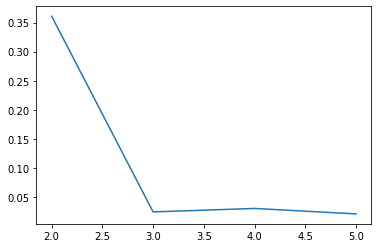

In [778]:
plt.plot(scores_round2)

#### Result
5 neurons performs best

### Test for best activation

In [779]:
activations = ['tanh', 'sigmoid', 'sigmoid', 'relu', 'exponential', 'linear', 'hard_sigmoid']

scores_round3 = pd.DataFrame(np.zeros([len(activations),1]), columns = ['score'], index = activations)

for i in activations:
    model = Sequential()
    model.add(Dense(5, input_dim=2, activation= i))
    model.add(Dense(5, input_dim=2, activation= i))
    model.add(Dense(5, input_dim=2, activation= i))
    model.add(Dense(5, input_dim=2, activation= i))
    model.add(Dense(1, input_dim=2, activation= i))
    model.summary()
    sgd = SGD(lr=0.1)
    model.compile(loss='binary_crossentropy', optimizer='sgd')
    model.fit(X, y, batch_size=4, epochs=400) 
    scores_round3.loc[i] = model.evaluate(X, y)
    
scores_round3

Model: "sequential_411"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1167 (Dense)           (None, 5)                 15        
_________________________________________________________________
dense_1168 (Dense)           (None, 5)                 30        
_________________________________________________________________
dense_1169 (Dense)           (None, 5)                 30        
_________________________________________________________________
dense_1170 (Dense)           (None, 5)                 30        
_________________________________________________________________
dense_1171 (Dense)           (None, 1)                 6         
Total params: 111
Trainable params: 111
Non-trainable params: 0
_________________________________________________________________
Epoch 1/400
160/160 [==============================] - 0s 1ms/step - loss: 4.1372
Epoch 2/400
160/160 [=================

160/160 [==============================] - 0s 458us/step - loss: 0.0690
Epoch 86/400
160/160 [==============================] - 0s 435us/step - loss: 0.0625
Epoch 87/400
160/160 [==============================] - 0s 426us/step - loss: 0.0701
Epoch 88/400
160/160 [==============================] - 0s 447us/step - loss: 0.0663
Epoch 89/400
160/160 [==============================] - 0s 463us/step - loss: 0.0675
Epoch 90/400
160/160 [==============================] - 0s 422us/step - loss: 0.0661
Epoch 91/400
160/160 [==============================] - 0s 456us/step - loss: 0.0669
Epoch 92/400
160/160 [==============================] - 0s 454us/step - loss: 0.0646
Epoch 93/400
160/160 [==============================] - 0s 441us/step - loss: 0.0666
Epoch 94/400
160/160 [==============================] - 0s 432us/step - loss: 0.0605
Epoch 95/400
160/160 [==============================] - 0s 501us/step - loss: 0.0613
Epoch 96/400
160/160 [==============================] - 0s 407us/step - loss: 

160/160 [==============================] - 0s 521us/step - loss: 0.0437
Epoch 181/400
160/160 [==============================] - 0s 473us/step - loss: 0.0424
Epoch 182/400
160/160 [==============================] - 0s 418us/step - loss: 0.0432
Epoch 183/400
160/160 [==============================] - 0s 456us/step - loss: 0.0411
Epoch 184/400
160/160 [==============================] - 0s 442us/step - loss: 0.0419
Epoch 185/400
160/160 [==============================] - 0s 450us/step - loss: 0.0391
Epoch 186/400
160/160 [==============================] - 0s 518us/step - loss: 0.0444
Epoch 187/400
160/160 [==============================] - 0s 608us/step - loss: 0.0419
Epoch 188/400
160/160 [==============================] - 0s 464us/step - loss: 0.0442
Epoch 189/400
160/160 [==============================] - 0s 448us/step - loss: 0.0399
Epoch 190/400
160/160 [==============================] - 0s 445us/step - loss: 0.0432
Epoch 191/400
160/160 [==============================] - 0s 423us/st

160/160 [==============================] - 0s 651us/step - loss: 0.0396
Epoch 276/400
160/160 [==============================] - 0s 477us/step - loss: 0.0377
Epoch 277/400
160/160 [==============================] - 0s 517us/step - loss: 0.0377
Epoch 278/400
160/160 [==============================] - 0s 410us/step - loss: 0.0335
Epoch 279/400
160/160 [==============================] - 0s 462us/step - loss: 0.0432
Epoch 280/400
160/160 [==============================] - 0s 405us/step - loss: 0.0397
Epoch 281/400
160/160 [==============================] - 0s 435us/step - loss: 0.0346
Epoch 282/400
160/160 [==============================] - 0s 455us/step - loss: 0.0390
Epoch 283/400
160/160 [==============================] - 0s 492us/step - loss: 0.0344
Epoch 284/400
160/160 [==============================] - 0s 436us/step - loss: 0.0359
Epoch 285/400
160/160 [==============================] - 0s 449us/step - loss: 0.0371
Epoch 286/400
160/160 [==============================] - 0s 445us/st

160/160 [==============================] - 0s 504us/step - loss: 0.0322
Epoch 371/400
160/160 [==============================] - 0s 553us/step - loss: 0.0313
Epoch 372/400
160/160 [==============================] - 0s 443us/step - loss: 0.0344
Epoch 373/400
160/160 [==============================] - 0s 498us/step - loss: 0.0317
Epoch 374/400
160/160 [==============================] - 0s 470us/step - loss: 0.0318
Epoch 375/400
160/160 [==============================] - 0s 435us/step - loss: 0.0311
Epoch 376/400
160/160 [==============================] - 0s 440us/step - loss: 0.0360
Epoch 377/400
160/160 [==============================] - 0s 488us/step - loss: 0.0305
Epoch 378/400
160/160 [==============================] - 0s 467us/step - loss: 0.0289
Epoch 379/400
160/160 [==============================] - 0s 435us/step - loss: 0.0305
Epoch 380/400
160/160 [==============================] - 0s 480us/step - loss: 0.0327
Epoch 381/400
160/160 [==============================] - 0s 420us/st

160/160 [==============================] - 0s 408us/step - loss: 0.6940
Epoch 54/400
160/160 [==============================] - 0s 606us/step - loss: 0.6938
Epoch 55/400
160/160 [==============================] - 0s 439us/step - loss: 0.6937
Epoch 56/400
160/160 [==============================] - 0s 380us/step - loss: 0.6936
Epoch 57/400
160/160 [==============================] - 0s 433us/step - loss: 0.6940
Epoch 58/400
160/160 [==============================] - 0s 427us/step - loss: 0.6937
Epoch 59/400
160/160 [==============================] - 0s 424us/step - loss: 0.6937
Epoch 60/400
160/160 [==============================] - 0s 429us/step - loss: 0.6937
Epoch 61/400
160/160 [==============================] - 0s 426us/step - loss: 0.6938
Epoch 62/400
160/160 [==============================] - 0s 444us/step - loss: 0.6938
Epoch 63/400
160/160 [==============================] - 0s 431us/step - loss: 0.6938
Epoch 64/400
160/160 [==============================] - 0s 412us/step - loss: 

160/160 [==============================] - 0s 516us/step - loss: 0.6939
Epoch 150/400
160/160 [==============================] - 0s 430us/step - loss: 0.6939
Epoch 151/400
160/160 [==============================] - 0s 439us/step - loss: 0.6938
Epoch 152/400
160/160 [==============================] - 0s 406us/step - loss: 0.6940
Epoch 153/400
160/160 [==============================] - 0s 500us/step - loss: 0.6937
Epoch 154/400
160/160 [==============================] - 0s 464us/step - loss: 0.6938
Epoch 155/400
160/160 [==============================] - 0s 504us/step - loss: 0.6942
Epoch 156/400
160/160 [==============================] - 0s 391us/step - loss: 0.6938
Epoch 157/400
160/160 [==============================] - 0s 422us/step - loss: 0.6940
Epoch 158/400
160/160 [==============================] - 0s 410us/step - loss: 0.6940
Epoch 159/400
160/160 [==============================] - 0s 419us/step - loss: 0.6938
Epoch 160/400
160/160 [==============================] - 0s 426us/st

160/160 [==============================] - 0s 739us/step - loss: 0.6939
Epoch 245/400
160/160 [==============================] - 0s 648us/step - loss: 0.6938
Epoch 246/400
160/160 [==============================] - 0s 872us/step - loss: 0.6939
Epoch 247/400
160/160 [==============================] - 0s 839us/step - loss: 0.6938
Epoch 248/400
160/160 [==============================] - 0s 603us/step - loss: 0.6940
Epoch 249/400
160/160 [==============================] - 0s 474us/step - loss: 0.6936
Epoch 250/400
160/160 [==============================] - 0s 541us/step - loss: 0.6939
Epoch 251/400
160/160 [==============================] - 0s 517us/step - loss: 0.6938
Epoch 252/400
160/160 [==============================] - 0s 680us/step - loss: 0.6939
Epoch 253/400
160/160 [==============================] - 0s 651us/step - loss: 0.6938
Epoch 254/400
160/160 [==============================] - 0s 775us/step - loss: 0.6939
Epoch 255/400
160/160 [==============================] - 0s 801us/st

160/160 [==============================] - 0s 867us/step - loss: 0.6938
Epoch 340/400
160/160 [==============================] - 0s 834us/step - loss: 0.6940
Epoch 341/400
160/160 [==============================] - 0s 680us/step - loss: 0.6939
Epoch 342/400
160/160 [==============================] - 0s 560us/step - loss: 0.6940
Epoch 343/400
160/160 [==============================] - 0s 562us/step - loss: 0.6938
Epoch 344/400
160/160 [==============================] - 0s 667us/step - loss: 0.6941
Epoch 345/400
160/160 [==============================] - 0s 614us/step - loss: 0.6938
Epoch 346/400
160/160 [==============================] - 0s 581us/step - loss: 0.6939
Epoch 347/400
160/160 [==============================] - 0s 765us/step - loss: 0.6939
Epoch 348/400
160/160 [==============================] - 0s 864us/step - loss: 0.6939
Epoch 349/400
160/160 [==============================] - 0s 595us/step - loss: 0.6937
Epoch 350/400
160/160 [==============================] - 0s 707us/st

160/160 [==============================] - 0s 572us/step - loss: 0.6940
Epoch 23/400
160/160 [==============================] - 0s 445us/step - loss: 0.6938
Epoch 24/400
160/160 [==============================] - 0s 428us/step - loss: 0.6938
Epoch 25/400
160/160 [==============================] - 0s 527us/step - loss: 0.6937
Epoch 26/400
160/160 [==============================] - 0s 945us/step - loss: 0.6937
Epoch 27/400
160/160 [==============================] - 0s 858us/step - loss: 0.6936
Epoch 28/400
160/160 [==============================] - 0s 1ms/step - loss: 0.6937
Epoch 29/400
160/160 [==============================] - 0s 567us/step - loss: 0.6939
Epoch 30/400
160/160 [==============================] - 0s 455us/step - loss: 0.6939
Epoch 31/400
160/160 [==============================] - 0s 471us/step - loss: 0.6937
Epoch 32/400
160/160 [==============================] - 0s 610us/step - loss: 0.6940
Epoch 33/400
160/160 [==============================] - 0s 607us/step - loss: 0.

160/160 [==============================] - 0s 411us/step - loss: 0.6939
Epoch 119/400
160/160 [==============================] - 0s 508us/step - loss: 0.6940
Epoch 120/400
160/160 [==============================] - 0s 472us/step - loss: 0.6940
Epoch 121/400
160/160 [==============================] - 0s 487us/step - loss: 0.6941
Epoch 122/400
160/160 [==============================] - 0s 455us/step - loss: 0.6938
Epoch 123/400
160/160 [==============================] - 0s 446us/step - loss: 0.6943
Epoch 124/400
160/160 [==============================] - 0s 446us/step - loss: 0.6938
Epoch 125/400
160/160 [==============================] - 0s 403us/step - loss: 0.6938
Epoch 126/400
160/160 [==============================] - 0s 392us/step - loss: 0.6940
Epoch 127/400
160/160 [==============================] - 0s 423us/step - loss: 0.6938
Epoch 128/400
160/160 [==============================] - 0s 503us/step - loss: 0.6938
Epoch 129/400
160/160 [==============================] - 0s 388us/st

160/160 [==============================] - 0s 411us/step - loss: 0.6939
Epoch 214/400
160/160 [==============================] - 0s 485us/step - loss: 0.6936
Epoch 215/400
160/160 [==============================] - 0s 383us/step - loss: 0.6939
Epoch 216/400
160/160 [==============================] - 0s 394us/step - loss: 0.6938
Epoch 217/400
160/160 [==============================] - 0s 424us/step - loss: 0.6939
Epoch 218/400
160/160 [==============================] - 0s 515us/step - loss: 0.6939
Epoch 219/400
160/160 [==============================] - 0s 478us/step - loss: 0.6938
Epoch 220/400
160/160 [==============================] - 0s 542us/step - loss: 0.6939
Epoch 221/400
160/160 [==============================] - 0s 1ms/step - loss: 0.6938
Epoch 222/400
160/160 [==============================] - 0s 884us/step - loss: 0.6937
Epoch 223/400
160/160 [==============================] - 0s 832us/step - loss: 0.6936
Epoch 224/400
160/160 [==============================] - 0s 792us/step

160/160 [==============================] - 0s 821us/step - loss: 0.6938
Epoch 309/400
160/160 [==============================] - 0s 756us/step - loss: 0.6939
Epoch 310/400
160/160 [==============================] - 0s 803us/step - loss: 0.6938
Epoch 311/400
160/160 [==============================] - 0s 743us/step - loss: 0.6936
Epoch 312/400
160/160 [==============================] - 0s 669us/step - loss: 0.6938
Epoch 313/400
160/160 [==============================] - 0s 743us/step - loss: 0.6938
Epoch 314/400
160/160 [==============================] - 0s 704us/step - loss: 0.6938
Epoch 315/400
160/160 [==============================] - 0s 876us/step - loss: 0.6938
Epoch 316/400
160/160 [==============================] - 0s 748us/step - loss: 0.6938
Epoch 317/400
160/160 [==============================] - 0s 1ms/step - loss: 0.6936
Epoch 318/400
160/160 [==============================] - 0s 624us/step - loss: 0.6939
Epoch 319/400
160/160 [==============================] - 0s 572us/step

Epoch 1/400
160/160 [==============================] - 0s 1ms/step - loss: 0.7115
Epoch 2/400
160/160 [==============================] - 0s 444us/step - loss: 0.6281
Epoch 3/400
160/160 [==============================] - 0s 473us/step - loss: 0.5990
Epoch 4/400
160/160 [==============================] - 0s 455us/step - loss: 0.5818
Epoch 5/400
160/160 [==============================] - 0s 452us/step - loss: 0.5640
Epoch 6/400
160/160 [==============================] - 0s 475us/step - loss: 0.5524
Epoch 7/400
160/160 [==============================] - 0s 459us/step - loss: 0.5463
Epoch 8/400
160/160 [==============================] - 0s 479us/step - loss: 0.5430
Epoch 9/400
160/160 [==============================] - 0s 441us/step - loss: 0.5378
Epoch 10/400
160/160 [==============================] - 0s 454us/step - loss: 0.5245
Epoch 11/400
160/160 [==============================] - 0s 464us/step - loss: 0.5203
Epoch 12/400
160/160 [==============================] - 0s 461us/step - loss

160/160 [==============================] - 0s 426us/step - loss: 7.7125
Epoch 98/400
160/160 [==============================] - 0s 562us/step - loss: 7.7125
Epoch 99/400
160/160 [==============================] - 0s 512us/step - loss: 7.7125
Epoch 100/400
160/160 [==============================] - 0s 405us/step - loss: 7.7125
Epoch 101/400
160/160 [==============================] - 0s 478us/step - loss: 7.7125
Epoch 102/400
160/160 [==============================] - 0s 499us/step - loss: 7.7125
Epoch 103/400
160/160 [==============================] - 0s 494us/step - loss: 7.7125
Epoch 104/400
160/160 [==============================] - 0s 489us/step - loss: 7.7125
Epoch 105/400
160/160 [==============================] - 0s 543us/step - loss: 7.7125
Epoch 106/400
160/160 [==============================] - 0s 463us/step - loss: 7.7125
Epoch 107/400
160/160 [==============================] - 0s 424us/step - loss: 7.7125
Epoch 108/400
160/160 [==============================] - 0s 425us/step

160/160 [==============================] - 0s 776us/step - loss: 7.7125
Epoch 193/400
160/160 [==============================] - 0s 655us/step - loss: 7.7125
Epoch 194/400
160/160 [==============================] - 0s 656us/step - loss: 7.7125
Epoch 195/400
160/160 [==============================] - 0s 615us/step - loss: 7.7125
Epoch 196/400
160/160 [==============================] - 0s 629us/step - loss: 7.7125
Epoch 197/400
160/160 [==============================] - 0s 627us/step - loss: 7.7125
Epoch 198/400
160/160 [==============================] - 0s 716us/step - loss: 7.7125
Epoch 199/400
160/160 [==============================] - 0s 654us/step - loss: 7.7125
Epoch 200/400
160/160 [==============================] - 0s 653us/step - loss: 7.7125
Epoch 201/400
160/160 [==============================] - 0s 420us/step - loss: 7.7125
Epoch 202/400
160/160 [==============================] - 0s 436us/step - loss: 7.7125
Epoch 203/400
160/160 [==============================] - 0s 533us/st

160/160 [==============================] - 0s 505us/step - loss: 7.7125
Epoch 288/400
160/160 [==============================] - 0s 603us/step - loss: 7.7125
Epoch 289/400
160/160 [==============================] - 0s 770us/step - loss: 7.7125
Epoch 290/400
160/160 [==============================] - 0s 970us/step - loss: 7.7125
Epoch 291/400
160/160 [==============================] - 0s 538us/step - loss: 7.7125
Epoch 292/400
160/160 [==============================] - 0s 604us/step - loss: 7.7125
Epoch 293/400
160/160 [==============================] - 0s 591us/step - loss: 7.7125
Epoch 294/400
160/160 [==============================] - 0s 663us/step - loss: 7.7125
Epoch 295/400
160/160 [==============================] - 0s 726us/step - loss: 7.7125
Epoch 296/400
160/160 [==============================] - 0s 803us/step - loss: 7.7125
Epoch 297/400
160/160 [==============================] - 0s 895us/step - loss: 7.7125
Epoch 298/400
160/160 [==============================] - 0s 587us/st

160/160 [==============================] - 0s 550us/step - loss: 7.7125
Epoch 383/400
160/160 [==============================] - 0s 589us/step - loss: 7.7125
Epoch 384/400
160/160 [==============================] - 0s 478us/step - loss: 7.7125
Epoch 385/400
160/160 [==============================] - 0s 440us/step - loss: 7.7125
Epoch 386/400
160/160 [==============================] - 0s 530us/step - loss: 7.7125
Epoch 387/400
160/160 [==============================] - 0s 955us/step - loss: 7.7125
Epoch 388/400
160/160 [==============================] - 0s 539us/step - loss: 7.7125
Epoch 389/400
160/160 [==============================] - 0s 549us/step - loss: 7.7125
Epoch 390/400
160/160 [==============================] - 0s 463us/step - loss: 7.7125
Epoch 391/400
160/160 [==============================] - 0s 620us/step - loss: 7.7125
Epoch 392/400
160/160 [==============================] - 0s 616us/step - loss: 7.7125
Epoch 393/400
160/160 [==============================] - 0s 618us/st

160/160 [==============================] - 0s 567us/step - loss: nan
Epoch 69/400
160/160 [==============================] - 0s 455us/step - loss: nan
Epoch 70/400
160/160 [==============================] - 0s 531us/step - loss: nan
Epoch 71/400
160/160 [==============================] - 0s 423us/step - loss: nan
Epoch 72/400
160/160 [==============================] - 0s 456us/step - loss: nan
Epoch 73/400
160/160 [==============================] - 0s 477us/step - loss: nan
Epoch 74/400
160/160 [==============================] - 0s 458us/step - loss: nan
Epoch 75/400
160/160 [==============================] - 0s 548us/step - loss: nan
Epoch 76/400
160/160 [==============================] - 0s 480us/step - loss: nan
Epoch 77/400
160/160 [==============================] - 0s 481us/step - loss: nan
Epoch 78/400
160/160 [==============================] - 0s 518us/step - loss: nan
Epoch 79/400
160/160 [==============================] - 0s 474us/step - loss: nan
Epoch 80/400
160/160 [=======

160/160 [==============================] - 0s 471us/step - loss: nan
Epoch 168/400
160/160 [==============================] - 0s 463us/step - loss: nan
Epoch 169/400
160/160 [==============================] - 0s 505us/step - loss: nan
Epoch 170/400
160/160 [==============================] - 0s 439us/step - loss: nan
Epoch 171/400
160/160 [==============================] - 0s 429us/step - loss: nan
Epoch 172/400
160/160 [==============================] - 0s 438us/step - loss: nan
Epoch 173/400
160/160 [==============================] - 0s 446us/step - loss: nan
Epoch 174/400
160/160 [==============================] - 0s 511us/step - loss: nan
Epoch 175/400
160/160 [==============================] - 0s 482us/step - loss: nan
Epoch 176/400
160/160 [==============================] - 0s 466us/step - loss: nan
Epoch 177/400
160/160 [==============================] - 0s 473us/step - loss: nan
Epoch 178/400
160/160 [==============================] - 0s 448us/step - loss: nan
Epoch 179/400
160/

160/160 [==============================] - 0s 762us/step - loss: nan
Epoch 266/400
160/160 [==============================] - 0s 2ms/step - loss: nan: 0s - los
Epoch 267/400
160/160 [==============================] - 0s 764us/step - loss: nan
Epoch 268/400
160/160 [==============================] - 0s 803us/step - loss: nan
Epoch 269/400
160/160 [==============================] - 0s 681us/step - loss: nan
Epoch 270/400
160/160 [==============================] - 0s 479us/step - loss: nan
Epoch 271/400
160/160 [==============================] - 0s 494us/step - loss: nan
Epoch 272/400
160/160 [==============================] - 0s 439us/step - loss: nan
Epoch 273/400
160/160 [==============================] - 0s 483us/step - loss: nan
Epoch 274/400
160/160 [==============================] - 0s 538us/step - loss: nan
Epoch 275/400
160/160 [==============================] - 0s 650us/step - loss: nan
Epoch 276/400
160/160 [==============================] - 0s 719us/step - loss: nan
Epoch 277/

160/160 [==============================] - 0s 513us/step - loss: nan
Epoch 364/400
160/160 [==============================] - 0s 548us/step - loss: nan
Epoch 365/400
160/160 [==============================] - 0s 476us/step - loss: nan
Epoch 366/400
160/160 [==============================] - 0s 500us/step - loss: nan
Epoch 367/400
160/160 [==============================] - 0s 411us/step - loss: nan
Epoch 368/400
160/160 [==============================] - 0s 455us/step - loss: nan
Epoch 369/400
160/160 [==============================] - 0s 461us/step - loss: nan
Epoch 370/400
160/160 [==============================] - 0s 482us/step - loss: nan
Epoch 371/400
160/160 [==============================] - 0s 452us/step - loss: nan
Epoch 372/400
160/160 [==============================] - 0s 432us/step - loss: nan
Epoch 373/400
160/160 [==============================] - 0s 442us/step - loss: nan
Epoch 374/400
160/160 [==============================] - 0s 486us/step - loss: nan
Epoch 375/400
160/

160/160 [==============================] - 0s 500us/step - loss: 7.6666
Epoch 49/400
160/160 [==============================] - 0s 435us/step - loss: 7.6666
Epoch 50/400
160/160 [==============================] - 0s 479us/step - loss: 7.6666
Epoch 51/400
160/160 [==============================] - 0s 488us/step - loss: 7.6666
Epoch 52/400
160/160 [==============================] - 0s 1ms/step - loss: 7.6666
Epoch 53/400
160/160 [==============================] - 0s 832us/step - loss: 7.6666
Epoch 54/400
160/160 [==============================] - 0s 460us/step - loss: 7.6666
Epoch 55/400
160/160 [==============================] - 0s 635us/step - loss: 7.6666
Epoch 56/400
160/160 [==============================] - 0s 604us/step - loss: 7.6666
Epoch 57/400
160/160 [==============================] - 0s 673us/step - loss: 7.6666
Epoch 58/400
160/160 [==============================] - 0s 859us/step - loss: 7.6666
Epoch 59/400
160/160 [==============================] - 0s 794us/step - loss: 7.

/Users/ben/opt/anaconda3/lib/python3.7/site-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.201626). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/Users/ben/opt/anaconda3/lib/python3.7/site-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.103747). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


160/160 [==============================] - 0s 790us/step - loss: 7.6666
Epoch 113/400
160/160 [==============================] - 0s 583us/step - loss: 7.6666
Epoch 114/400
160/160 [==============================] - 0s 458us/step - loss: 7.6666
Epoch 115/400
160/160 [==============================] - 0s 430us/step - loss: 7.6666
Epoch 116/400
160/160 [==============================] - 0s 416us/step - loss: 7.6666
Epoch 117/400
160/160 [==============================] - 0s 446us/step - loss: 7.6666
Epoch 118/400
160/160 [==============================] - 0s 484us/step - loss: 7.6666
Epoch 119/400
160/160 [==============================] - 0s 500us/step - loss: 7.6666
Epoch 120/400
160/160 [==============================] - 0s 877us/step - loss: 7.6666
Epoch 121/400
160/160 [==============================] - 0s 524us/step - loss: 7.6666
Epoch 122/400
160/160 [==============================] - 0s 494us/step - loss: 7.6666
Epoch 123/400
160/160 [==============================] - 0s 509us/st

160/160 [==============================] - 0s 505us/step - loss: 7.6666
Epoch 208/400
160/160 [==============================] - 0s 497us/step - loss: 7.6666
Epoch 209/400
160/160 [==============================] - 0s 467us/step - loss: 7.6666
Epoch 210/400
160/160 [==============================] - 0s 502us/step - loss: 7.6666
Epoch 211/400
160/160 [==============================] - 0s 457us/step - loss: 7.6666
Epoch 212/400
160/160 [==============================] - 0s 447us/step - loss: 7.6666
Epoch 213/400
160/160 [==============================] - 0s 431us/step - loss: 7.6666
Epoch 214/400
160/160 [==============================] - 0s 450us/step - loss: 7.6666
Epoch 215/400
160/160 [==============================] - 0s 448us/step - loss: 7.6666
Epoch 216/400
160/160 [==============================] - 0s 480us/step - loss: 7.6666
Epoch 217/400
160/160 [==============================] - 0s 470us/step - loss: 7.6666
Epoch 218/400
160/160 [==============================] - 0s 466us/st

160/160 [==============================] - 0s 480us/step - loss: 7.6666
Epoch 303/400
160/160 [==============================] - 0s 416us/step - loss: 7.6666
Epoch 304/400
160/160 [==============================] - 0s 483us/step - loss: 7.6666
Epoch 305/400
160/160 [==============================] - 0s 466us/step - loss: 7.6666
Epoch 306/400
160/160 [==============================] - 0s 710us/step - loss: 7.6666
Epoch 307/400
160/160 [==============================] - 0s 545us/step - loss: 7.6666
Epoch 308/400
160/160 [==============================] - 0s 496us/step - loss: 7.6666
Epoch 309/400
160/160 [==============================] - 0s 407us/step - loss: 7.6666
Epoch 310/400
160/160 [==============================] - 0s 445us/step - loss: 7.6666
Epoch 311/400
160/160 [==============================] - 0s 484us/step - loss: 7.6666
Epoch 312/400
160/160 [==============================] - 0s 474us/step - loss: 7.6666
Epoch 313/400
160/160 [==============================] - 0s 466us/st

160/160 [==============================] - 0s 932us/step - loss: 7.6666
Epoch 398/400
160/160 [==============================] - 0s 698us/step - loss: 7.6666
Epoch 399/400
160/160 [==============================] - 0s 762us/step - loss: 7.6666
Epoch 400/400
160/160 [==============================] - 0s 288us/step
Model: "sequential_417"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1197 (Dense)           (None, 5)                 15        
_________________________________________________________________
dense_1198 (Dense)           (None, 5)                 30        
_________________________________________________________________
dense_1199 (Dense)           (None, 5)                 30        
_________________________________________________________________
dense_1200 (Dense)           (None, 5)                 30        
_________________________________________________________________
d

160/160 [==============================] - 0s 569us/step - loss: 0.6935
Epoch 82/400
160/160 [==============================] - 0s 582us/step - loss: 0.6936
Epoch 83/400
160/160 [==============================] - 0s 574us/step - loss: 0.6937
Epoch 84/400
160/160 [==============================] - 0s 568us/step - loss: 0.6936
Epoch 85/400
160/160 [==============================] - 0s 553us/step - loss: 0.6936
Epoch 86/400
160/160 [==============================] - 0s 547us/step - loss: 0.6936
Epoch 87/400
160/160 [==============================] - 0s 600us/step - loss: 0.6936
Epoch 88/400
160/160 [==============================] - 0s 546us/step - loss: 0.6936
Epoch 89/400
160/160 [==============================] - 0s 596us/step - loss: 0.6936
Epoch 90/400
160/160 [==============================] - 0s 536us/step - loss: 0.6935
Epoch 91/400
160/160 [==============================] - 0s 585us/step - loss: 0.6935
Epoch 92/400
160/160 [==============================] - 0s 576us/step - loss: 

160/160 [==============================] - 0s 604us/step - loss: 0.6935
Epoch 177/400
160/160 [==============================] - 0s 493us/step - loss: 0.6935
Epoch 178/400
160/160 [==============================] - 0s 538us/step - loss: 0.6936
Epoch 179/400
160/160 [==============================] - 0s 564us/step - loss: 0.6935
Epoch 180/400
160/160 [==============================] - 0s 526us/step - loss: 0.6937
Epoch 181/400
160/160 [==============================] - 0s 568us/step - loss: 0.6937
Epoch 182/400
160/160 [==============================] - 0s 562us/step - loss: 0.6937
Epoch 183/400
160/160 [==============================] - 0s 586us/step - loss: 0.6936
Epoch 184/400
160/160 [==============================] - 0s 550us/step - loss: 0.6935
Epoch 185/400
160/160 [==============================] - 0s 571us/step - loss: 0.6936
Epoch 186/400
160/160 [==============================] - 0s 773us/step - loss: 0.6935
Epoch 187/400
160/160 [==============================] - 0s 919us/st

160/160 [==============================] - 0s 510us/step - loss: 0.6936
Epoch 272/400
160/160 [==============================] - 0s 526us/step - loss: 0.6937
Epoch 273/400
160/160 [==============================] - 0s 552us/step - loss: 0.6936
Epoch 274/400
160/160 [==============================] - 0s 562us/step - loss: 0.6936
Epoch 275/400
160/160 [==============================] - 0s 569us/step - loss: 0.6935
Epoch 276/400
160/160 [==============================] - 0s 611us/step - loss: 0.6936
Epoch 277/400
160/160 [==============================] - 0s 516us/step - loss: 0.6935
Epoch 278/400
160/160 [==============================] - 0s 556us/step - loss: 0.6935
Epoch 279/400
160/160 [==============================] - 0s 563us/step - loss: 0.6937
Epoch 280/400
160/160 [==============================] - 0s 520us/step - loss: 0.6936
Epoch 281/400
160/160 [==============================] - 0s 566us/step - loss: 0.6934
Epoch 282/400
160/160 [==============================] - 0s 555us/st

160/160 [==============================] - 0s 511us/step - loss: 0.6937
Epoch 367/400
160/160 [==============================] - 0s 496us/step - loss: 0.6936
Epoch 368/400
160/160 [==============================] - 0s 573us/step - loss: 0.6936
Epoch 369/400
160/160 [==============================] - 0s 489us/step - loss: 0.6935
Epoch 370/400
160/160 [==============================] - 0s 523us/step - loss: 0.6936
Epoch 371/400
160/160 [==============================] - 0s 561us/step - loss: 0.6936
Epoch 372/400
160/160 [==============================] - 0s 521us/step - loss: 0.6935
Epoch 373/400
160/160 [==============================] - 0s 552us/step - loss: 0.6934
Epoch 374/400
160/160 [==============================] - 0s 623us/step - loss: 0.6935
Epoch 375/400
160/160 [==============================] - 0s 551us/step - loss: 0.6937
Epoch 376/400
160/160 [==============================] - 0s 535us/step - loss: 0.6936
Epoch 377/400
160/160 [==============================] - 0s 542us/st

,score
tanh,0.025216
sigmoid,0.693142
sigmoid,0.693142
relu,7.712474
exponential,NaN
linear,7.624619
hard_sigmoid,0.693147


#### Results
tanh performs the best.

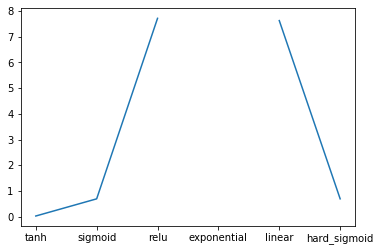

In [780]:
plt.plot(scores_round3)

### Test for Best Optimizer

In [781]:
from keras.optimizers import adam
from keras.optimizers import RMSprop
from keras.optimizers import Adamax

optimizers = ['SGD', 'adam', 'RMSprop', 'Adamax']

scores_round4 = pd.DataFrame(np.zeros([4,1]), columns = ['score'], index = optimizers)

for i in optimizers:
    model = Sequential()
    model.add(Dense(5, input_dim=2, activation= 'tanh'))
    model.add(Dense(5, input_dim=2, activation= 'tanh'))
    model.add(Dense(5, input_dim=2, activation= 'tanh'))
    model.add(Dense(5, input_dim=2, activation= 'tanh'))
    model.add(Dense(1, input_dim=2, activation= 'tanh'))
    model.summary()
    model.compile(loss='binary_crossentropy', optimizer=i)
    model.fit(X, y, batch_size=4, epochs=400) 
    scores_round4.loc[i] = model.evaluate(X, y)
    
scores_round4

Model: "sequential_418"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1202 (Dense)           (None, 5)                 15        
_________________________________________________________________
dense_1203 (Dense)           (None, 5)                 30        
_________________________________________________________________
dense_1204 (Dense)           (None, 5)                 30        
_________________________________________________________________
dense_1205 (Dense)           (None, 5)                 30        
_________________________________________________________________
dense_1206 (Dense)           (None, 1)                 6         
Total params: 111
Trainable params: 111
Non-trainable params: 0
_________________________________________________________________
Epoch 1/400
160/160 [==============================] - 0s 1ms/step - loss: 1.8913
Epoch 2/400
160/160 [=================

160/160 [==============================] - 0s 521us/step - loss: 0.0581
Epoch 86/400
160/160 [==============================] - 0s 595us/step - loss: 0.0599
Epoch 87/400
160/160 [==============================] - 0s 466us/step - loss: 0.0587
Epoch 88/400
160/160 [==============================] - 0s 783us/step - loss: 0.0572
Epoch 89/400
160/160 [==============================] - 0s 887us/step - loss: 0.0525
Epoch 90/400
160/160 [==============================] - 0s 849us/step - loss: 0.0602
Epoch 91/400
160/160 [==============================] - 0s 808us/step - loss: 0.0549
Epoch 92/400
160/160 [==============================] - 0s 680us/step - loss: 0.0576
Epoch 93/400
160/160 [==============================] - 0s 654us/step - loss: 0.0582
Epoch 94/400
160/160 [==============================] - 0s 645us/step - loss: 0.0537
Epoch 95/400
160/160 [==============================] - 0s 627us/step - loss: 0.0529
Epoch 96/400
160/160 [==============================] - 0s 718us/step - loss: 

160/160 [==============================] - 0s 471us/step - loss: 0.0353
Epoch 181/400
160/160 [==============================] - 0s 427us/step - loss: 0.0348
Epoch 182/400
160/160 [==============================] - 0s 452us/step - loss: 0.0386
Epoch 183/400
160/160 [==============================] - 0s 442us/step - loss: 0.0405
Epoch 184/400
160/160 [==============================] - 0s 482us/step - loss: 0.0350
Epoch 185/400
160/160 [==============================] - 0s 445us/step - loss: 0.0373
Epoch 186/400
160/160 [==============================] - 0s 415us/step - loss: 0.0386
Epoch 187/400
160/160 [==============================] - 0s 469us/step - loss: 0.0387
Epoch 188/400
160/160 [==============================] - 0s 479us/step - loss: 0.0336
Epoch 189/400
160/160 [==============================] - 0s 434us/step - loss: 0.0396
Epoch 190/400
160/160 [==============================] - 0s 454us/step - loss: 0.0428
Epoch 191/400
160/160 [==============================] - 0s 508us/st

160/160 [==============================] - 0s 2ms/step - loss: 0.0342
Epoch 276/400
160/160 [==============================] - 0s 440us/step - loss: 0.0345
Epoch 277/400
160/160 [==============================] - 0s 434us/step - loss: 0.0337
Epoch 278/400
160/160 [==============================] - 0s 959us/step - loss: 0.0318
Epoch 279/400
160/160 [==============================] - 0s 644us/step - loss: 0.0365
Epoch 280/400
160/160 [==============================] - 0s 436us/step - loss: 0.0335
Epoch 281/400
160/160 [==============================] - 0s 484us/step - loss: 0.0341
Epoch 282/400
160/160 [==============================] - 0s 499us/step - loss: 0.0300
Epoch 283/400
160/160 [==============================] - 0s 455us/step - loss: 0.0354
Epoch 284/400
160/160 [==============================] - 0s 444us/step - loss: 0.0303
Epoch 285/400
160/160 [==============================] - 0s 445us/step - loss: 0.0341
Epoch 286/400
160/160 [==============================] - 0s 437us/step

160/160 [==============================] - 0s 503us/step - loss: 0.0301
Epoch 371/400
160/160 [==============================] - 0s 507us/step - loss: 0.0297
Epoch 372/400
160/160 [==============================] - 0s 465us/step - loss: 0.0312
Epoch 373/400
160/160 [==============================] - 0s 459us/step - loss: 0.0279
Epoch 374/400
160/160 [==============================] - 0s 452us/step - loss: 0.0307
Epoch 375/400
160/160 [==============================] - 0s 497us/step - loss: 0.0298
Epoch 376/400
160/160 [==============================] - 0s 431us/step - loss: 0.0281
Epoch 377/400
160/160 [==============================] - 0s 470us/step - loss: 0.0276
Epoch 378/400
160/160 [==============================] - 0s 440us/step - loss: 0.0276
Epoch 379/400
160/160 [==============================] - 0s 456us/step - loss: 0.0261
Epoch 380/400
160/160 [==============================] - 0s 436us/step - loss: 0.0286
Epoch 381/400
160/160 [==============================] - 0s 655us/st

160/160 [==============================] - 0s 841us/step - loss: 3.9085
Epoch 54/400
160/160 [==============================] - 0s 728us/step - loss: 3.9067
Epoch 55/400
160/160 [==============================] - 0s 731us/step - loss: 3.9078
Epoch 56/400
160/160 [==============================] - 0s 914us/step - loss: 3.9032
Epoch 57/400
160/160 [==============================] - 0s 948us/step - loss: 3.9025
Epoch 58/400
160/160 [==============================] - 0s 919us/step - loss: 3.9019
Epoch 59/400
160/160 [==============================] - 0s 977us/step - loss: 3.8997
Epoch 60/400
160/160 [==============================] - 0s 1ms/step - loss: 3.9014
Epoch 61/400
160/160 [==============================] - 0s 930us/step - loss: 3.8972
Epoch 62/400
160/160 [==============================] - 0s 876us/step - loss: 3.8963
Epoch 63/400
160/160 [==============================] - 0s 869us/step - loss: 3.8946
Epoch 64/400
160/160 [==============================] - 0s 857us/step - loss: 3.

160/160 [==============================] - 0s 673us/step - loss: 3.8682
Epoch 150/400
160/160 [==============================] - 0s 538us/step - loss: 3.8701
Epoch 151/400
160/160 [==============================] - 0s 534us/step - loss: 3.8692
Epoch 152/400
160/160 [==============================] - 0s 528us/step - loss: 3.8703
Epoch 153/400
160/160 [==============================] - 0s 649us/step - loss: 3.8702
Epoch 154/400
160/160 [==============================] - 0s 472us/step - loss: 3.8700
Epoch 155/400
160/160 [==============================] - 0s 542us/step - loss: 3.8696
Epoch 156/400
160/160 [==============================] - 0s 565us/step - loss: 3.8683
Epoch 157/400
160/160 [==============================] - 0s 526us/step - loss: 3.8678
Epoch 158/400
160/160 [==============================] - 0s 562us/step - loss: 3.8694
Epoch 159/400
160/160 [==============================] - 0s 582us/step - loss: 3.8700
Epoch 160/400
160/160 [==============================] - 0s 479us/st

160/160 [==============================] - 0s 677us/step - loss: 3.8670
Epoch 245/400
160/160 [==============================] - 0s 605us/step - loss: 3.8656
Epoch 246/400
160/160 [==============================] - 0s 454us/step - loss: 3.8678
Epoch 247/400
160/160 [==============================] - 0s 508us/step - loss: 3.8705
Epoch 248/400
160/160 [==============================] - 0s 557us/step - loss: 3.8669
Epoch 249/400
160/160 [==============================] - 0s 594us/step - loss: 3.8657
Epoch 250/400
160/160 [==============================] - 0s 534us/step - loss: 3.8674
Epoch 251/400
160/160 [==============================] - 0s 551us/step - loss: 3.8684
Epoch 252/400
160/160 [==============================] - 0s 570us/step - loss: 3.8664
Epoch 253/400
160/160 [==============================] - 0s 567us/step - loss: 3.8686
Epoch 254/400
160/160 [==============================] - 0s 475us/step - loss: 3.8676
Epoch 255/400
160/160 [==============================] - 0s 519us/st

160/160 [==============================] - 0s 545us/step - loss: 3.8653
Epoch 340/400
160/160 [==============================] - 0s 613us/step - loss: 3.8665
Epoch 341/400
160/160 [==============================] - 0s 495us/step - loss: 3.8659
Epoch 342/400
160/160 [==============================] - 0s 510us/step - loss: 3.8668
Epoch 343/400
160/160 [==============================] - 0s 555us/step - loss: 3.8665
Epoch 344/400
160/160 [==============================] - 0s 542us/step - loss: 3.8666
Epoch 345/400
160/160 [==============================] - 0s 524us/step - loss: 3.8665
Epoch 346/400
160/160 [==============================] - 0s 535us/step - loss: 3.8661
Epoch 347/400
160/160 [==============================] - 0s 481us/step - loss: 3.8663
Epoch 348/400
160/160 [==============================] - 0s 532us/step - loss: 3.8651
Epoch 349/400
160/160 [==============================] - 0s 590us/step - loss: 3.8663
Epoch 350/400
160/160 [==============================] - 0s 532us/st

160/160 [==============================] - 0s 557us/step - loss: 0.3808
Epoch 23/400
160/160 [==============================] - 0s 480us/step - loss: 0.3594
Epoch 24/400
160/160 [==============================] - 0s 464us/step - loss: 0.3418
Epoch 25/400
160/160 [==============================] - 0s 442us/step - loss: 0.3238
Epoch 26/400
160/160 [==============================] - 0s 505us/step - loss: 0.3072
Epoch 27/400
160/160 [==============================] - 0s 526us/step - loss: 0.2890
Epoch 28/400
160/160 [==============================] - 0s 528us/step - loss: 0.2732
Epoch 29/400
160/160 [==============================] - 0s 476us/step - loss: 0.2640
Epoch 30/400
160/160 [==============================] - 0s 436us/step - loss: 0.2495
Epoch 31/400
160/160 [==============================] - 0s 475us/step - loss: 0.2401
Epoch 32/400
160/160 [==============================] - 0s 500us/step - loss: 0.2349
Epoch 33/400
160/160 [==============================] - 0s 502us/step - loss: 

160/160 [==============================] - 0s 483us/step - loss: 0.0518
Epoch 119/400
160/160 [==============================] - 0s 541us/step - loss: 0.0485
Epoch 120/400
160/160 [==============================] - 0s 515us/step - loss: 0.0523
Epoch 121/400
160/160 [==============================] - 0s 479us/step - loss: 0.0469
Epoch 122/400
160/160 [==============================] - 0s 469us/step - loss: 0.0466
Epoch 123/400
160/160 [==============================] - 0s 454us/step - loss: 0.0544
Epoch 124/400
160/160 [==============================] - 0s 544us/step - loss: 0.0471
Epoch 125/400
160/160 [==============================] - 0s 472us/step - loss: 0.0475
Epoch 126/400
160/160 [==============================] - 0s 491us/step - loss: 0.0490
Epoch 127/400
160/160 [==============================] - 0s 464us/step - loss: 0.0466
Epoch 128/400
160/160 [==============================] - 0s 485us/step - loss: 0.0424
Epoch 129/400
160/160 [==============================] - 0s 513us/st

160/160 [==============================] - 0s 453us/step - loss: 0.0302
Epoch 214/400
160/160 [==============================] - 0s 497us/step - loss: 0.0398
Epoch 215/400
160/160 [==============================] - 0s 470us/step - loss: 0.0325
Epoch 216/400
160/160 [==============================] - 0s 479us/step - loss: 0.1267
Epoch 217/400
160/160 [==============================] - 0s 449us/step - loss: 0.0441
Epoch 218/400
160/160 [==============================] - 0s 505us/step - loss: 0.0382
Epoch 219/400
160/160 [==============================] - 0s 492us/step - loss: 0.0361
Epoch 220/400
160/160 [==============================] - 0s 513us/step - loss: 0.0399
Epoch 221/400
160/160 [==============================] - 0s 506us/step - loss: 0.0352
Epoch 222/400
160/160 [==============================] - 0s 498us/step - loss: 0.0365
Epoch 223/400
160/160 [==============================] - 0s 492us/step - loss: 0.0364
Epoch 224/400
160/160 [==============================] - 0s 510us/st

160/160 [==============================] - 0s 566us/step - loss: 0.1154
Epoch 309/400
160/160 [==============================] - 0s 501us/step - loss: 0.1166
Epoch 310/400
160/160 [==============================] - 0s 477us/step - loss: 0.1105
Epoch 311/400
160/160 [==============================] - 0s 577us/step - loss: 0.0465
Epoch 312/400
160/160 [==============================] - 0s 552us/step - loss: 0.0346
Epoch 313/400
160/160 [==============================] - 0s 513us/step - loss: 0.1194
Epoch 314/400
160/160 [==============================] - 0s 465us/step - loss: 0.1216
Epoch 315/400
160/160 [==============================] - 0s 497us/step - loss: 0.0674
Epoch 316/400
160/160 [==============================] - 0s 499us/step - loss: 0.0288
Epoch 317/400
160/160 [==============================] - 0s 516us/step - loss: 0.0316
Epoch 318/400
160/160 [==============================] - 0s 489us/step - loss: 0.0414
Epoch 319/400
160/160 [==============================] - 0s 514us/st

Epoch 1/400
160/160 [==============================] - 0s 2ms/step - loss: 2.8253
Epoch 2/400
160/160 [==============================] - 0s 557us/step - loss: 1.8889
Epoch 3/400
160/160 [==============================] - 0s 541us/step - loss: 1.6134
Epoch 4/400
160/160 [==============================] - 0s 527us/step - loss: 1.4143
Epoch 5/400
160/160 [==============================] - 0s 513us/step - loss: 1.3031
Epoch 6/400
160/160 [==============================] - 0s 540us/step - loss: 1.2480
Epoch 7/400
160/160 [==============================] - 0s 542us/step - loss: 1.2163
Epoch 8/400
160/160 [==============================] - 0s 530us/step - loss: 1.1234
Epoch 9/400
160/160 [==============================] - 0s 523us/step - loss: 1.0935
Epoch 10/400
160/160 [==============================] - 0s 469us/step - loss: 1.0684
Epoch 11/400
160/160 [==============================] - 0s 600us/step - loss: 1.0479
Epoch 12/400
160/160 [==============================] - 0s 506us/step - loss

160/160 [==============================] - 0s 613us/step - loss: 0.6239
Epoch 98/400
160/160 [==============================] - 0s 514us/step - loss: 0.6174
Epoch 99/400
160/160 [==============================] - 0s 539us/step - loss: 0.6127
Epoch 100/400
160/160 [==============================] - 0s 519us/step - loss: 0.6028
Epoch 101/400
160/160 [==============================] - 0s 513us/step - loss: 0.5949
Epoch 102/400
160/160 [==============================] - 0s 510us/step - loss: 0.5856
Epoch 103/400
160/160 [==============================] - 0s 478us/step - loss: 0.5755
Epoch 104/400
160/160 [==============================] - 0s 548us/step - loss: 0.5661
Epoch 105/400
160/160 [==============================] - 0s 517us/step - loss: 0.5533
Epoch 106/400
160/160 [==============================] - 0s 529us/step - loss: 0.5448
Epoch 107/400
160/160 [==============================] - 0s 541us/step - loss: 0.5323
Epoch 108/400
160/160 [==============================] - 0s 523us/step

160/160 [==============================] - 0s 528us/step - loss: 0.2171
Epoch 193/400
160/160 [==============================] - 0s 479us/step - loss: 0.2169
Epoch 194/400
160/160 [==============================] - 0s 512us/step - loss: 0.2162
Epoch 195/400
160/160 [==============================] - 0s 506us/step - loss: 0.2127
Epoch 196/400
160/160 [==============================] - 0s 510us/step - loss: 0.2145
Epoch 197/400
160/160 [==============================] - 0s 488us/step - loss: 0.2112
Epoch 198/400
160/160 [==============================] - 0s 503us/step - loss: 0.2097
Epoch 199/400
160/160 [==============================] - 0s 472us/step - loss: 0.2090
Epoch 200/400
160/160 [==============================] - 0s 508us/step - loss: 0.2072
Epoch 201/400
160/160 [==============================] - 0s 592us/step - loss: 0.2066
Epoch 202/400
160/160 [==============================] - 0s 530us/step - loss: 0.2060
Epoch 203/400
160/160 [==============================] - 0s 531us/st

160/160 [==============================] - 0s 501us/step - loss: 0.0878
Epoch 288/400
160/160 [==============================] - 0s 477us/step - loss: 0.0862
Epoch 289/400
160/160 [==============================] - 0s 518us/step - loss: 0.0859
Epoch 290/400
160/160 [==============================] - 0s 499us/step - loss: 0.0846
Epoch 291/400
160/160 [==============================] - 0s 521us/step - loss: 0.0836
Epoch 292/400
160/160 [==============================] - 0s 513us/step - loss: 0.0824
Epoch 293/400
160/160 [==============================] - 0s 528us/step - loss: 0.0801
Epoch 294/400
160/160 [==============================] - 0s 537us/step - loss: 0.0796
Epoch 295/400
160/160 [==============================] - 0s 533us/step - loss: 0.0783
Epoch 296/400
160/160 [==============================] - 0s 458us/step - loss: 0.0773
Epoch 297/400
160/160 [==============================] - 0s 526us/step - loss: 0.0753
Epoch 298/400
160/160 [==============================] - 0s 511us/st

160/160 [==============================] - 0s 580us/step - loss: 0.0355
Epoch 383/400
160/160 [==============================] - 0s 540us/step - loss: 0.0360
Epoch 384/400
160/160 [==============================] - 0s 483us/step - loss: 0.0353
Epoch 385/400
160/160 [==============================] - 0s 480us/step - loss: 0.0355
Epoch 386/400
160/160 [==============================] - 0s 514us/step - loss: 0.0350
Epoch 387/400
160/160 [==============================] - 0s 528us/step - loss: 0.0341
Epoch 388/400
160/160 [==============================] - 0s 532us/step - loss: 0.0344
Epoch 389/400
160/160 [==============================] - 0s 541us/step - loss: 0.0365
Epoch 390/400
160/160 [==============================] - 0s 459us/step - loss: 0.0350
Epoch 391/400
160/160 [==============================] - 0s 499us/step - loss: 0.0332
Epoch 392/400
160/160 [==============================] - 0s 497us/step - loss: 0.0339
Epoch 393/400
160/160 [==============================] - 0s 522us/st

,score
SGD,0.020393
adam,3.865108
RMSprop,0.108553
Adamax,0.030781


In [782]:
scores_round4

,score
SGD,0.020393
adam,3.865108
RMSprop,0.108553
Adamax,0.030781


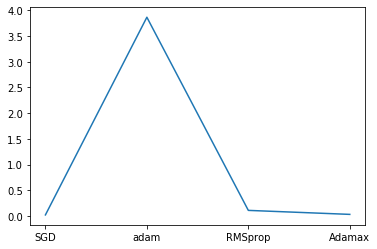

In [783]:
plt.plot(scores_round4)

#### Result
SGD is the best optimizer.

The best model has 4 layers, 5 neurons, uses tanh as an activator and SGD as an optimizer. It produced a loss score of .02.

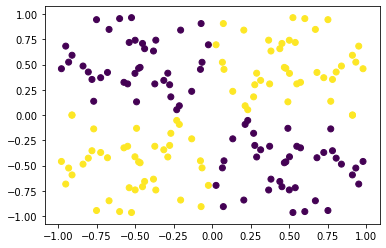

In [785]:
plt.scatter(*zip(*X), c=model.predict_classes(X).reshape(4*n))

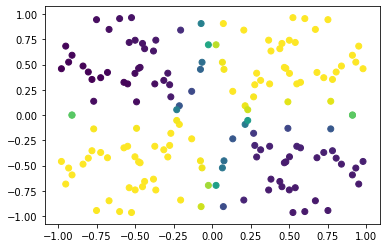

In [786]:
plt.scatter(*zip(*X), c=model.predict(X).reshape(4*n))

## Part 2 - BYOD (Bring your own Dataset)
Using your own dataset, experiment and find the best Neural Network configuration. 
You may use any resource to improve results, just reference it.

While you may use any dataset, I'd prefer you didn't use the diabetes dataset used in the lesson.

https://stackoverflow.com/questions/34673164/how-to-train-and-tune-an-artificial-multilayer-perceptron-neural-network-using-k

https://keras.io/

### Divorce Predictors Data Set

54 questions about marriages put to couples. Answers are scored on a scale. Output class is whether or not the couple is divorced.

In [790]:
byod = pd.read_csv('../data/divorce.csv', sep = ';')
byod

,Atr1,Atr2,Atr3,Atr4,Atr5,Atr6,Atr7,Atr8,Atr9,Atr10,...,Atr46,Atr47,Atr48,Atr49,Atr50,Atr51,Atr52,Atr53,Atr54,Class
0,2,2,4,1,0,0,0,0,0,0,...,2,1,3,3,3,2,3,2,1,1
1,4,4,4,4,4,0,0,4,4,4,...,2,2,3,4,4,4,4,2,2,1
2,2,2,2,2,1,3,2,1,1,2,...,3,2,3,1,1,1,2,2,2,1
3,3,2,3,2,3,3,3,3,3,3,...,2,2,3,3,3,3,2,2,2,1
4,2,2,1,1,1,1,0,0,0,0,...,2,1,2,3,2,2,2,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,0,0,0,0,0,0,0,0,0,0,...,1,0,4,1,1,4,2,2,2,0
166,0,0,0,0,0,0,0,0,0,0,...,4,1,2,2,2,2,3,2,2,0
167,1,1,0,0,0,0,0,0,0,1,...,3,0,2,0,1,1,3,0,0,0
168,0,0,0,0,0,0,0,0,0,0,...,3,3,2,2,3,2,4,3,1,0


In [791]:
# split into input (X) and output (Y) variables
byodX = byod.iloc[:,0:54]
byodY = byod.iloc[:,54]

### Test Number of Layers

In [794]:
byod_scores = pd.DataFrame(np.zeros([5,2]), columns = ['loss_score', 'accuracy'], index = range(1,6))

for i in range(1,6):
    model = Sequential()
    for j in range(0,i):
        model.add(Dense(8, input_dim=54, activation='tanh'))
    model.add(Dense(1, input_dim=2, activation='tanh'))
    model.summary()
    sgd = SGD(lr=0.1)
    model.compile(loss='binary_crossentropy', optimizer='sgd', metrics = ['accuracy'])
    model.fit(byodX, byodY, batch_size=4, epochs=400) 
    byod_scores.loc[i] = model.evaluate(byodX, byodY)

Model: "sequential_424"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1226 (Dense)           (None, 8)                 440       
_________________________________________________________________
dense_1227 (Dense)           (None, 1)                 9         
Total params: 449
Trainable params: 449
Non-trainable params: 0
_________________________________________________________________
Epoch 1/400
170/170 [==============================] - 0s 1ms/step - loss: 7.5651 - accuracy: 0.1941
Epoch 2/400
170/170 [==============================] - 0s 557us/step - loss: 7.6220 - accuracy: 0.0353
Epoch 3/400
170/170 [==============================] - 0s 600us/step - loss: 7.6218 - accuracy: 0.0294
Epoch 4/400
170/170 [==============================] - 0s 1ms/step - loss: 7.6217 - accuracy: 0.0294
Epoch 5/400
170/170 [==============================] - 0s 778us/step - loss: 7.6217 - accuracy: 0.0294
Epoch

170/170 [==============================] - 0s 496us/step - loss: 7.6217 - accuracy: 0.0294
Epoch 74/400
170/170 [==============================] - 0s 1ms/step - loss: 7.6217 - accuracy: 0.0294
Epoch 75/400
170/170 [==============================] - 0s 830us/step - loss: 7.6217 - accuracy: 0.0294
Epoch 76/400
170/170 [==============================] - 0s 605us/step - loss: 7.6217 - accuracy: 0.0294
Epoch 77/400
170/170 [==============================] - 0s 698us/step - loss: 7.6217 - accuracy: 0.0294
Epoch 78/400
170/170 [==============================] - 0s 626us/step - loss: 7.6217 - accuracy: 0.0294
Epoch 79/400
170/170 [==============================] - 0s 390us/step - loss: 7.6217 - accuracy: 0.0294
Epoch 80/400
170/170 [==============================] - 0s 870us/step - loss: 7.6217 - accuracy: 0.0294
Epoch 81/400
170/170 [==============================] - 0s 738us/step - loss: 7.6217 - accuracy: 0.0294
Epoch 82/400
170/170 [==============================] - 0s 426us/step - loss: 7

170/170 [==============================] - 0s 417us/step - loss: 7.6217 - accuracy: 0.0294
Epoch 152/400
170/170 [==============================] - 0s 477us/step - loss: 7.6217 - accuracy: 0.0294
Epoch 153/400
170/170 [==============================] - 0s 429us/step - loss: 7.6217 - accuracy: 0.0294
Epoch 154/400
170/170 [==============================] - 0s 412us/step - loss: 7.6217 - accuracy: 0.0294
Epoch 155/400
170/170 [==============================] - 0s 437us/step - loss: 7.6217 - accuracy: 0.0294
Epoch 156/400
170/170 [==============================] - 0s 423us/step - loss: 7.6217 - accuracy: 0.0294
Epoch 157/400
170/170 [==============================] - 0s 406us/step - loss: 7.6217 - accuracy: 0.0294
Epoch 158/400
170/170 [==============================] - 0s 432us/step - loss: 7.6217 - accuracy: 0.0294
Epoch 159/400
170/170 [==============================] - 0s 456us/step - loss: 7.6217 - accuracy: 0.0294
Epoch 160/400
170/170 [==============================] - 0s 439us/ste

170/170 [==============================] - 0s 511us/step - loss: 7.6217 - accuracy: 0.0294
Epoch 230/400
170/170 [==============================] - 0s 628us/step - loss: 7.6217 - accuracy: 0.0294
Epoch 231/400
170/170 [==============================] - 0s 418us/step - loss: 7.6217 - accuracy: 0.0294
Epoch 232/400
170/170 [==============================] - 0s 436us/step - loss: 7.6217 - accuracy: 0.0294
Epoch 233/400
170/170 [==============================] - 0s 439us/step - loss: 7.6217 - accuracy: 0.0294
Epoch 234/400
170/170 [==============================] - 0s 389us/step - loss: 7.6217 - accuracy: 0.0294
Epoch 235/400
170/170 [==============================] - 0s 419us/step - loss: 7.6217 - accuracy: 0.0294
Epoch 236/400
170/170 [==============================] - 0s 424us/step - loss: 7.6217 - accuracy: 0.0294
Epoch 237/400
170/170 [==============================] - 0s 428us/step - loss: 7.6217 - accuracy: 0.0294
Epoch 238/400
170/170 [==============================] - 0s 458us/ste

170/170 [==============================] - 0s 410us/step - loss: 7.6217 - accuracy: 0.0294
Epoch 308/400
170/170 [==============================] - 0s 512us/step - loss: 7.6217 - accuracy: 0.0294
Epoch 309/400
170/170 [==============================] - 0s 464us/step - loss: 7.6217 - accuracy: 0.0294
Epoch 310/400
170/170 [==============================] - 0s 424us/step - loss: 7.6217 - accuracy: 0.0294
Epoch 311/400
170/170 [==============================] - 0s 439us/step - loss: 7.6217 - accuracy: 0.0294
Epoch 312/400
170/170 [==============================] - 0s 396us/step - loss: 7.6217 - accuracy: 0.0294
Epoch 313/400
170/170 [==============================] - 0s 431us/step - loss: 7.6217 - accuracy: 0.0294
Epoch 314/400
170/170 [==============================] - 0s 425us/step - loss: 7.6217 - accuracy: 0.0294
Epoch 315/400
170/170 [==============================] - 0s 418us/step - loss: 7.6217 - accuracy: 0.0294
Epoch 316/400
170/170 [==============================] - 0s 474us/ste

170/170 [==============================] - 0s 469us/step - loss: 7.6217 - accuracy: 0.0294
Epoch 386/400
170/170 [==============================] - 0s 488us/step - loss: 7.6217 - accuracy: 0.0294
Epoch 387/400
170/170 [==============================] - 0s 441us/step - loss: 7.6217 - accuracy: 0.0294
Epoch 388/400
170/170 [==============================] - 0s 432us/step - loss: 7.6217 - accuracy: 0.0294
Epoch 389/400
170/170 [==============================] - 0s 441us/step - loss: 7.6217 - accuracy: 0.0294
Epoch 390/400
170/170 [==============================] - 0s 441us/step - loss: 7.6217 - accuracy: 0.0294
Epoch 391/400
170/170 [==============================] - 0s 432us/step - loss: 7.6217 - accuracy: 0.0294
Epoch 392/400
170/170 [==============================] - 0s 429us/step - loss: 7.6217 - accuracy: 0.0294
Epoch 393/400
170/170 [==============================] - 0s 438us/step - loss: 7.6217 - accuracy: 0.0294
Epoch 394/400
170/170 [==============================] - 0s 429us/ste

170/170 [==============================] - 0s 480us/step - loss: 0.0024 - accuracy: 0.7294
Epoch 57/400
170/170 [==============================] - 0s 483us/step - loss: 0.0023 - accuracy: 0.7235
Epoch 58/400
170/170 [==============================] - 0s 518us/step - loss: 0.0023 - accuracy: 0.7294
Epoch 59/400
170/170 [==============================] - 0s 469us/step - loss: 0.0022 - accuracy: 0.7294
Epoch 60/400
170/170 [==============================] - 0s 486us/step - loss: 0.0021 - accuracy: 0.7294
Epoch 61/400
170/170 [==============================] - 0s 472us/step - loss: 0.0022 - accuracy: 0.7294
Epoch 62/400
170/170 [==============================] - 0s 455us/step - loss: 0.0021 - accuracy: 0.7235
Epoch 63/400
170/170 [==============================] - 0s 514us/step - loss: 0.0020 - accuracy: 0.7235
Epoch 64/400
170/170 [==============================] - 0s 456us/step - loss: 0.0021 - accuracy: 0.7235
Epoch 65/400
170/170 [==============================] - 0s 485us/step - loss:

170/170 [==============================] - 0s 489us/step - loss: 9.0762e-04 - accuracy: 0.7059
Epoch 135/400
170/170 [==============================] - 0s 506us/step - loss: 8.9489e-04 - accuracy: 0.7059
Epoch 136/400
170/170 [==============================] - 0s 503us/step - loss: 8.8270e-04 - accuracy: 0.7059
Epoch 137/400
170/170 [==============================] - 0s 569us/step - loss: 9.0185e-04 - accuracy: 0.7059
Epoch 138/400
170/170 [==============================] - 0s 469us/step - loss: 8.9300e-04 - accuracy: 0.7000
Epoch 139/400
170/170 [==============================] - 0s 475us/step - loss: 8.8033e-04 - accuracy: 0.7000
Epoch 140/400
170/170 [==============================] - 0s 428us/step - loss: 8.6837e-04 - accuracy: 0.7000
Epoch 141/400
170/170 [==============================] - 0s 436us/step - loss: 8.5677e-04 - accuracy: 0.7059
Epoch 142/400
170/170 [==============================] - 0s 466us/step - loss: 8.4563e-04 - accuracy: 0.7059
Epoch 143/400
170/170 [==========

170/170 [==============================] - 0s 406us/step - loss: 5.6637e-04 - accuracy: 0.6941
Epoch 210/400
170/170 [==============================] - 0s 545us/step - loss: 5.7636e-04 - accuracy: 0.6941
Epoch 211/400
170/170 [==============================] - 0s 484us/step - loss: 5.7098e-04 - accuracy: 0.6941
Epoch 212/400
170/170 [==============================] - 0s 467us/step - loss: 5.6570e-04 - accuracy: 0.6941
Epoch 213/400
170/170 [==============================] - 0s 492us/step - loss: 5.6058e-04 - accuracy: 0.6941
Epoch 214/400
170/170 [==============================] - 0s 508us/step - loss: 5.5560e-04 - accuracy: 0.6941
Epoch 215/400
170/170 [==============================] - 0s 480us/step - loss: 5.5078e-04 - accuracy: 0.6941
Epoch 216/400
170/170 [==============================] - 0s 471us/step - loss: 5.4608e-04 - accuracy: 0.6941
Epoch 217/400
170/170 [==============================] - 0s 535us/step - loss: 5.4150e-04 - accuracy: 0.6941
Epoch 218/400
170/170 [==========

170/170 [==============================] - 0s 461us/step - loss: 4.0527e-04 - accuracy: 0.6882
Epoch 285/400
170/170 [==============================] - 0s 519us/step - loss: 4.0273e-04 - accuracy: 0.6882
Epoch 286/400
170/170 [==============================] - 0s 529us/step - loss: 4.0028e-04 - accuracy: 0.6882
Epoch 287/400
170/170 [==============================] - 0s 1ms/step - loss: 3.9786e-04 - accuracy: 0.6882
Epoch 288/400
170/170 [==============================] - 0s 459us/step - loss: 3.9546e-04 - accuracy: 0.6882
Epoch 289/400
170/170 [==============================] - 0s 472us/step - loss: 3.9313e-04 - accuracy: 0.6941
Epoch 290/400
170/170 [==============================] - 0s 695us/step - loss: 3.9079e-04 - accuracy: 0.6941
Epoch 291/400
170/170 [==============================] - 0s 856us/step - loss: 3.8855e-04 - accuracy: 0.6941
Epoch 292/400
170/170 [==============================] - 0s 654us/step - loss: 3.9743e-04 - accuracy: 0.6882
Epoch 293/400
170/170 [============

170/170 [==============================] - 0s 624us/step - loss: 3.0975e-04 - accuracy: 0.6941
Epoch 360/400
170/170 [==============================] - 0s 502us/step - loss: 3.0834e-04 - accuracy: 0.6941
Epoch 361/400
170/170 [==============================] - 0s 528us/step - loss: 3.2736e-04 - accuracy: 0.6882
Epoch 362/400
170/170 [==============================] - 0s 446us/step - loss: 3.2078e-04 - accuracy: 0.6824
Epoch 363/400
170/170 [==============================] - 0s 420us/step - loss: 3.1913e-04 - accuracy: 0.6824
Epoch 364/400
170/170 [==============================] - 0s 424us/step - loss: 3.1753e-04 - accuracy: 0.6824
Epoch 365/400
170/170 [==============================] - 0s 465us/step - loss: 3.1587e-04 - accuracy: 0.6824
Epoch 366/400
170/170 [==============================] - 0s 488us/step - loss: 3.1426e-04 - accuracy: 0.6824
Epoch 367/400
170/170 [==============================] - 0s 460us/step - loss: 3.1273e-04 - accuracy: 0.6824
Epoch 368/400
170/170 [==========

Epoch 27/400
170/170 [==============================] - 0s 548us/step - loss: 7.6217 - accuracy: 0.0824
Epoch 28/400
170/170 [==============================] - 0s 480us/step - loss: 7.6217 - accuracy: 0.0824
Epoch 29/400
170/170 [==============================] - 0s 486us/step - loss: 7.6217 - accuracy: 0.0824
Epoch 30/400
170/170 [==============================] - 0s 473us/step - loss: 7.6217 - accuracy: 0.0824
Epoch 31/400
170/170 [==============================] - 0s 498us/step - loss: 7.6217 - accuracy: 0.0824
Epoch 32/400
170/170 [==============================] - 0s 498us/step - loss: 7.6217 - accuracy: 0.0824
Epoch 33/400
170/170 [==============================] - 0s 501us/step - loss: 7.6217 - accuracy: 0.0824
Epoch 34/400
170/170 [==============================] - 0s 497us/step - loss: 7.6217 - accuracy: 0.0824
Epoch 35/400
170/170 [==============================] - 0s 487us/step - loss: 7.6217 - accuracy: 0.0824
Epoch 36/400
170/170 [==============================] - 0s 488us

170/170 [==============================] - 0s 510us/step - loss: 7.6217 - accuracy: 0.0824
Epoch 106/400
170/170 [==============================] - 0s 467us/step - loss: 7.6217 - accuracy: 0.0824
Epoch 107/400
170/170 [==============================] - 0s 442us/step - loss: 7.6217 - accuracy: 0.0824
Epoch 108/400
170/170 [==============================] - 0s 591us/step - loss: 7.6217 - accuracy: 0.0824
Epoch 109/400
170/170 [==============================] - 0s 500us/step - loss: 7.6217 - accuracy: 0.0824
Epoch 110/400
170/170 [==============================] - 0s 478us/step - loss: 7.6217 - accuracy: 0.0824
Epoch 111/400
170/170 [==============================] - 0s 456us/step - loss: 7.6217 - accuracy: 0.0824
Epoch 112/400
170/170 [==============================] - 0s 434us/step - loss: 7.6217 - accuracy: 0.0824
Epoch 113/400
170/170 [==============================] - 0s 493us/step - loss: 7.6217 - accuracy: 0.0824
Epoch 114/400
170/170 [==============================] - 0s 475us/ste

170/170 [==============================] - 0s 453us/step - loss: 7.6217 - accuracy: 0.0824
Epoch 184/400
170/170 [==============================] - 0s 473us/step - loss: 7.6217 - accuracy: 0.0824
Epoch 185/400
170/170 [==============================] - 0s 437us/step - loss: 7.6217 - accuracy: 0.0824
Epoch 186/400
170/170 [==============================] - 0s 484us/step - loss: 7.6217 - accuracy: 0.0824
Epoch 187/400
170/170 [==============================] - 0s 515us/step - loss: 7.6217 - accuracy: 0.0824
Epoch 188/400
170/170 [==============================] - 0s 2ms/step - loss: 7.6217 - accuracy: 0.0824
Epoch 189/400
170/170 [==============================] - 0s 496us/step - loss: 7.6217 - accuracy: 0.0824
Epoch 190/400
170/170 [==============================] - 0s 481us/step - loss: 7.6217 - accuracy: 0.0824
Epoch 191/400
170/170 [==============================] - 0s 529us/step - loss: 7.6217 - accuracy: 0.0824
Epoch 192/400
170/170 [==============================] - 0s 498us/step 

170/170 [==============================] - 0s 458us/step - loss: 7.6217 - accuracy: 0.0824
Epoch 262/400
170/170 [==============================] - 0s 504us/step - loss: 7.6217 - accuracy: 0.0824
Epoch 263/400
170/170 [==============================] - 0s 488us/step - loss: 7.6217 - accuracy: 0.0824
Epoch 264/400
170/170 [==============================] - 0s 584us/step - loss: 7.6217 - accuracy: 0.0824
Epoch 265/400
170/170 [==============================] - 0s 451us/step - loss: 7.6217 - accuracy: 0.0824
Epoch 266/400
170/170 [==============================] - 0s 481us/step - loss: 7.6217 - accuracy: 0.0824
Epoch 267/400
170/170 [==============================] - 0s 488us/step - loss: 7.6217 - accuracy: 0.0824
Epoch 268/400
170/170 [==============================] - 0s 516us/step - loss: 7.6217 - accuracy: 0.0824
Epoch 269/400
170/170 [==============================] - 0s 478us/step - loss: 7.6217 - accuracy: 0.0824
Epoch 270/400
170/170 [==============================] - 0s 470us/ste

170/170 [==============================] - 0s 515us/step - loss: 7.6217 - accuracy: 0.0824
Epoch 340/400
170/170 [==============================] - 0s 505us/step - loss: 7.6217 - accuracy: 0.0824
Epoch 341/400
170/170 [==============================] - 0s 476us/step - loss: 7.6217 - accuracy: 0.0824
Epoch 342/400
170/170 [==============================] - 0s 487us/step - loss: 7.6217 - accuracy: 0.0824
Epoch 343/400
170/170 [==============================] - 0s 535us/step - loss: 7.6217 - accuracy: 0.0824
Epoch 344/400
170/170 [==============================] - 0s 489us/step - loss: 7.6217 - accuracy: 0.0824
Epoch 345/400
170/170 [==============================] - 0s 457us/step - loss: 7.6217 - accuracy: 0.0824
Epoch 346/400
170/170 [==============================] - 0s 455us/step - loss: 7.6217 - accuracy: 0.0824
Epoch 347/400
170/170 [==============================] - 0s 473us/step - loss: 7.6217 - accuracy: 0.0824
Epoch 348/400
170/170 [==============================] - 0s 500us/ste

170/170 [==============================] - 0s 528us/step - loss: 0.0603 - accuracy: 0.7294
Epoch 8/400
170/170 [==============================] - 0s 525us/step - loss: 0.0934 - accuracy: 0.7000
Epoch 9/400
170/170 [==============================] - 0s 518us/step - loss: 0.0626 - accuracy: 0.6412
Epoch 10/400
170/170 [==============================] - 0s 675us/step - loss: 0.0414 - accuracy: 0.6235
Epoch 11/400
170/170 [==============================] - 0s 540us/step - loss: 0.0256 - accuracy: 0.6176
Epoch 12/400
170/170 [==============================] - 0s 606us/step - loss: 0.0144 - accuracy: 0.6118
Epoch 13/400
170/170 [==============================] - 0s 434us/step - loss: 0.0124 - accuracy: 0.6118
Epoch 14/400
170/170 [==============================] - 0s 451us/step - loss: 0.0087 - accuracy: 0.6294
Epoch 15/400
170/170 [==============================] - 0s 459us/step - loss: 0.0083 - accuracy: 0.6294
Epoch 16/400
170/170 [==============================] - 0s 486us/step - loss: 0

170/170 [==============================] - 0s 531us/step - loss: 8.8921e-04 - accuracy: 0.6118
Epoch 86/400
170/170 [==============================] - 0s 527us/step - loss: 8.7463e-04 - accuracy: 0.6176
Epoch 87/400
170/170 [==============================] - 0s 517us/step - loss: 8.6079e-04 - accuracy: 0.6176
Epoch 88/400
170/170 [==============================] - 0s 482us/step - loss: 9.4365e-04 - accuracy: 0.6176
Epoch 89/400
170/170 [==============================] - 0s 485us/step - loss: 9.1162e-04 - accuracy: 0.5765
Epoch 90/400
170/170 [==============================] - 0s 495us/step - loss: 8.9389e-04 - accuracy: 0.5824
Epoch 91/400
170/170 [==============================] - 0s 493us/step - loss: 8.7738e-04 - accuracy: 0.5882
Epoch 92/400
170/170 [==============================] - 0s 515us/step - loss: 8.6164e-04 - accuracy: 0.5882
Epoch 93/400
170/170 [==============================] - 0s 495us/step - loss: 8.4690e-04 - accuracy: 0.5882
Epoch 94/400
170/170 [===================

170/170 [==============================] - 0s 564us/step - loss: 4.5903e-04 - accuracy: 0.6118
Epoch 161/400
170/170 [==============================] - 0s 532us/step - loss: 4.8476e-04 - accuracy: 0.6059
Epoch 162/400
170/170 [==============================] - 0s 483us/step - loss: 4.9117e-04 - accuracy: 0.5765
Epoch 163/400
170/170 [==============================] - 0s 497us/step - loss: 4.8643e-04 - accuracy: 0.5765
Epoch 164/400
170/170 [==============================] - 0s 491us/step - loss: 4.8180e-04 - accuracy: 0.5765
Epoch 165/400
170/170 [==============================] - 0s 504us/step - loss: 4.7728e-04 - accuracy: 0.5765
Epoch 166/400
170/170 [==============================] - 0s 481us/step - loss: 4.7292e-04 - accuracy: 0.5765
Epoch 167/400
170/170 [==============================] - 0s 480us/step - loss: 4.6865e-04 - accuracy: 0.5765
Epoch 168/400
170/170 [==============================] - 0s 472us/step - loss: 4.6449e-04 - accuracy: 0.5765
Epoch 169/400
170/170 [==========

170/170 [==============================] - 0s 586us/step - loss: 3.4207e-04 - accuracy: 0.5882
Epoch 236/400
170/170 [==============================] - 0s 553us/step - loss: 3.3670e-04 - accuracy: 0.5765
Epoch 237/400
170/170 [==============================] - 0s 1ms/step - loss: 3.3459e-04 - accuracy: 0.5765
Epoch 238/400
170/170 [==============================] - 0s 525us/step - loss: 3.3249e-04 - accuracy: 0.5765
Epoch 239/400
170/170 [==============================] - 0s 523us/step - loss: 3.3044e-04 - accuracy: 0.5765
Epoch 240/400
170/170 [==============================] - 0s 455us/step - loss: 3.2848e-04 - accuracy: 0.5765
Epoch 241/400
170/170 [==============================] - 0s 752us/step - loss: 3.2653e-04 - accuracy: 0.5765
Epoch 242/400
170/170 [==============================] - 0s 503us/step - loss: 3.2462e-04 - accuracy: 0.5765
Epoch 243/400
170/170 [==============================] - 0s 484us/step - loss: 3.2273e-04 - accuracy: 0.5765
Epoch 244/400
170/170 [============

170/170 [==============================] - 0s 444us/step - loss: 2.5378e-04 - accuracy: 0.5765
Epoch 311/400
170/170 [==============================] - 0s 537us/step - loss: 2.5264e-04 - accuracy: 0.5765
Epoch 312/400
170/170 [==============================] - 0s 591us/step - loss: 2.5154e-04 - accuracy: 0.5765
Epoch 313/400
170/170 [==============================] - 0s 481us/step - loss: 2.5044e-04 - accuracy: 0.5765
Epoch 314/400
170/170 [==============================] - 0s 513us/step - loss: 2.4938e-04 - accuracy: 0.5765
Epoch 315/400
170/170 [==============================] - 0s 501us/step - loss: 2.4833e-04 - accuracy: 0.5765
Epoch 316/400
170/170 [==============================] - 0s 508us/step - loss: 2.4727e-04 - accuracy: 0.5765
Epoch 317/400
170/170 [==============================] - 0s 477us/step - loss: 2.4622e-04 - accuracy: 0.5765
Epoch 318/400
170/170 [==============================] - 0s 511us/step - loss: 2.4518e-04 - accuracy: 0.5765
Epoch 319/400
170/170 [==========

170/170 [==============================] - 0s 495us/step - loss: 1.9368e-04 - accuracy: 0.5941
Epoch 386/400
170/170 [==============================] - 0s 519us/step - loss: 1.9309e-04 - accuracy: 0.5941
Epoch 387/400
170/170 [==============================] - 0s 490us/step - loss: 1.9252e-04 - accuracy: 0.5941
Epoch 388/400
170/170 [==============================] - 0s 521us/step - loss: 1.9194e-04 - accuracy: 0.5941
Epoch 389/400
170/170 [==============================] - 0s 565us/step - loss: 1.9138e-04 - accuracy: 0.5941
Epoch 390/400
170/170 [==============================] - 0s 509us/step - loss: 1.9082e-04 - accuracy: 0.5941
Epoch 391/400
170/170 [==============================] - 0s 490us/step - loss: 1.9025e-04 - accuracy: 0.5941
Epoch 392/400
170/170 [==============================] - 0s 510us/step - loss: 1.8969e-04 - accuracy: 0.5941
Epoch 393/400
170/170 [==============================] - 0s 488us/step - loss: 1.8914e-04 - accuracy: 0.5941
Epoch 394/400
170/170 [==========

170/170 [==============================] - 0s 475us/step - loss: 7.6217 - accuracy: 0.5059
Epoch 52/400
170/170 [==============================] - 0s 536us/step - loss: 7.6217 - accuracy: 0.5059
Epoch 53/400
170/170 [==============================] - 0s 544us/step - loss: 7.6217 - accuracy: 0.5059
Epoch 54/400
170/170 [==============================] - 0s 532us/step - loss: 7.6217 - accuracy: 0.5059
Epoch 55/400
170/170 [==============================] - 0s 485us/step - loss: 7.6217 - accuracy: 0.5059
Epoch 56/400
170/170 [==============================] - 0s 513us/step - loss: 7.6217 - accuracy: 0.5059
Epoch 57/400
170/170 [==============================] - 0s 576us/step - loss: 7.6217 - accuracy: 0.5059
Epoch 58/400
170/170 [==============================] - 0s 514us/step - loss: 7.6217 - accuracy: 0.5059
Epoch 59/400
170/170 [==============================] - 0s 488us/step - loss: 7.6217 - accuracy: 0.5059
Epoch 60/400
170/170 [==============================] - 0s 569us/step - loss:

170/170 [==============================] - 0s 532us/step - loss: 7.6217 - accuracy: 0.5059
Epoch 130/400
170/170 [==============================] - 0s 485us/step - loss: 7.6217 - accuracy: 0.5059
Epoch 131/400
170/170 [==============================] - 0s 528us/step - loss: 7.6217 - accuracy: 0.5059
Epoch 132/400
170/170 [==============================] - 0s 516us/step - loss: 7.6217 - accuracy: 0.5059
Epoch 133/400
170/170 [==============================] - 0s 498us/step - loss: 7.6217 - accuracy: 0.5059
Epoch 134/400
170/170 [==============================] - 0s 488us/step - loss: 7.6217 - accuracy: 0.5059
Epoch 135/400
170/170 [==============================] - 0s 521us/step - loss: 7.6217 - accuracy: 0.5059
Epoch 136/400
170/170 [==============================] - 0s 508us/step - loss: 7.6217 - accuracy: 0.5059
Epoch 137/400
170/170 [==============================] - 0s 501us/step - loss: 7.6217 - accuracy: 0.5059
Epoch 138/400
170/170 [==============================] - 0s 509us/ste

170/170 [==============================] - 0s 725us/step - loss: 7.6217 - accuracy: 0.5059
Epoch 208/400
170/170 [==============================] - 0s 638us/step - loss: 7.6217 - accuracy: 0.5059
Epoch 209/400
170/170 [==============================] - 0s 626us/step - loss: 7.6217 - accuracy: 0.5059
Epoch 210/400
170/170 [==============================] - 0s 540us/step - loss: 7.6217 - accuracy: 0.5059
Epoch 211/400
170/170 [==============================] - 0s 506us/step - loss: 7.6217 - accuracy: 0.5059
Epoch 212/400
170/170 [==============================] - 0s 523us/step - loss: 7.6217 - accuracy: 0.5059
Epoch 213/400
170/170 [==============================] - 0s 812us/step - loss: 7.6217 - accuracy: 0.5059
Epoch 214/400
170/170 [==============================] - 0s 933us/step - loss: 7.6217 - accuracy: 0.5059
Epoch 215/400
170/170 [==============================] - 0s 771us/step - loss: 7.6217 - accuracy: 0.5059
Epoch 216/400
170/170 [==============================] - 0s 780us/ste

170/170 [==============================] - 0s 569us/step - loss: 7.6217 - accuracy: 0.5059
Epoch 285/400
170/170 [==============================] - 0s 534us/step - loss: 7.6217 - accuracy: 0.5059
Epoch 286/400
170/170 [==============================] - 0s 483us/step - loss: 7.6217 - accuracy: 0.5059
Epoch 287/400
170/170 [==============================] - 0s 504us/step - loss: 7.6217 - accuracy: 0.5059
Epoch 288/400
170/170 [==============================] - 0s 505us/step - loss: 7.6217 - accuracy: 0.5059
Epoch 289/400
170/170 [==============================] - 0s 521us/step - loss: 7.6217 - accuracy: 0.5059
Epoch 290/400
170/170 [==============================] - 0s 521us/step - loss: 7.6217 - accuracy: 0.5059
Epoch 291/400
170/170 [==============================] - 0s 576us/step - loss: 7.6217 - accuracy: 0.5059
Epoch 292/400
170/170 [==============================] - 0s 679us/step - loss: 7.6217 - accuracy: 0.5059
Epoch 293/400
170/170 [==============================] - 0s 555us/ste

170/170 [==============================] - 0s 526us/step - loss: 7.6217 - accuracy: 0.5059
Epoch 363/400
170/170 [==============================] - 0s 473us/step - loss: 7.6217 - accuracy: 0.5059
Epoch 364/400
170/170 [==============================] - 0s 503us/step - loss: 7.6217 - accuracy: 0.5059
Epoch 365/400
170/170 [==============================] - 0s 531us/step - loss: 7.6217 - accuracy: 0.5059
Epoch 366/400
170/170 [==============================] - 0s 531us/step - loss: 7.6217 - accuracy: 0.5059
Epoch 367/400
170/170 [==============================] - 0s 535us/step - loss: 7.6217 - accuracy: 0.5059
Epoch 368/400
170/170 [==============================] - 0s 516us/step - loss: 7.6217 - accuracy: 0.5059
Epoch 369/400
170/170 [==============================] - 0s 481us/step - loss: 7.6217 - accuracy: 0.5059
Epoch 370/400
170/170 [==============================] - 0s 546us/step - loss: 7.6217 - accuracy: 0.5059
Epoch 371/400
170/170 [==============================] - 0s 499us/ste

In [795]:
byod_scores

,loss_score,accuracy
1,7.621739,0.029412
2,0.000281,0.688235
3,7.621739,0.082353
4,0.000185,0.600000
5,7.621739,0.505882


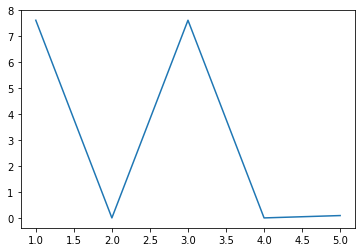

In [752]:
plt.plot(byod_scores.loss_score)

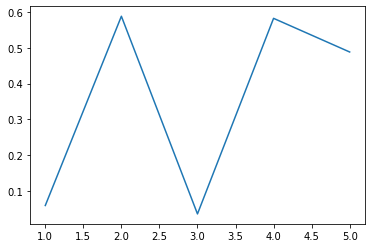

In [753]:
plt.plot(byod_scores.accuracy)

##### Result
This test shows a four layer model has 2nd the best accuracy and lowest loss.

### Test Number of Neurons
using 4 layer model

In [796]:
byod_scores_round2 = pd.DataFrame(np.zeros([4,2]), columns = ['loss_score', 'accuracy'], index = range(8,16,2))

for i in range(8,16,2):
    model = Sequential()
    model.add(Dense(i, input_dim=54, activation='tanh'))
    model.add(Dense(i, input_dim=54, activation='tanh'))
    model.add(Dense(i, input_dim=54, activation='tanh'))
    model.add(Dense(i, input_dim=54, activation='tanh'))
    model.add(Dense(1, input_dim=54, activation='tanh'))
    model.summary()
    sgd = SGD(lr=0.1)
    model.compile(loss='binary_crossentropy', optimizer='sgd', metrics = ['accuracy'])
    model.fit(byodX, byodY, batch_size=4, epochs=400) 
    byod_scores_round2.loc[i] = model.evaluate(byodX, byodY)

Model: "sequential_429"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1246 (Dense)           (None, 8)                 440       
_________________________________________________________________
dense_1247 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_1248 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_1249 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_1250 (Dense)           (None, 1)                 9         
Total params: 665
Trainable params: 665
Non-trainable params: 0
_________________________________________________________________
Epoch 1/400
170/170 [==============================] - 0s 1ms/step - loss: 1.3498 - accuracy: 0.6941
Epoch 2/400
170/170

170/170 [==============================] - 0s 553us/step - loss: 0.0918 - accuracy: 0.5235
Epoch 71/400
170/170 [==============================] - 0s 447us/step - loss: 0.0918 - accuracy: 0.5235
Epoch 72/400
170/170 [==============================] - 0s 484us/step - loss: 0.0917 - accuracy: 0.5235
Epoch 73/400
170/170 [==============================] - 0s 478us/step - loss: 0.0917 - accuracy: 0.5235
Epoch 74/400
170/170 [==============================] - 0s 502us/step - loss: 0.0917 - accuracy: 0.5235
Epoch 75/400
170/170 [==============================] - 0s 485us/step - loss: 0.0917 - accuracy: 0.5235
Epoch 76/400
170/170 [==============================] - 0s 470us/step - loss: 0.0916 - accuracy: 0.5235
Epoch 77/400
170/170 [==============================] - 0s 481us/step - loss: 0.0916 - accuracy: 0.5235
Epoch 78/400
170/170 [==============================] - 0s 490us/step - loss: 0.0916 - accuracy: 0.5235
Epoch 79/400
170/170 [==============================] - 0s 478us/step - loss:

170/170 [==============================] - 0s 492us/step - loss: 0.0912 - accuracy: 0.5176
Epoch 149/400
170/170 [==============================] - 0s 526us/step - loss: 0.0912 - accuracy: 0.5176
Epoch 150/400
170/170 [==============================] - 0s 457us/step - loss: 0.0912 - accuracy: 0.5176
Epoch 151/400
170/170 [==============================] - 0s 455us/step - loss: 0.0912 - accuracy: 0.5176
Epoch 152/400
170/170 [==============================] - 0s 484us/step - loss: 0.0912 - accuracy: 0.5176
Epoch 153/400
170/170 [==============================] - 0s 459us/step - loss: 0.0912 - accuracy: 0.5176
Epoch 154/400
170/170 [==============================] - 0s 467us/step - loss: 0.0912 - accuracy: 0.5176
Epoch 155/400
170/170 [==============================] - 0s 505us/step - loss: 0.0912 - accuracy: 0.5176
Epoch 156/400
170/170 [==============================] - 0s 550us/step - loss: 0.0911 - accuracy: 0.5176
Epoch 157/400
170/170 [==============================] - 0s 583us/ste

170/170 [==============================] - 0s 510us/step - loss: 0.0910 - accuracy: 0.5000
Epoch 227/400
170/170 [==============================] - 0s 487us/step - loss: 0.0910 - accuracy: 0.5000
Epoch 228/400
170/170 [==============================] - 0s 525us/step - loss: 0.0910 - accuracy: 0.5000
Epoch 229/400
170/170 [==============================] - 0s 480us/step - loss: 0.0910 - accuracy: 0.5000
Epoch 230/400
170/170 [==============================] - 0s 480us/step - loss: 0.0910 - accuracy: 0.5000
Epoch 231/400
170/170 [==============================] - 0s 443us/step - loss: 0.0910 - accuracy: 0.5000
Epoch 232/400
170/170 [==============================] - 0s 476us/step - loss: 0.0910 - accuracy: 0.5000
Epoch 233/400
170/170 [==============================] - 0s 429us/step - loss: 0.0910 - accuracy: 0.5000
Epoch 234/400
170/170 [==============================] - 0s 421us/step - loss: 0.0910 - accuracy: 0.5000
Epoch 235/400
170/170 [==============================] - 0s 531us/ste

170/170 [==============================] - 0s 568us/step - loss: 0.0909 - accuracy: 0.5059
Epoch 304/400
170/170 [==============================] - 0s 460us/step - loss: 0.0909 - accuracy: 0.5059
Epoch 305/400
170/170 [==============================] - 0s 480us/step - loss: 0.0909 - accuracy: 0.5059
Epoch 306/400
170/170 [==============================] - 0s 526us/step - loss: 0.0909 - accuracy: 0.5059
Epoch 307/400
170/170 [==============================] - 0s 468us/step - loss: 0.0909 - accuracy: 0.5059
Epoch 308/400
170/170 [==============================] - 0s 461us/step - loss: 0.0909 - accuracy: 0.5059
Epoch 309/400
170/170 [==============================] - 0s 480us/step - loss: 0.0909 - accuracy: 0.5118
Epoch 310/400
170/170 [==============================] - 0s 467us/step - loss: 0.0909 - accuracy: 0.5118
Epoch 311/400
170/170 [==============================] - 0s 463us/step - loss: 0.0909 - accuracy: 0.5118
Epoch 312/400
170/170 [==============================] - 0s 454us/ste

170/170 [==============================] - 0s 417us/step - loss: 0.0909 - accuracy: 0.5118
Epoch 382/400
170/170 [==============================] - 0s 515us/step - loss: 0.0909 - accuracy: 0.5118
Epoch 383/400
170/170 [==============================] - 0s 452us/step - loss: 0.0909 - accuracy: 0.5118
Epoch 384/400
170/170 [==============================] - 0s 572us/step - loss: 0.0909 - accuracy: 0.5176
Epoch 385/400
170/170 [==============================] - 0s 1ms/step - loss: 0.0909 - accuracy: 0.5176
Epoch 386/400
170/170 [==============================] - 0s 566us/step - loss: 0.0909 - accuracy: 0.5176
Epoch 387/400
170/170 [==============================] - 0s 464us/step - loss: 0.0909 - accuracy: 0.5176
Epoch 388/400
170/170 [==============================] - 0s 532us/step - loss: 0.0909 - accuracy: 0.5176
Epoch 389/400
170/170 [==============================] - 0s 474us/step - loss: 0.0909 - accuracy: 0.5176
Epoch 390/400
170/170 [==============================] - 0s 482us/step 

170/170 [==============================] - 0s 576us/step - loss: 7.6217 - accuracy: 0.0294
Epoch 50/400
170/170 [==============================] - 0s 494us/step - loss: 7.6217 - accuracy: 0.0294
Epoch 51/400
170/170 [==============================] - 0s 494us/step - loss: 7.6217 - accuracy: 0.0294
Epoch 52/400
170/170 [==============================] - 0s 458us/step - loss: 7.6217 - accuracy: 0.0294
Epoch 53/400
170/170 [==============================] - 0s 512us/step - loss: 7.6217 - accuracy: 0.0294
Epoch 54/400
170/170 [==============================] - 0s 471us/step - loss: 7.6217 - accuracy: 0.0294
Epoch 55/400
170/170 [==============================] - 0s 472us/step - loss: 7.6217 - accuracy: 0.0294
Epoch 56/400
170/170 [==============================] - 0s 488us/step - loss: 7.6217 - accuracy: 0.0294
Epoch 57/400
170/170 [==============================] - 0s 470us/step - loss: 7.6217 - accuracy: 0.0294
Epoch 58/400
170/170 [==============================] - 0s 583us/step - loss:

170/170 [==============================] - 0s 507us/step - loss: 7.6217 - accuracy: 0.0294
Epoch 128/400
170/170 [==============================] - 0s 534us/step - loss: 7.6217 - accuracy: 0.0294
Epoch 129/400
170/170 [==============================] - 0s 474us/step - loss: 7.6217 - accuracy: 0.0294
Epoch 130/400
170/170 [==============================] - 0s 481us/step - loss: 7.6217 - accuracy: 0.0294
Epoch 131/400
170/170 [==============================] - 0s 503us/step - loss: 7.6217 - accuracy: 0.0294
Epoch 132/400
170/170 [==============================] - 0s 463us/step - loss: 7.6217 - accuracy: 0.0294
Epoch 133/400
170/170 [==============================] - 0s 550us/step - loss: 7.6217 - accuracy: 0.0294
Epoch 134/400
170/170 [==============================] - 0s 468us/step - loss: 7.6217 - accuracy: 0.0294
Epoch 135/400
170/170 [==============================] - 0s 481us/step - loss: 7.6217 - accuracy: 0.0294
Epoch 136/400
170/170 [==============================] - 0s 497us/ste

170/170 [==============================] - 0s 489us/step - loss: 7.6217 - accuracy: 0.0294
Epoch 206/400
170/170 [==============================] - 0s 517us/step - loss: 7.6217 - accuracy: 0.0294
Epoch 207/400
170/170 [==============================] - 0s 491us/step - loss: 7.6217 - accuracy: 0.0294
Epoch 208/400
170/170 [==============================] - 0s 455us/step - loss: 7.6217 - accuracy: 0.0294
Epoch 209/400
170/170 [==============================] - 0s 449us/step - loss: 7.6217 - accuracy: 0.0294
Epoch 210/400
170/170 [==============================] - 0s 498us/step - loss: 7.6217 - accuracy: 0.0294
Epoch 211/400
170/170 [==============================] - 0s 434us/step - loss: 7.6217 - accuracy: 0.0294
Epoch 212/400
170/170 [==============================] - 0s 479us/step - loss: 7.6217 - accuracy: 0.0294
Epoch 213/400
170/170 [==============================] - 0s 484us/step - loss: 7.6217 - accuracy: 0.0294
Epoch 214/400
170/170 [==============================] - 0s 510us/ste

170/170 [==============================] - 0s 541us/step - loss: 7.6217 - accuracy: 0.0294
Epoch 284/400
170/170 [==============================] - 0s 548us/step - loss: 7.6217 - accuracy: 0.0294
Epoch 285/400
170/170 [==============================] - 0s 454us/step - loss: 7.6217 - accuracy: 0.0294
Epoch 286/400
170/170 [==============================] - 0s 445us/step - loss: 7.6217 - accuracy: 0.0294
Epoch 287/400
170/170 [==============================] - 0s 479us/step - loss: 7.6217 - accuracy: 0.0294
Epoch 288/400
170/170 [==============================] - 0s 437us/step - loss: 7.6217 - accuracy: 0.0294
Epoch 289/400
170/170 [==============================] - 0s 428us/step - loss: 7.6217 - accuracy: 0.0294
Epoch 290/400
170/170 [==============================] - 0s 479us/step - loss: 7.6217 - accuracy: 0.0294
Epoch 291/400
170/170 [==============================] - 0s 472us/step - loss: 7.6217 - accuracy: 0.0294
Epoch 292/400
170/170 [==============================] - 0s 473us/ste

170/170 [==============================] - 0s 623us/step - loss: 7.6217 - accuracy: 0.0294
Epoch 362/400
170/170 [==============================] - 0s 499us/step - loss: 7.6217 - accuracy: 0.0294
Epoch 363/400
170/170 [==============================] - 0s 482us/step - loss: 7.6217 - accuracy: 0.0294
Epoch 364/400
170/170 [==============================] - 0s 472us/step - loss: 7.6217 - accuracy: 0.0294
Epoch 365/400
170/170 [==============================] - 0s 478us/step - loss: 7.6217 - accuracy: 0.0294
Epoch 366/400
170/170 [==============================] - 0s 450us/step - loss: 7.6217 - accuracy: 0.0294
Epoch 367/400
170/170 [==============================] - 0s 440us/step - loss: 7.6217 - accuracy: 0.0294
Epoch 368/400
170/170 [==============================] - 0s 483us/step - loss: 7.6217 - accuracy: 0.0294
Epoch 369/400
170/170 [==============================] - 0s 484us/step - loss: 7.6217 - accuracy: 0.0294
Epoch 370/400
170/170 [==============================] - 0s 485us/ste

170/170 [==============================] - 0s 764us/step - loss: 7.6217 - accuracy: 0.0235
Epoch 30/400
170/170 [==============================] - 0s 468us/step - loss: 7.6217 - accuracy: 0.0235
Epoch 31/400
170/170 [==============================] - 0s 544us/step - loss: 7.6217 - accuracy: 0.0235
Epoch 32/400
170/170 [==============================] - 0s 452us/step - loss: 7.6217 - accuracy: 0.0235
Epoch 33/400
170/170 [==============================] - 0s 493us/step - loss: 7.6217 - accuracy: 0.0235
Epoch 34/400
170/170 [==============================] - 0s 461us/step - loss: 7.6217 - accuracy: 0.0235
Epoch 35/400
170/170 [==============================] - 0s 453us/step - loss: 7.6217 - accuracy: 0.0235
Epoch 36/400
170/170 [==============================] - 0s 454us/step - loss: 7.6217 - accuracy: 0.0235
Epoch 37/400
170/170 [==============================] - 0s 438us/step - loss: 7.6217 - accuracy: 0.0235
Epoch 38/400
170/170 [==============================] - 0s 470us/step - loss:

170/170 [==============================] - 0s 499us/step - loss: 7.6217 - accuracy: 0.0235
Epoch 108/400
170/170 [==============================] - 0s 498us/step - loss: 7.6217 - accuracy: 0.0235
Epoch 109/400
170/170 [==============================] - 0s 468us/step - loss: 7.6217 - accuracy: 0.0235
Epoch 110/400
170/170 [==============================] - 0s 497us/step - loss: 7.6217 - accuracy: 0.0235
Epoch 111/400
170/170 [==============================] - 0s 489us/step - loss: 7.6217 - accuracy: 0.0235
Epoch 112/400
170/170 [==============================] - 0s 496us/step - loss: 7.6217 - accuracy: 0.0235
Epoch 113/400
170/170 [==============================] - 0s 437us/step - loss: 7.6217 - accuracy: 0.0235
Epoch 114/400
170/170 [==============================] - 0s 483us/step - loss: 7.6217 - accuracy: 0.0235
Epoch 115/400
170/170 [==============================] - 0s 472us/step - loss: 7.6217 - accuracy: 0.0235
Epoch 116/400
170/170 [==============================] - 0s 484us/ste

170/170 [==============================] - 0s 548us/step - loss: 7.6217 - accuracy: 0.0235
Epoch 186/400
170/170 [==============================] - 0s 513us/step - loss: 7.6217 - accuracy: 0.0235
Epoch 187/400
170/170 [==============================] - 0s 492us/step - loss: 7.6217 - accuracy: 0.0235
Epoch 188/400
170/170 [==============================] - 0s 433us/step - loss: 7.6217 - accuracy: 0.0235
Epoch 189/400
170/170 [==============================] - 0s 498us/step - loss: 7.6217 - accuracy: 0.0235
Epoch 190/400
170/170 [==============================] - 0s 525us/step - loss: 7.6217 - accuracy: 0.0235
Epoch 191/400
170/170 [==============================] - 0s 532us/step - loss: 7.6217 - accuracy: 0.0235
Epoch 192/400
170/170 [==============================] - 0s 509us/step - loss: 7.6217 - accuracy: 0.0235
Epoch 193/400
170/170 [==============================] - 0s 472us/step - loss: 7.6217 - accuracy: 0.0235
Epoch 194/400
170/170 [==============================] - 0s 465us/ste

170/170 [==============================] - 0s 477us/step - loss: 7.6217 - accuracy: 0.0235
Epoch 264/400
170/170 [==============================] - ETA: 0s - loss: 7.9393 - accuracy: 0.0294    - 0s 565us/step - loss: 7.6217 - accuracy: 0.0235
Epoch 265/400
170/170 [==============================] - 0s 438us/step - loss: 7.6217 - accuracy: 0.0235
Epoch 266/400
170/170 [==============================] - 0s 579us/step - loss: 7.6217 - accuracy: 0.0235
Epoch 267/400
170/170 [==============================] - 0s 457us/step - loss: 7.6217 - accuracy: 0.0235
Epoch 268/400
170/170 [==============================] - 0s 517us/step - loss: 7.6217 - accuracy: 0.0235
Epoch 269/400
170/170 [==============================] - 0s 500us/step - loss: 7.6217 - accuracy: 0.0235
Epoch 270/400
170/170 [==============================] - 0s 453us/step - loss: 7.6217 - accuracy: 0.0235
Epoch 271/400
170/170 [==============================] - 0s 451us/step - loss: 7.6217 - accuracy: 0.0235
Epoch 272/400
170/170 

170/170 [==============================] - 0s 519us/step - loss: 7.6217 - accuracy: 0.0235
Epoch 341/400
170/170 [==============================] - 0s 482us/step - loss: 7.6217 - accuracy: 0.0235
Epoch 342/400
170/170 [==============================] - 0s 473us/step - loss: 7.6217 - accuracy: 0.0235
Epoch 343/400
170/170 [==============================] - 0s 464us/step - loss: 7.6217 - accuracy: 0.0235
Epoch 344/400
170/170 [==============================] - 0s 464us/step - loss: 7.6217 - accuracy: 0.0235
Epoch 345/400
170/170 [==============================] - 0s 473us/step - loss: 7.6217 - accuracy: 0.0235
Epoch 346/400
170/170 [==============================] - 0s 516us/step - loss: 7.6217 - accuracy: 0.0235
Epoch 347/400
170/170 [==============================] - 0s 476us/step - loss: 7.6217 - accuracy: 0.0235
Epoch 348/400
170/170 [==============================] - 0s 477us/step - loss: 7.6217 - accuracy: 0.0235
Epoch 349/400
170/170 [==============================] - 0s 471us/ste

170/170 [==============================] - 0s 529us/step - loss: 0.0995 - accuracy: 0.6059
Epoch 9/400
170/170 [==============================] - 0s 493us/step - loss: 0.0982 - accuracy: 0.6000
Epoch 10/400
170/170 [==============================] - 0s 482us/step - loss: 0.0967 - accuracy: 0.6000
Epoch 11/400
170/170 [==============================] - 0s 432us/step - loss: 0.0957 - accuracy: 0.6176
Epoch 12/400
170/170 [==============================] - 0s 413us/step - loss: 0.0951 - accuracy: 0.6235
Epoch 13/400
170/170 [==============================] - 0s 526us/step - loss: 0.0952 - accuracy: 0.6000
Epoch 14/400
170/170 [==============================] - 0s 551us/step - loss: 0.0947 - accuracy: 0.5941
Epoch 15/400
170/170 [==============================] - 0s 486us/step - loss: 0.0943 - accuracy: 0.5941
Epoch 16/400
170/170 [==============================] - 0s 569us/step - loss: 0.0939 - accuracy: 0.5941
Epoch 17/400
170/170 [==============================] - 0s 466us/step - loss: 

170/170 [==============================] - 0s 512us/step - loss: 0.0912 - accuracy: 0.5941
Epoch 87/400
170/170 [==============================] - 0s 483us/step - loss: 0.0912 - accuracy: 0.5941
Epoch 88/400
170/170 [==============================] - 0s 450us/step - loss: 0.0912 - accuracy: 0.5647
Epoch 89/400
170/170 [==============================] - 0s 586us/step - loss: 0.0912 - accuracy: 0.5529
Epoch 90/400
170/170 [==============================] - 0s 472us/step - loss: 0.0912 - accuracy: 0.5529
Epoch 91/400
170/170 [==============================] - 0s 454us/step - loss: 0.0912 - accuracy: 0.5529
Epoch 92/400
170/170 [==============================] - 0s 440us/step - loss: 0.0912 - accuracy: 0.5529
Epoch 93/400
170/170 [==============================] - 0s 428us/step - loss: 0.0912 - accuracy: 0.5529
Epoch 94/400
170/170 [==============================] - 0s 470us/step - loss: 0.0912 - accuracy: 0.5529
Epoch 95/400
170/170 [==============================] - 0s 436us/step - loss:

170/170 [==============================] - 0s 506us/step - loss: 0.0910 - accuracy: 0.5882
Epoch 165/400
170/170 [==============================] - 0s 524us/step - loss: 0.0910 - accuracy: 0.5882
Epoch 166/400
170/170 [==============================] - 0s 479us/step - loss: 0.0910 - accuracy: 0.5882
Epoch 167/400
170/170 [==============================] - 0s 492us/step - loss: 0.0910 - accuracy: 0.5882
Epoch 168/400
170/170 [==============================] - 0s 484us/step - loss: 0.0910 - accuracy: 0.5882
Epoch 169/400
170/170 [==============================] - 0s 474us/step - loss: 0.0910 - accuracy: 0.5882
Epoch 170/400
170/170 [==============================] - 0s 483us/step - loss: 0.0910 - accuracy: 0.5706
Epoch 171/400
170/170 [==============================] - 0s 492us/step - loss: 0.0910 - accuracy: 0.5176
Epoch 172/400
170/170 [==============================] - 0s 443us/step - loss: 0.0910 - accuracy: 0.5176
Epoch 173/400
170/170 [==============================] - 0s 466us/ste

170/170 [==============================] - 0s 706us/step - loss: 0.0909 - accuracy: 0.5765
Epoch 243/400
170/170 [==============================] - 0s 696us/step - loss: 0.0909 - accuracy: 0.5765
Epoch 244/400
170/170 [==============================] - 0s 840us/step - loss: 0.0909 - accuracy: 0.5765
Epoch 245/400
170/170 [==============================] - 0s 607us/step - loss: 0.0909 - accuracy: 0.5765
Epoch 246/400
170/170 [==============================] - 0s 512us/step - loss: 0.0909 - accuracy: 0.5765
Epoch 247/400
170/170 [==============================] - 0s 504us/step - loss: 0.0909 - accuracy: 0.5765
Epoch 248/400
170/170 [==============================] - 0s 468us/step - loss: 0.0909 - accuracy: 0.5824
Epoch 249/400
170/170 [==============================] - 0s 488us/step - loss: 0.0909 - accuracy: 0.5824
Epoch 250/400
170/170 [==============================] - 0s 498us/step - loss: 0.0909 - accuracy: 0.5824
Epoch 251/400
170/170 [==============================] - 0s 526us/ste

170/170 [==============================] - 0s 521us/step - loss: 0.0909 - accuracy: 0.5471
Epoch 321/400
170/170 [==============================] - 0s 434us/step - loss: 0.0909 - accuracy: 0.5471
Epoch 322/400
170/170 [==============================] - 0s 458us/step - loss: 0.0909 - accuracy: 0.5471
Epoch 323/400
170/170 [==============================] - 0s 466us/step - loss: 0.0909 - accuracy: 0.5471
Epoch 324/400
170/170 [==============================] - 0s 460us/step - loss: 0.0909 - accuracy: 0.5471
Epoch 325/400
170/170 [==============================] - 0s 428us/step - loss: 0.0909 - accuracy: 0.5471
Epoch 326/400
170/170 [==============================] - 0s 467us/step - loss: 0.0909 - accuracy: 0.5471
Epoch 327/400
170/170 [==============================] - 0s 464us/step - loss: 0.0909 - accuracy: 0.5471
Epoch 328/400
170/170 [==============================] - 0s 557us/step - loss: 0.0909 - accuracy: 0.5471
Epoch 329/400
170/170 [==============================] - 0s 498us/ste

170/170 [==============================] - 0s 412us/step - loss: 0.0908 - accuracy: 0.5118
Epoch 399/400
170/170 [==============================] - 0s 542us/step - loss: 0.0908 - accuracy: 0.5118
Epoch 400/400
170/170 [==============================] - 0s 268us/step


In [755]:
byod_scores_round2

,loss_score,accuracy
8,7.621739,0.023529
10,0.090941,0.594118
12,0.000142,0.611765
14,0.090830,0.541176


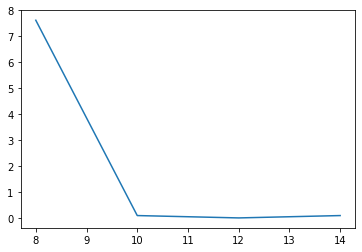

In [756]:
plt.plot(byod_scores_round2.loss_score)

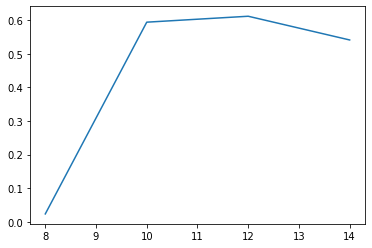

In [757]:
plt.plot(byod_scores_round2.accuracy)

This test shows that an 10 neuron model has the best accuracy and lowest loss. 

### Test For Best Activation

In [801]:
activations = ['tanh', 'sigmoid', 'relu', 'exponential', 'linear', 'hard_sigmoid']

byod_scores_round3 = pd.DataFrame(np.zeros([len(activations),2]), columns = ['loss_score', 'accuracy'], index = activations)

for i in activations:
    model = Sequential()
    model.add(Dense(10, input_dim=54, activation=i))
    model.add(Dense(10, input_dim=54, activation=i))
    model.add(Dense(10, input_dim=54, activation=i))
    model.add(Dense(10, input_dim=54, activation=i))
    model.add(Dense(1, activation= i))
    model.summary()
    sgd = SGD(lr=0.1)
    model.compile(loss='binary_crossentropy', optimizer='sgd', metrics = ['accuracy'])
    model.fit(byodX, byodY, batch_size=4, epochs=400) 
    byod_scores_round3.loc[i] = model.evaluate(byodX, byodY)

Model: "sequential_440"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1301 (Dense)           (None, 10)                550       
_________________________________________________________________
dense_1302 (Dense)           (None, 10)                110       
_________________________________________________________________
dense_1303 (Dense)           (None, 10)                110       
_________________________________________________________________
dense_1304 (Dense)           (None, 10)                110       
_________________________________________________________________
dense_1305 (Dense)           (None, 1)                 11        
Total params: 891
Trainable params: 891
Non-trainable params: 0
_________________________________________________________________
Epoch 1/400
170/170 [==============================] - 0s 1ms/step - loss: 0.3785 - accuracy: 0.6765
Epoch 2/400
170/170

170/170 [==============================] - 0s 530us/step - loss: 0.0916 - accuracy: 0.5353
Epoch 71/400
170/170 [==============================] - 0s 501us/step - loss: 0.0916 - accuracy: 0.5353
Epoch 72/400
170/170 [==============================] - 0s 465us/step - loss: 0.0916 - accuracy: 0.5353
Epoch 73/400
170/170 [==============================] - 0s 475us/step - loss: 0.0916 - accuracy: 0.5353
Epoch 74/400
170/170 [==============================] - 0s 517us/step - loss: 0.0915 - accuracy: 0.5353
Epoch 75/400
170/170 [==============================] - 0s 438us/step - loss: 0.0915 - accuracy: 0.5353
Epoch 76/400
170/170 [==============================] - 0s 450us/step - loss: 0.0915 - accuracy: 0.5353
Epoch 77/400
170/170 [==============================] - 0s 454us/step - loss: 0.0915 - accuracy: 0.5353
Epoch 78/400
170/170 [==============================] - 0s 488us/step - loss: 0.0915 - accuracy: 0.5353
Epoch 79/400
170/170 [==============================] - 0s 491us/step - loss:

170/170 [==============================] - 0s 602us/step - loss: 0.0912 - accuracy: 0.5059
Epoch 149/400
170/170 [==============================] - 0s 476us/step - loss: 0.0912 - accuracy: 0.4941
Epoch 150/400
170/170 [==============================] - 0s 444us/step - loss: 0.0912 - accuracy: 0.5000
Epoch 151/400
170/170 [==============================] - 0s 437us/step - loss: 0.0912 - accuracy: 0.5000
Epoch 152/400
170/170 [==============================] - 0s 534us/step - loss: 0.0912 - accuracy: 0.5000
Epoch 153/400
170/170 [==============================] - 0s 482us/step - loss: 0.0912 - accuracy: 0.5000
Epoch 154/400
170/170 [==============================] - 0s 503us/step - loss: 0.0912 - accuracy: 0.5000
Epoch 155/400
170/170 [==============================] - 0s 479us/step - loss: 0.0911 - accuracy: 0.5000
Epoch 156/400
170/170 [==============================] - 0s 473us/step - loss: 0.0911 - accuracy: 0.5000
Epoch 157/400
170/170 [==============================] - 0s 490us/ste

170/170 [==============================] - 0s 822us/step - loss: 0.0910 - accuracy: 0.5235
Epoch 227/400
170/170 [==============================] - 0s 713us/step - loss: 0.0910 - accuracy: 0.5235
Epoch 228/400
170/170 [==============================] - 0s 805us/step - loss: 0.0910 - accuracy: 0.5235
Epoch 229/400
170/170 [==============================] - 0s 883us/step - loss: 0.0910 - accuracy: 0.5235
Epoch 230/400
170/170 [==============================] - 0s 801us/step - loss: 0.0910 - accuracy: 0.5235
Epoch 231/400
170/170 [==============================] - 0s 722us/step - loss: 0.0910 - accuracy: 0.5235
Epoch 232/400
170/170 [==============================] - 0s 648us/step - loss: 0.0910 - accuracy: 0.5235
Epoch 233/400
170/170 [==============================] - 0s 434us/step - loss: 0.0910 - accuracy: 0.5235
Epoch 234/400
170/170 [==============================] - 0s 505us/step - loss: 0.0910 - accuracy: 0.5235
Epoch 235/400
170/170 [==============================] - 0s 519us/ste

170/170 [==============================] - 0s 574us/step - loss: 0.0909 - accuracy: 0.4941
Epoch 305/400
170/170 [==============================] - 0s 497us/step - loss: 0.0909 - accuracy: 0.4941
Epoch 306/400
170/170 [==============================] - 0s 472us/step - loss: 0.0909 - accuracy: 0.4941
Epoch 307/400
170/170 [==============================] - 0s 489us/step - loss: 0.0909 - accuracy: 0.4941
Epoch 308/400
170/170 [==============================] - 0s 471us/step - loss: 0.0909 - accuracy: 0.4941
Epoch 309/400
170/170 [==============================] - 0s 471us/step - loss: 0.0909 - accuracy: 0.4941
Epoch 310/400
170/170 [==============================] - 0s 490us/step - loss: 0.0909 - accuracy: 0.4941
Epoch 311/400
170/170 [==============================] - 0s 501us/step - loss: 0.0909 - accuracy: 0.4941
Epoch 312/400
170/170 [==============================] - 0s 488us/step - loss: 0.0909 - accuracy: 0.4941
Epoch 313/400
170/170 [==============================] - 0s 482us/ste

170/170 [==============================] - 0s 507us/step - loss: 0.0909 - accuracy: 0.5118
Epoch 382/400
170/170 [==============================] - 0s 539us/step - loss: 0.0909 - accuracy: 0.5118
Epoch 383/400
170/170 [==============================] - 0s 446us/step - loss: 0.0909 - accuracy: 0.5118
Epoch 384/400
170/170 [==============================] - 0s 446us/step - loss: 0.0909 - accuracy: 0.5118
Epoch 385/400
170/170 [==============================] - 0s 474us/step - loss: 0.0909 - accuracy: 0.5118
Epoch 386/400
170/170 [==============================] - 0s 475us/step - loss: 0.0909 - accuracy: 0.5118
Epoch 387/400
170/170 [==============================] - 0s 491us/step - loss: 0.0909 - accuracy: 0.5118
Epoch 388/400
170/170 [==============================] - 0s 503us/step - loss: 0.0909 - accuracy: 0.5118
Epoch 389/400
170/170 [==============================] - 0s 486us/step - loss: 0.0909 - accuracy: 0.5118
Epoch 390/400
170/170 [==============================] - 0s 446us/ste

170/170 [==============================] - 0s 485us/step - loss: 0.6925 - accuracy: 0.5529
Epoch 50/400
170/170 [==============================] - 0s 471us/step - loss: 0.6924 - accuracy: 0.5059
Epoch 51/400
170/170 [==============================] - 0s 419us/step - loss: 0.6921 - accuracy: 0.5471
Epoch 52/400
170/170 [==============================] - 0s 486us/step - loss: 0.6921 - accuracy: 0.5059
Epoch 53/400
170/170 [==============================] - 0s 441us/step - loss: 0.6925 - accuracy: 0.5235
Epoch 54/400
170/170 [==============================] - 0s 473us/step - loss: 0.6921 - accuracy: 0.5235
Epoch 55/400
170/170 [==============================] - 0s 452us/step - loss: 0.6918 - accuracy: 0.5294
Epoch 56/400
170/170 [==============================] - 0s 404us/step - loss: 0.6922 - accuracy: 0.5235
Epoch 57/400
170/170 [==============================] - 0s 456us/step - loss: 0.6921 - accuracy: 0.5882
Epoch 58/400
170/170 [==============================] - 0s 526us/step - loss:

170/170 [==============================] - 0s 498us/step - loss: 0.6840 - accuracy: 0.6412
Epoch 128/400
170/170 [==============================] - 0s 486us/step - loss: 0.6838 - accuracy: 0.5882
Epoch 129/400
170/170 [==============================] - 0s 512us/step - loss: 0.6843 - accuracy: 0.7941
Epoch 130/400
170/170 [==============================] - 0s 467us/step - loss: 0.6833 - accuracy: 0.8529
Epoch 131/400
170/170 [==============================] - 0s 413us/step - loss: 0.6836 - accuracy: 0.6471
Epoch 132/400
170/170 [==============================] - 0s 445us/step - loss: 0.6834 - accuracy: 0.7059
Epoch 133/400
170/170 [==============================] - 0s 442us/step - loss: 0.6829 - accuracy: 0.8941
Epoch 134/400
170/170 [==============================] - 0s 466us/step - loss: 0.6826 - accuracy: 0.6353
Epoch 135/400
170/170 [==============================] - 0s 468us/step - loss: 0.6825 - accuracy: 0.7353
Epoch 136/400
170/170 [==============================] - 0s 445us/ste

170/170 [==============================] - 0s 484us/step - loss: 0.6258 - accuracy: 0.9765
Epoch 206/400
170/170 [==============================] - 0s 490us/step - loss: 0.6235 - accuracy: 0.9824
Epoch 207/400
170/170 [==============================] - 0s 405us/step - loss: 0.6216 - accuracy: 0.9765
Epoch 208/400
170/170 [==============================] - 0s 441us/step - loss: 0.6187 - accuracy: 0.9765
Epoch 209/400
170/170 [==============================] - 0s 429us/step - loss: 0.6161 - accuracy: 0.9706
Epoch 210/400
170/170 [==============================] - 0s 427us/step - loss: 0.6131 - accuracy: 0.9765
Epoch 211/400
170/170 [==============================] - 0s 482us/step - loss: 0.6105 - accuracy: 0.9765
Epoch 212/400
170/170 [==============================] - 0s 420us/step - loss: 0.6078 - accuracy: 0.9824
Epoch 213/400
170/170 [==============================] - 0s 417us/step - loss: 0.6044 - accuracy: 0.9765
Epoch 214/400
170/170 [==============================] - 0s 433us/ste

170/170 [==============================] - 0s 396us/step - loss: 0.1530 - accuracy: 0.9824
Epoch 284/400
170/170 [==============================] - 0s 530us/step - loss: 0.1496 - accuracy: 0.9824
Epoch 285/400
170/170 [==============================] - 0s 453us/step - loss: 0.1464 - accuracy: 0.9824
Epoch 286/400
170/170 [==============================] - 0s 458us/step - loss: 0.1434 - accuracy: 0.9824
Epoch 287/400
170/170 [==============================] - 0s 492us/step - loss: 0.1404 - accuracy: 0.9824
Epoch 288/400
170/170 [==============================] - 0s 449us/step - loss: 0.1376 - accuracy: 0.9824
Epoch 289/400
170/170 [==============================] - 0s 474us/step - loss: 0.1349 - accuracy: 0.9824
Epoch 290/400
170/170 [==============================] - 0s 444us/step - loss: 0.1320 - accuracy: 0.9824
Epoch 291/400
170/170 [==============================] - 0s 437us/step - loss: 0.1293 - accuracy: 0.9824
Epoch 292/400
170/170 [==============================] - 0s 480us/ste

170/170 [==============================] - 0s 428us/step - loss: 0.0333 - accuracy: 1.0000
Epoch 362/400
170/170 [==============================] - 0s 536us/step - loss: 0.0327 - accuracy: 1.0000
Epoch 363/400
170/170 [==============================] - 0s 429us/step - loss: 0.0322 - accuracy: 1.0000
Epoch 364/400
170/170 [==============================] - 0s 523us/step - loss: 0.0317 - accuracy: 1.0000
Epoch 365/400
170/170 [==============================] - 0s 449us/step - loss: 0.0313 - accuracy: 1.0000
Epoch 366/400
170/170 [==============================] - 0s 449us/step - loss: 0.0308 - accuracy: 1.0000
Epoch 367/400
170/170 [==============================] - 0s 471us/step - loss: 0.0303 - accuracy: 1.0000
Epoch 368/400
170/170 [==============================] - 0s 425us/step - loss: 0.0299 - accuracy: 1.0000
Epoch 369/400
170/170 [==============================] - 0s 438us/step - loss: 0.0294 - accuracy: 1.0000
Epoch 370/400
170/170 [==============================] - 0s 443us/ste

170/170 [==============================] - 0s 402us/step - loss: 0.0111 - accuracy: 0.5235
Epoch 30/400
170/170 [==============================] - 0s 506us/step - loss: 0.0097 - accuracy: 0.5235
Epoch 31/400
170/170 [==============================] - 0s 479us/step - loss: 0.0086 - accuracy: 0.5294
Epoch 32/400
170/170 [==============================] - 0s 481us/step - loss: 0.0089 - accuracy: 0.5294
Epoch 33/400
170/170 [==============================] - 0s 473us/step - loss: 0.0094 - accuracy: 0.5294
Epoch 34/400
170/170 [==============================] - 0s 484us/step - loss: 0.0077 - accuracy: 0.5294
Epoch 35/400
170/170 [==============================] - 0s 531us/step - loss: 0.0060 - accuracy: 0.5294
Epoch 36/400
170/170 [==============================] - 0s 496us/step - loss: 0.0078 - accuracy: 0.5235
Epoch 37/400
170/170 [==============================] - 0s 463us/step - loss: 0.0070 - accuracy: 0.5235
Epoch 38/400
170/170 [==============================] - 0s 455us/step - loss:

170/170 [==============================] - 0s 531us/step - loss: 0.0000e+00 - accuracy: 0.5235
Epoch 107/400
170/170 [==============================] - 0s 431us/step - loss: 0.0000e+00 - accuracy: 0.5235
Epoch 108/400
170/170 [==============================] - 0s 470us/step - loss: 0.0000e+00 - accuracy: 0.5235
Epoch 109/400
170/170 [==============================] - 0s 503us/step - loss: 0.0000e+00 - accuracy: 0.5235
Epoch 110/400
170/170 [==============================] - 0s 475us/step - loss: 0.0000e+00 - accuracy: 0.5235
Epoch 111/400
170/170 [==============================] - 0s 495us/step - loss: 0.0000e+00 - accuracy: 0.5235
Epoch 112/400
170/170 [==============================] - 0s 479us/step - loss: 0.0000e+00 - accuracy: 0.5235
Epoch 113/400
170/170 [==============================] - 0s 443us/step - loss: 0.0000e+00 - accuracy: 0.5235
Epoch 114/400
170/170 [==============================] - 0s 489us/step - loss: 0.0000e+00 - accuracy: 0.5235
Epoch 115/400
170/170 [==========

170/170 [==============================] - 0s 557us/step - loss: 0.0000e+00 - accuracy: 0.5235
Epoch 182/400
170/170 [==============================] - 0s 467us/step - loss: 0.0000e+00 - accuracy: 0.5235
Epoch 183/400
170/170 [==============================] - 0s 474us/step - loss: 0.0000e+00 - accuracy: 0.5235
Epoch 184/400
170/170 [==============================] - 0s 506us/step - loss: 0.0000e+00 - accuracy: 0.5235
Epoch 185/400
170/170 [==============================] - 0s 478us/step - loss: 0.0000e+00 - accuracy: 0.5235
Epoch 186/400
170/170 [==============================] - 0s 434us/step - loss: 0.0000e+00 - accuracy: 0.5235
Epoch 187/400
170/170 [==============================] - 0s 511us/step - loss: 0.0000e+00 - accuracy: 0.5235
Epoch 188/400
170/170 [==============================] - 0s 496us/step - loss: 0.0000e+00 - accuracy: 0.5235
Epoch 189/400
170/170 [==============================] - 0s 532us/step - loss: 0.0000e+00 - accuracy: 0.5235
Epoch 190/400
170/170 [==========

170/170 [==============================] - 0s 520us/step - loss: 0.0000e+00 - accuracy: 0.5235
Epoch 257/400
170/170 [==============================] - 0s 559us/step - loss: 0.0000e+00 - accuracy: 0.5235
Epoch 258/400
170/170 [==============================] - 0s 469us/step - loss: 0.0000e+00 - accuracy: 0.5235
Epoch 259/400
170/170 [==============================] - 0s 476us/step - loss: 0.0000e+00 - accuracy: 0.5235
Epoch 260/400
170/170 [==============================] - 0s 467us/step - loss: 0.0000e+00 - accuracy: 0.5235
Epoch 261/400
170/170 [==============================] - 0s 461us/step - loss: 0.0000e+00 - accuracy: 0.5235
Epoch 262/400
170/170 [==============================] - 0s 479us/step - loss: 0.0000e+00 - accuracy: 0.5235
Epoch 263/400
170/170 [==============================] - 0s 479us/step - loss: 0.0000e+00 - accuracy: 0.5235
Epoch 264/400
170/170 [==============================] - 0s 477us/step - loss: 0.0000e+00 - accuracy: 0.5235
Epoch 265/400
170/170 [==========

170/170 [==============================] - 0s 500us/step - loss: 0.0000e+00 - accuracy: 0.5235
Epoch 332/400
170/170 [==============================] - 0s 520us/step - loss: 0.0000e+00 - accuracy: 0.5235
Epoch 333/400
170/170 [==============================] - 0s 479us/step - loss: 0.0000e+00 - accuracy: 0.5235
Epoch 334/400
170/170 [==============================] - 0s 446us/step - loss: 0.0000e+00 - accuracy: 0.5235
Epoch 335/400
170/170 [==============================] - 0s 514us/step - loss: 0.0000e+00 - accuracy: 0.5235
Epoch 336/400
170/170 [==============================] - 0s 507us/step - loss: 0.0000e+00 - accuracy: 0.5235
Epoch 337/400
170/170 [==============================] - 0s 449us/step - loss: 0.0000e+00 - accuracy: 0.5235
Epoch 338/400
170/170 [==============================] - 0s 510us/step - loss: 0.0000e+00 - accuracy: 0.5235
Epoch 339/400
170/170 [==============================] - 0s 476us/step - loss: 0.0000e+00 - accuracy: 0.5235
Epoch 340/400
170/170 [==========

Epoch 1/400
170/170 [==============================] - 0s 1ms/step - loss: nan - accuracy: 0.0000e+00
Epoch 2/400
170/170 [==============================] - 0s 538us/step - loss: nan - accuracy: 0.0000e+00
Epoch 3/400
170/170 [==============================] - 0s 587us/step - loss: nan - accuracy: 0.0000e+00
Epoch 4/400
170/170 [==============================] - 0s 487us/step - loss: nan - accuracy: 0.0000e+00
Epoch 5/400
170/170 [==============================] - 0s 516us/step - loss: nan - accuracy: 0.0000e+00
Epoch 6/400
170/170 [==============================] - 0s 639us/step - loss: nan - accuracy: 0.0000e+00
Epoch 7/400
170/170 [==============================] - 0s 470us/step - loss: nan - accuracy: 0.0000e+00
Epoch 8/400
170/170 [==============================] - 0s 521us/step - loss: nan - accuracy: 0.0000e+00
Epoch 9/400
170/170 [==============================] - 0s 472us/step - loss: nan - accuracy: 0.0000e+00
Epoch 10/400
170/170 [==============================] - 0s 474us/s

170/170 [==============================] - 0s 502us/step - loss: nan - accuracy: 0.0000e+00
Epoch 80/400
170/170 [==============================] - 0s 496us/step - loss: nan - accuracy: 0.0000e+00
Epoch 81/400
170/170 [==============================] - 0s 440us/step - loss: nan - accuracy: 0.0000e+00
Epoch 82/400
170/170 [==============================] - 0s 444us/step - loss: nan - accuracy: 0.0000e+00
Epoch 83/400
170/170 [==============================] - 0s 484us/step - loss: nan - accuracy: 0.0000e+00
Epoch 84/400
170/170 [==============================] - 0s 484us/step - loss: nan - accuracy: 0.0000e+00
Epoch 85/400
170/170 [==============================] - 0s 482us/step - loss: nan - accuracy: 0.0000e+00
Epoch 86/400
170/170 [==============================] - 0s 486us/step - loss: nan - accuracy: 0.0000e+00
Epoch 87/400
170/170 [==============================] - 0s 491us/step - loss: nan - accuracy: 0.0000e+00
Epoch 88/400
170/170 [==============================] - 0s 499us/ste

170/170 [==============================] - 0s 525us/step - loss: nan - accuracy: 0.0000e+00
Epoch 157/400
170/170 [==============================] - 0s 503us/step - loss: nan - accuracy: 0.0000e+00
Epoch 158/400
170/170 [==============================] - 0s 419us/step - loss: nan - accuracy: 0.0000e+00
Epoch 159/400
170/170 [==============================] - 0s 481us/step - loss: nan - accuracy: 0.0000e+00
Epoch 160/400
170/170 [==============================] - 0s 460us/step - loss: nan - accuracy: 0.0000e+00
Epoch 161/400
170/170 [==============================] - 0s 480us/step - loss: nan - accuracy: 0.0000e+00
Epoch 162/400
170/170 [==============================] - 0s 460us/step - loss: nan - accuracy: 0.0000e+00
Epoch 163/400
170/170 [==============================] - 0s 776us/step - loss: nan - accuracy: 0.0000e+00
Epoch 164/400
170/170 [==============================] - 0s 809us/step - loss: nan - accuracy: 0.0000e+00
Epoch 165/400
170/170 [==============================] - 0s 

170/170 [==============================] - 0s 593us/step - loss: nan - accuracy: 0.0000e+00
Epoch 234/400
170/170 [==============================] - 0s 498us/step - loss: nan - accuracy: 0.0000e+00
Epoch 235/400
170/170 [==============================] - 0s 412us/step - loss: nan - accuracy: 0.0000e+00
Epoch 236/400
170/170 [==============================] - 0s 498us/step - loss: nan - accuracy: 0.0000e+00
Epoch 237/400
170/170 [==============================] - 0s 483us/step - loss: nan - accuracy: 0.0000e+00
Epoch 238/400
170/170 [==============================] - 0s 486us/step - loss: nan - accuracy: 0.0000e+00
Epoch 239/400
170/170 [==============================] - 0s 565us/step - loss: nan - accuracy: 0.0000e+00
Epoch 240/400
170/170 [==============================] - 0s 470us/step - loss: nan - accuracy: 0.0000e+00
Epoch 241/400
170/170 [==============================] - 0s 471us/step - loss: nan - accuracy: 0.0000e+00
Epoch 242/400
170/170 [==============================] - 0s 

170/170 [==============================] - 0s 748us/step - loss: nan - accuracy: 0.0000e+00
Epoch 311/400
170/170 [==============================] - 0s 775us/step - loss: nan - accuracy: 0.0000e+00
Epoch 312/400
170/170 [==============================] - 0s 882us/step - loss: nan - accuracy: 0.0000e+00
Epoch 313/400
170/170 [==============================] - 0s 900us/step - loss: nan - accuracy: 0.0000e+00
Epoch 314/400
170/170 [==============================] - 0s 746us/step - loss: nan - accuracy: 0.0000e+00
Epoch 315/400
170/170 [==============================] - 0s 712us/step - loss: nan - accuracy: 0.0000e+00
Epoch 316/400
170/170 [==============================] - 0s 808us/step - loss: nan - accuracy: 0.0000e+00
Epoch 317/400
170/170 [==============================] - 0s 713us/step - loss: nan - accuracy: 0.0000e+00
Epoch 318/400
170/170 [==============================] - 0s 763us/step - loss: nan - accuracy: 0.0000e+00
Epoch 319/400
170/170 [==============================] - 0s 

170/170 [==============================] - 0s 575us/step - loss: nan - accuracy: 0.0000e+00
Epoch 388/400
170/170 [==============================] - 0s 489us/step - loss: nan - accuracy: 0.0000e+00
Epoch 389/400
170/170 [==============================] - 0s 493us/step - loss: nan - accuracy: 0.0000e+00
Epoch 390/400
170/170 [==============================] - 0s 523us/step - loss: nan - accuracy: 0.0000e+00
Epoch 391/400
170/170 [==============================] - 0s 513us/step - loss: nan - accuracy: 0.0000e+00
Epoch 392/400
170/170 [==============================] - 0s 466us/step - loss: nan - accuracy: 0.0000e+00
Epoch 393/400
170/170 [==============================] - 0s 499us/step - loss: nan - accuracy: 0.0000e+00
Epoch 394/400
170/170 [==============================] - 0s 519us/step - loss: nan - accuracy: 0.0000e+00
Epoch 395/400
170/170 [==============================] - 0s 503us/step - loss: nan - accuracy: 0.0000e+00
Epoch 396/400
170/170 [==============================] - 0s 

170/170 [==============================] - 0s 665us/step - loss: 0.0907 - accuracy: 0.1706
Epoch 56/400
170/170 [==============================] - 0s 558us/step - loss: 0.0907 - accuracy: 0.1706
Epoch 57/400
170/170 [==============================] - 0s 491us/step - loss: 0.0907 - accuracy: 0.1706
Epoch 58/400
170/170 [==============================] - 0s 835us/step - loss: 0.0907 - accuracy: 0.1706
Epoch 59/400
170/170 [==============================] - 0s 562us/step - loss: 0.0907 - accuracy: 0.1706
Epoch 60/400
170/170 [==============================] - 0s 581us/step - loss: 0.0907 - accuracy: 0.1706
Epoch 61/400
170/170 [==============================] - 0s 528us/step - loss: 0.0907 - accuracy: 0.1706
Epoch 62/400
170/170 [==============================] - 0s 580us/step - loss: 0.0907 - accuracy: 0.1706
Epoch 63/400
170/170 [==============================] - 0s 542us/step - loss: 0.0907 - accuracy: 0.1706
Epoch 64/400
170/170 [==============================] - 0s 670us/step - loss:

170/170 [==============================] - 0s 1ms/step - loss: 0.0907 - accuracy: 0.1706
Epoch 134/400
170/170 [==============================] - 0s 499us/step - loss: 0.0907 - accuracy: 0.1706
Epoch 135/400
170/170 [==============================] - 0s 532us/step - loss: 0.0907 - accuracy: 0.1706
Epoch 136/400
170/170 [==============================] - 0s 1ms/step - loss: 0.0907 - accuracy: 0.1706
Epoch 137/400
170/170 [==============================] - 0s 395us/step - loss: 0.0907 - accuracy: 0.1706
Epoch 138/400
170/170 [==============================] - 0s 861us/step - loss: 0.0907 - accuracy: 0.1706
Epoch 139/400
170/170 [==============================] - 0s 671us/step - loss: 0.0907 - accuracy: 0.1706
Epoch 140/400
170/170 [==============================] - 0s 454us/step - loss: 0.0907 - accuracy: 0.1706
Epoch 141/400
170/170 [==============================] - 0s 492us/step - loss: 0.0907 - accuracy: 0.1706
Epoch 142/400
170/170 [==============================] - 0s 483us/step - 

170/170 [==============================] - 0s 518us/step - loss: 0.0907 - accuracy: 0.1706
Epoch 212/400
170/170 [==============================] - 0s 494us/step - loss: 0.0907 - accuracy: 0.1706
Epoch 213/400
170/170 [==============================] - 0s 479us/step - loss: 0.0907 - accuracy: 0.1706
Epoch 214/400
170/170 [==============================] - 0s 482us/step - loss: 0.0907 - accuracy: 0.1706
Epoch 215/400
170/170 [==============================] - 0s 526us/step - loss: 0.0907 - accuracy: 0.1706
Epoch 216/400
170/170 [==============================] - 0s 492us/step - loss: 0.0907 - accuracy: 0.1706
Epoch 217/400
170/170 [==============================] - 0s 453us/step - loss: 0.0907 - accuracy: 0.1706
Epoch 218/400
170/170 [==============================] - 0s 442us/step - loss: 0.0907 - accuracy: 0.1706
Epoch 219/400
170/170 [==============================] - 0s 487us/step - loss: 0.0907 - accuracy: 0.1706
Epoch 220/400
170/170 [==============================] - 0s 480us/ste

170/170 [==============================] - 0s 518us/step - loss: 0.0907 - accuracy: 0.1706
Epoch 290/400
170/170 [==============================] - 0s 595us/step - loss: 0.0907 - accuracy: 0.1706
Epoch 291/400
170/170 [==============================] - 0s 465us/step - loss: 0.0907 - accuracy: 0.1706
Epoch 292/400
170/170 [==============================] - 0s 462us/step - loss: 0.0907 - accuracy: 0.1706
Epoch 293/400
170/170 [==============================] - 0s 475us/step - loss: 0.0907 - accuracy: 0.1706
Epoch 294/400
170/170 [==============================] - 0s 458us/step - loss: 0.0907 - accuracy: 0.1706
Epoch 295/400
170/170 [==============================] - 0s 475us/step - loss: 0.0907 - accuracy: 0.1706
Epoch 296/400
170/170 [==============================] - 0s 483us/step - loss: 0.0907 - accuracy: 0.1706
Epoch 297/400
170/170 [==============================] - 0s 489us/step - loss: 0.0907 - accuracy: 0.1706
Epoch 298/400
170/170 [==============================] - 0s 504us/ste

170/170 [==============================] - 0s 657us/step - loss: 0.0907 - accuracy: 0.1706
Epoch 367/400
170/170 [==============================] - 0s 595us/step - loss: 0.0907 - accuracy: 0.1706
Epoch 368/400
170/170 [==============================] - 0s 592us/step - loss: 0.0907 - accuracy: 0.1706
Epoch 369/400
170/170 [==============================] - 0s 581us/step - loss: 0.0907 - accuracy: 0.1706
Epoch 370/400
170/170 [==============================] - 0s 639us/step - loss: 0.0907 - accuracy: 0.1706
Epoch 371/400
170/170 [==============================] - 0s 873us/step - loss: 0.0907 - accuracy: 0.1706
Epoch 372/400
170/170 [==============================] - 0s 757us/step - loss: 0.0907 - accuracy: 0.1706
Epoch 373/400
170/170 [==============================] - 0s 619us/step - loss: 0.0907 - accuracy: 0.1706
Epoch 374/400
170/170 [==============================] - 0s 473us/step - loss: 0.0907 - accuracy: 0.1706
Epoch 375/400
170/170 [==============================] - 0s 580us/ste

170/170 [==============================] - 0s 1ms/step - loss: 0.6936 - accuracy: 0.4412
Epoch 35/400
170/170 [==============================] - 0s 985us/step - loss: 0.6935 - accuracy: 0.5059
Epoch 36/400
170/170 [==============================] - 0s 882us/step - loss: 0.6937 - accuracy: 0.5059
Epoch 37/400
170/170 [==============================] - 0s 814us/step - loss: 0.6935 - accuracy: 0.5059
Epoch 38/400
170/170 [==============================] - 0s 855us/step - loss: 0.6937 - accuracy: 0.4824
Epoch 39/400
170/170 [==============================] - 0s 579us/step - loss: 0.6938 - accuracy: 0.4824
Epoch 40/400
170/170 [==============================] - 0s 574us/step - loss: 0.6936 - accuracy: 0.5059
Epoch 41/400
170/170 [==============================] - 0s 576us/step - loss: 0.6939 - accuracy: 0.5059
Epoch 42/400
170/170 [==============================] - 0s 608us/step - loss: 0.6937 - accuracy: 0.4824
Epoch 43/400
170/170 [==============================] - 0s 602us/step - loss: 0

170/170 [==============================] - 0s 828us/step - loss: 0.6935 - accuracy: 0.4471
Epoch 113/400
170/170 [==============================] - 0s 573us/step - loss: 0.6934 - accuracy: 0.5059
Epoch 114/400
170/170 [==============================] - 0s 560us/step - loss: 0.6935 - accuracy: 0.5059
Epoch 115/400
170/170 [==============================] - 0s 681us/step - loss: 0.6935 - accuracy: 0.4941
Epoch 116/400
170/170 [==============================] - 0s 557us/step - loss: 0.6935 - accuracy: 0.4941
Epoch 117/400
170/170 [==============================] - 0s 587us/step - loss: 0.6934 - accuracy: 0.5059
Epoch 118/400
170/170 [==============================] - 0s 582us/step - loss: 0.6937 - accuracy: 0.5000
Epoch 119/400
170/170 [==============================] - 0s 588us/step - loss: 0.6935 - accuracy: 0.4647
Epoch 120/400
170/170 [==============================] - 0s 608us/step - loss: 0.6937 - accuracy: 0.5059
Epoch 121/400
170/170 [==============================] - 0s 583us/ste

170/170 [==============================] - 0s 966us/step - loss: 0.6931 - accuracy: 0.5059
Epoch 190/400
170/170 [==============================] - 0s 907us/step - loss: 0.6934 - accuracy: 0.5059
Epoch 191/400
170/170 [==============================] - 0s 1ms/step - loss: 0.6936 - accuracy: 0.5059
Epoch 192/400
170/170 [==============================] - 0s 928us/step - loss: 0.6935 - accuracy: 0.5059
Epoch 193/400
170/170 [==============================] - 0s 850us/step - loss: 0.6934 - accuracy: 0.5059
Epoch 194/400
170/170 [==============================] - 0s 767us/step - loss: 0.6933 - accuracy: 0.5059
Epoch 195/400
170/170 [==============================] - 0s 567us/step - loss: 0.6932 - accuracy: 0.4941
Epoch 196/400
170/170 [==============================] - 0s 626us/step - loss: 0.6932 - accuracy: 0.5059
Epoch 197/400
170/170 [==============================] - 0s 566us/step - loss: 0.6934 - accuracy: 0.5059
Epoch 198/400
170/170 [==============================] - 0s 577us/step 

170/170 [==============================] - 0s 676us/step - loss: 0.6929 - accuracy: 0.5235
Epoch 267/400
170/170 [==============================] - 0s 591us/step - loss: 0.6930 - accuracy: 0.5059
Epoch 268/400
170/170 [==============================] - 0s 580us/step - loss: 0.6930 - accuracy: 0.5059
Epoch 269/400
170/170 [==============================] - 0s 574us/step - loss: 0.6931 - accuracy: 0.5118
Epoch 270/400
170/170 [==============================] - 0s 587us/step - loss: 0.6931 - accuracy: 0.4882
Epoch 271/400
170/170 [==============================] - 0s 569us/step - loss: 0.6929 - accuracy: 0.5059
Epoch 272/400
170/170 [==============================] - 0s 724us/step - loss: 0.6929 - accuracy: 0.4824
Epoch 273/400
170/170 [==============================] - 0s 588us/step - loss: 0.6931 - accuracy: 0.5059
Epoch 274/400
170/170 [==============================] - 0s 539us/step - loss: 0.6930 - accuracy: 0.5059
Epoch 275/400
170/170 [==============================] - 0s 609us/ste

170/170 [==============================] - 0s 673us/step - loss: 0.6924 - accuracy: 0.5059
Epoch 345/400
170/170 [==============================] - 0s 664us/step - loss: 0.6923 - accuracy: 0.5059
Epoch 346/400
170/170 [==============================] - 0s 550us/step - loss: 0.6925 - accuracy: 0.5059
Epoch 347/400
170/170 [==============================] - 0s 595us/step - loss: 0.6924 - accuracy: 0.5059
Epoch 348/400
170/170 [==============================] - 0s 604us/step - loss: 0.6924 - accuracy: 0.5118
Epoch 349/400
170/170 [==============================] - 0s 591us/step - loss: 0.6925 - accuracy: 0.5059
Epoch 350/400
170/170 [==============================] - 0s 591us/step - loss: 0.6927 - accuracy: 0.5000
Epoch 351/400
170/170 [==============================] - 0s 581us/step - loss: 0.6923 - accuracy: 0.5059
Epoch 352/400
170/170 [==============================] - 0s 981us/step - loss: 0.6926 - accuracy: 0.5000
Epoch 353/400
170/170 [==============================] - 0s 880us/ste

In [802]:
byod_scores_round3

,loss_score,accuracy
tanh,0.090878,0.511765
sigmoid,0.019682,1.000000
relu,0.000000,0.523529
exponential,NaN,0.000000
linear,0.090735,0.170588
hard_sigmoid,0.691455,0.505882


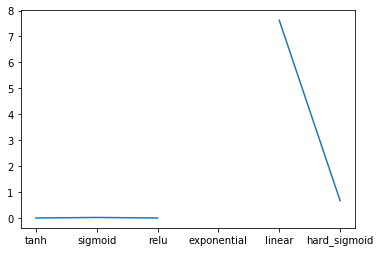

In [799]:
plt.plot(byod_scores_round3.loss_score)

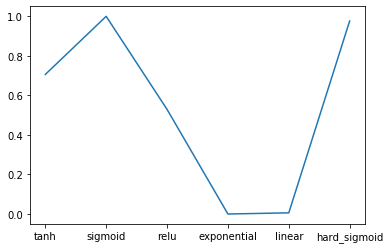

In [800]:
plt.plot(byod_scores_round3.accuracy)

##### Result
This test shows the sigmoid is the best activation.  

### Test for best optimizer

In [803]:
optimizers = ['SGD', 'adam', 'RMSprop', 'Adamax']

byod_scores_round4 = pd.DataFrame(np.zeros([4,2]), columns = ['loss_score', 'accuracy'], index = optimizers)

for i in optimizers:
    model = Sequential()
    model.add(Dense(10, input_dim=54, activation='sigmoid'))
    model.add(Dense(10, input_dim=54, activation='sigmoid'))
    model.add(Dense(10, input_dim=54, activation='sigmoid'))
    model.add(Dense(10, input_dim=54, activation='sigmoid'))
    model.add(Dense(1, activation= 'sigmoid'))
    model.summary()
    model.compile(loss='binary_crossentropy', optimizer=i, metrics = ['accuracy'])
    model.fit(byodX, byodY, batch_size=4, epochs=400) 
    byod_scores_round4.loc[i] = model.evaluate(byodX, byodY)

Model: "sequential_446"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1331 (Dense)           (None, 10)                550       
_________________________________________________________________
dense_1332 (Dense)           (None, 10)                110       
_________________________________________________________________
dense_1333 (Dense)           (None, 10)                110       
_________________________________________________________________
dense_1334 (Dense)           (None, 10)                110       
_________________________________________________________________
dense_1335 (Dense)           (None, 1)                 11        
Total params: 891
Trainable params: 891
Non-trainable params: 0
_________________________________________________________________
Epoch 1/400
170/170 [==============================] - 0s 1ms/step - loss: 0.8207 - accuracy: 0.4941
Epoch 2/400
170/170

170/170 [==============================] - 0s 488us/step - loss: 0.6908 - accuracy: 0.5647
Epoch 71/400
170/170 [==============================] - 0s 443us/step - loss: 0.6910 - accuracy: 0.5235
Epoch 72/400
170/170 [==============================] - 0s 430us/step - loss: 0.6906 - accuracy: 0.6412
Epoch 73/400
170/170 [==============================] - 0s 417us/step - loss: 0.6907 - accuracy: 0.5353
Epoch 74/400
170/170 [==============================] - 0s 443us/step - loss: 0.6901 - accuracy: 0.6176
Epoch 75/400
170/170 [==============================] - 0s 413us/step - loss: 0.6903 - accuracy: 0.5118
Epoch 76/400
170/170 [==============================] - 0s 438us/step - loss: 0.6904 - accuracy: 0.6176
Epoch 77/400
170/170 [==============================] - 0s 424us/step - loss: 0.6902 - accuracy: 0.5059
Epoch 78/400
170/170 [==============================] - 0s 419us/step - loss: 0.6901 - accuracy: 0.5059
Epoch 79/400
170/170 [==============================] - 0s 419us/step - loss:

170/170 [==============================] - 0s 429us/step - loss: 0.6817 - accuracy: 0.7588
Epoch 149/400
170/170 [==============================] - 0s 452us/step - loss: 0.6812 - accuracy: 0.9118
Epoch 150/400
170/170 [==============================] - 0s 440us/step - loss: 0.6816 - accuracy: 0.6353
Epoch 151/400
170/170 [==============================] - 0s 419us/step - loss: 0.6809 - accuracy: 0.5824
Epoch 152/400
170/170 [==============================] - 0s 435us/step - loss: 0.6806 - accuracy: 0.6118
Epoch 153/400
170/170 [==============================] - 0s 492us/step - loss: 0.6802 - accuracy: 0.7824
Epoch 154/400
170/170 [==============================] - 0s 490us/step - loss: 0.6801 - accuracy: 0.6412
Epoch 155/400
170/170 [==============================] - 0s 482us/step - loss: 0.6801 - accuracy: 0.5118
Epoch 156/400
170/170 [==============================] - 0s 449us/step - loss: 0.6794 - accuracy: 0.6529
Epoch 157/400
170/170 [==============================] - 0s 465us/ste

170/170 [==============================] - 0s 471us/step - loss: 0.5961 - accuracy: 0.9765
Epoch 227/400
170/170 [==============================] - 0s 511us/step - loss: 0.5928 - accuracy: 0.9765
Epoch 228/400
170/170 [==============================] - 0s 479us/step - loss: 0.5888 - accuracy: 0.9765
Epoch 229/400
170/170 [==============================] - 0s 465us/step - loss: 0.5846 - accuracy: 0.9765
Epoch 230/400
170/170 [==============================] - 0s 980us/step - loss: 0.5805 - accuracy: 0.9706
Epoch 231/400
170/170 [==============================] - 0s 802us/step - loss: 0.5760 - accuracy: 0.9765
Epoch 232/400
170/170 [==============================] - 0s 422us/step - loss: 0.5716 - accuracy: 0.9706
Epoch 233/400
170/170 [==============================] - 0s 487us/step - loss: 0.5668 - accuracy: 0.9765
Epoch 234/400
170/170 [==============================] - 0s 496us/step - loss: 0.5620 - accuracy: 0.9765
Epoch 235/400
170/170 [==============================] - 0s 462us/ste

170/170 [==============================] - 0s 543us/step - loss: 0.1274 - accuracy: 0.9824
Epoch 305/400
170/170 [==============================] - 0s 586us/step - loss: 0.1250 - accuracy: 0.9824
Epoch 306/400
170/170 [==============================] - 0s 503us/step - loss: 0.1226 - accuracy: 0.9824
Epoch 307/400
170/170 [==============================] - 0s 412us/step - loss: 0.1203 - accuracy: 0.9824
Epoch 308/400
170/170 [==============================] - 0s 455us/step - loss: 0.1181 - accuracy: 0.9824
Epoch 309/400
170/170 [==============================] - 0s 477us/step - loss: 0.1160 - accuracy: 0.9824
Epoch 310/400
170/170 [==============================] - 0s 425us/step - loss: 0.1141 - accuracy: 0.9824
Epoch 311/400
170/170 [==============================] - 0s 439us/step - loss: 0.1118 - accuracy: 0.9824
Epoch 312/400
170/170 [==============================] - 0s 455us/step - loss: 0.1099 - accuracy: 0.9824
Epoch 313/400
170/170 [==============================] - 0s 424us/ste

170/170 [==============================] - 0s 619us/step - loss: 0.0337 - accuracy: 1.0000
Epoch 383/400
170/170 [==============================] - 0s 403us/step - loss: 0.0332 - accuracy: 1.0000
Epoch 384/400
170/170 [==============================] - 0s 481us/step - loss: 0.0328 - accuracy: 1.0000
Epoch 385/400
170/170 [==============================] - 0s 488us/step - loss: 0.0323 - accuracy: 1.0000
Epoch 386/400
170/170 [==============================] - 0s 450us/step - loss: 0.0319 - accuracy: 1.0000
Epoch 387/400
170/170 [==============================] - 0s 429us/step - loss: 0.0314 - accuracy: 1.0000
Epoch 388/400
170/170 [==============================] - 0s 457us/step - loss: 0.0310 - accuracy: 1.0000
Epoch 389/400
170/170 [==============================] - 0s 425us/step - loss: 0.0306 - accuracy: 1.0000
Epoch 390/400
170/170 [==============================] - 0s 430us/step - loss: 0.0302 - accuracy: 1.0000
Epoch 391/400
170/170 [==============================] - 0s 469us/ste

170/170 [==============================] - 0s 1ms/step - loss: 0.0203 - accuracy: 1.0000
Epoch 51/400
170/170 [==============================] - 0s 813us/step - loss: 0.0194 - accuracy: 1.0000
Epoch 52/400
170/170 [==============================] - 0s 606us/step - loss: 0.0187 - accuracy: 1.0000
Epoch 53/400
170/170 [==============================] - 0s 501us/step - loss: 0.0179 - accuracy: 1.0000
Epoch 54/400
170/170 [==============================] - 0s 560us/step - loss: 0.0172 - accuracy: 1.0000
Epoch 55/400
170/170 [==============================] - 0s 542us/step - loss: 0.0166 - accuracy: 1.0000
Epoch 56/400
170/170 [==============================] - 0s 551us/step - loss: 0.0159 - accuracy: 1.0000
Epoch 57/400
170/170 [==============================] - 0s 545us/step - loss: 0.0153 - accuracy: 1.0000
Epoch 58/400
170/170 [==============================] - 0s 552us/step - loss: 0.0148 - accuracy: 1.0000
Epoch 59/400
170/170 [==============================] - 0s 555us/step - loss: 0

170/170 [==============================] - 0s 582us/step - loss: 0.0021 - accuracy: 1.0000
Epoch 129/400
170/170 [==============================] - 0s 606us/step - loss: 0.0020 - accuracy: 1.0000
Epoch 130/400
170/170 [==============================] - 0s 639us/step - loss: 0.0020 - accuracy: 1.0000
Epoch 131/400
170/170 [==============================] - 0s 529us/step - loss: 0.0019 - accuracy: 1.0000
Epoch 132/400
170/170 [==============================] - 0s 567us/step - loss: 0.0019 - accuracy: 1.0000
Epoch 133/400
170/170 [==============================] - 0s 691us/step - loss: 0.0018 - accuracy: 1.0000
Epoch 134/400
170/170 [==============================] - 0s 774us/step - loss: 0.0018 - accuracy: 1.0000
Epoch 135/400
170/170 [==============================] - 0s 679us/step - loss: 0.0018 - accuracy: 1.0000
Epoch 136/400
170/170 [==============================] - 0s 761us/step - loss: 0.0017 - accuracy: 1.0000
Epoch 137/400
170/170 [==============================] - 0s 732us/ste

170/170 [==============================] - 0s 568us/step - loss: 3.7998e-04 - accuracy: 1.0000
Epoch 205/400
170/170 [==============================] - 0s 567us/step - loss: 3.7186e-04 - accuracy: 1.0000
Epoch 206/400
170/170 [==============================] - 0s 562us/step - loss: 3.6390e-04 - accuracy: 1.0000
Epoch 207/400
170/170 [==============================] - 0s 507us/step - loss: 3.5609e-04 - accuracy: 1.0000
Epoch 208/400
170/170 [==============================] - 0s 563us/step - loss: 3.4846e-04 - accuracy: 1.0000
Epoch 209/400
170/170 [==============================] - 0s 2ms/step - loss: 3.4103e-04 - accuracy: 1.0000
Epoch 210/400
170/170 [==============================] - 0s 493us/step - loss: 3.3369e-04 - accuracy: 1.0000
Epoch 211/400
170/170 [==============================] - 0s 738us/step - loss: 3.2656e-04 - accuracy: 1.0000
Epoch 212/400
170/170 [==============================] - ETA: 0s - loss: 3.1413e-04 - accuracy: 1.00 - 0s 979us/step - loss: 3.1957e-04 - accura

170/170 [==============================] - 0s 713us/step - loss: 7.7861e-05 - accuracy: 1.0000
Epoch 279/400
170/170 [==============================] - 0s 552us/step - loss: 7.6224e-05 - accuracy: 1.0000
Epoch 280/400
170/170 [==============================] - 0s 546us/step - loss: 7.4612e-05 - accuracy: 1.0000
Epoch 281/400
170/170 [==============================] - 0s 545us/step - loss: 7.3038e-05 - accuracy: 1.0000
Epoch 282/400
170/170 [==============================] - 0s 552us/step - loss: 7.1511e-05 - accuracy: 1.0000
Epoch 283/400
170/170 [==============================] - 0s 532us/step - loss: 6.9997e-05 - accuracy: 1.0000
Epoch 284/400
170/170 [==============================] - 0s 552us/step - loss: 6.8530e-05 - accuracy: 1.0000
Epoch 285/400
170/170 [==============================] - 0s 533us/step - loss: 6.7088e-05 - accuracy: 1.0000
Epoch 286/400
170/170 [==============================] - ETA: 0s - loss: 6.5412e-05 - accuracy: 1.00 - 0s 629us/step - loss: 6.5676e-05 - accu

170/170 [==============================] - 0s 609us/step - loss: 1.6169e-05 - accuracy: 1.0000
Epoch 353/400
170/170 [==============================] - 0s 519us/step - loss: 1.5829e-05 - accuracy: 1.0000
Epoch 354/400
170/170 [==============================] - 0s 566us/step - loss: 1.5499e-05 - accuracy: 1.0000
Epoch 355/400
170/170 [==============================] - 0s 561us/step - loss: 1.5173e-05 - accuracy: 1.0000
Epoch 356/400
170/170 [==============================] - 0s 508us/step - loss: 1.4856e-05 - accuracy: 1.0000
Epoch 357/400
170/170 [==============================] - 0s 564us/step - loss: 1.4543e-05 - accuracy: 1.0000
Epoch 358/400
170/170 [==============================] - 0s 560us/step - loss: 1.4238e-05 - accuracy: 1.0000
Epoch 359/400
170/170 [==============================] - 0s 517us/step - loss: 1.3939e-05 - accuracy: 1.0000
Epoch 360/400
170/170 [==============================] - 0s 561us/step - loss: 1.3646e-05 - accuracy: 1.0000
Epoch 361/400
170/170 [==========

170/170 [==============================] - 0s 673us/step - loss: 0.2036 - accuracy: 0.9706
Epoch 18/400
170/170 [==============================] - 0s 1ms/step - loss: 0.1753 - accuracy: 0.9706
Epoch 19/400
170/170 [==============================] - 0s 815us/step - loss: 0.1524 - accuracy: 0.9765
Epoch 20/400
170/170 [==============================] - 0s 813us/step - loss: 0.1320 - accuracy: 0.9824
Epoch 21/400
170/170 [==============================] - 0s 836us/step - loss: 0.1150 - accuracy: 0.9824
Epoch 22/400
170/170 [==============================] - 0s 705us/step - loss: 0.1013 - accuracy: 0.9824
Epoch 23/400
170/170 [==============================] - 0s 657us/step - loss: 0.0897 - accuracy: 0.9882
Epoch 24/400
170/170 [==============================] - 0s 685us/step - loss: 0.0799 - accuracy: 0.9882
Epoch 25/400
170/170 [==============================] - 0s 524us/step - loss: 0.0720 - accuracy: 0.9882
Epoch 26/400
170/170 [==============================] - 0s 1ms/step - loss: 0.0

170/170 [==============================] - 0s 707us/step - loss: 6.9586e-07 - accuracy: 1.0000
Epoch 95/400
170/170 [==============================] - 0s 1ms/step - loss: 6.0359e-07 - accuracy: 1.0000
Epoch 96/400
170/170 [==============================] - 0s 988us/step - loss: 5.2385e-07 - accuracy: 1.0000
Epoch 97/400
170/170 [==============================] - 0s 807us/step - loss: 4.5860e-07 - accuracy: 1.0000
Epoch 98/400
170/170 [==============================] - 0s 702us/step - loss: 4.0426e-07 - accuracy: 1.0000
Epoch 99/400
170/170 [==============================] - 0s 783us/step - loss: 3.5735e-07 - accuracy: 1.0000
Epoch 100/400
170/170 [==============================] - 0s 735us/step - loss: 3.1728e-07 - accuracy: 1.0000
Epoch 101/400
170/170 [==============================] - 0s 742us/step - loss: 2.8383e-07 - accuracy: 1.0000
Epoch 102/400
170/170 [==============================] - 0s 728us/step - loss: 2.5381e-07 - accuracy: 1.0000
Epoch 103/400
170/170 [=================

170/170 [==============================] - 0s 607us/step - loss: 2.1283e-08 - accuracy: 1.0000
Epoch 170/400
170/170 [==============================] - 0s 535us/step - loss: 2.1170e-08 - accuracy: 1.0000
Epoch 171/400
170/170 [==============================] - 0s 536us/step - loss: 2.1062e-08 - accuracy: 1.0000
Epoch 172/400
170/170 [==============================] - 0s 443us/step - loss: 2.0941e-08 - accuracy: 1.0000
Epoch 173/400
170/170 [==============================] - 0s 528us/step - loss: 2.0837e-08 - accuracy: 1.0000
Epoch 174/400
170/170 [==============================] - 0s 490us/step - loss: 2.0728e-08 - accuracy: 1.0000
Epoch 175/400
170/170 [==============================] - 0s 510us/step - loss: 2.0629e-08 - accuracy: 1.0000
Epoch 176/400
170/170 [==============================] - 0s 497us/step - loss: 2.0534e-08 - accuracy: 1.0000
Epoch 177/400
170/170 [==============================] - 0s 509us/step - loss: 2.0449e-08 - accuracy: 1.0000
Epoch 178/400
170/170 [==========

170/170 [==============================] - 0s 802us/step - loss: 1.7395e-08 - accuracy: 1.0000
Epoch 245/400
170/170 [==============================] - 0s 793us/step - loss: 1.7375e-08 - accuracy: 1.0000
Epoch 246/400
170/170 [==============================] - 0s 814us/step - loss: 1.7360e-08 - accuracy: 1.0000
Epoch 247/400
170/170 [==============================] - 0s 607us/step - loss: 1.7332e-08 - accuracy: 1.0000
Epoch 248/400
170/170 [==============================] - 0s 575us/step - loss: 1.7318e-08 - accuracy: 1.0000
Epoch 249/400
170/170 [==============================] - 0s 601us/step - loss: 1.7302e-08 - accuracy: 1.0000
Epoch 250/400
170/170 [==============================] - 0s 556us/step - loss: 1.7280e-08 - accuracy: 1.0000
Epoch 251/400
170/170 [==============================] - 0s 1ms/step - loss: 1.7263e-08 - accuracy: 1.0000
Epoch 252/400
170/170 [==============================] - 0s 893us/step - loss: 1.7242e-08 - accuracy: 1.0000
Epoch 253/400
170/170 [============

170/170 [==============================] - 0s 496us/step - loss: 1.6356e-08 - accuracy: 1.0000
Epoch 320/400
170/170 [==============================] - 0s 568us/step - loss: 1.6352e-08 - accuracy: 1.0000
Epoch 321/400
170/170 [==============================] - 0s 537us/step - loss: 1.6338e-08 - accuracy: 1.0000
Epoch 322/400
170/170 [==============================] - 0s 526us/step - loss: 1.6334e-08 - accuracy: 1.0000
Epoch 323/400
170/170 [==============================] - 0s 511us/step - loss: 1.6322e-08 - accuracy: 1.0000
Epoch 324/400
170/170 [==============================] - 0s 555us/step - loss: 1.6315e-08 - accuracy: 1.0000
Epoch 325/400
170/170 [==============================] - 0s 496us/step - loss: 1.6306e-08 - accuracy: 1.0000
Epoch 326/400
170/170 [==============================] - 0s 875us/step - loss: 1.6293e-08 - accuracy: 1.0000
Epoch 327/400
170/170 [==============================] - 0s 525us/step - loss: 1.6292e-08 - accuracy: 1.0000
Epoch 328/400
170/170 [==========

170/170 [==============================] - 0s 755us/step - loss: 1.5807e-08 - accuracy: 1.0000
Epoch 395/400
170/170 [==============================] - 0s 705us/step - loss: 1.5802e-08 - accuracy: 1.0000
Epoch 396/400
170/170 [==============================] - 0s 603us/step - loss: 1.5799e-08 - accuracy: 1.0000
Epoch 397/400
170/170 [==============================] - 0s 608us/step - loss: 1.5792e-08 - accuracy: 1.0000
Epoch 398/400
170/170 [==============================] - 0s 813us/step - loss: 1.5787e-08 - accuracy: 1.0000
Epoch 399/400
170/170 [==============================] - 0s 798us/step - loss: 1.5789e-08 - accuracy: 1.0000
Epoch 400/400
170/170 [==============================] - 0s 247us/step
Model: "sequential_449"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1346 (Dense)           (None, 10)                550       
_________________________________________________________________
d

170/170 [==============================] - 0s 542us/step - loss: 0.0121 - accuracy: 1.0000
Epoch 63/400
170/170 [==============================] - 0s 524us/step - loss: 0.0115 - accuracy: 1.0000
Epoch 64/400
170/170 [==============================] - 0s 489us/step - loss: 0.0109 - accuracy: 1.0000
Epoch 65/400
170/170 [==============================] - 0s 510us/step - loss: 0.0103 - accuracy: 1.0000
Epoch 66/400
170/170 [==============================] - 0s 509us/step - loss: 0.0098 - accuracy: 1.0000
Epoch 67/400
170/170 [==============================] - 0s 490us/step - loss: 0.0093 - accuracy: 1.0000
Epoch 68/400
170/170 [==============================] - 0s 527us/step - loss: 0.0088 - accuracy: 1.0000
Epoch 69/400
170/170 [==============================] - 0s 551us/step - loss: 0.0084 - accuracy: 1.0000
Epoch 70/400
170/170 [==============================] - 0s 520us/step - loss: 0.0080 - accuracy: 1.0000
Epoch 71/400
170/170 [==============================] - 0s 555us/step - loss:

170/170 [==============================] - 0s 572us/step - loss: 3.5350e-04 - accuracy: 1.0000
Epoch 140/400
170/170 [==============================] - 0s 463us/step - loss: 3.3855e-04 - accuracy: 1.0000
Epoch 141/400
170/170 [==============================] - 0s 512us/step - loss: 3.2420e-04 - accuracy: 1.0000
Epoch 142/400
170/170 [==============================] - 0s 546us/step - loss: 3.1045e-04 - accuracy: 1.0000
Epoch 143/400
170/170 [==============================] - 0s 443us/step - loss: 2.9734e-04 - accuracy: 1.0000
Epoch 144/400
170/170 [==============================] - 0s 520us/step - loss: 2.8478e-04 - accuracy: 1.0000
Epoch 145/400
170/170 [==============================] - 0s 550us/step - loss: 2.7279e-04 - accuracy: 1.0000
Epoch 146/400
170/170 [==============================] - 0s 492us/step - loss: 2.6124e-04 - accuracy: 1.0000
Epoch 147/400
170/170 [==============================] - 0s 535us/step - loss: 2.5019e-04 - accuracy: 1.0000
Epoch 148/400
170/170 [==========

170/170 [==============================] - 0s 769us/step - loss: 1.4014e-05 - accuracy: 1.0000
Epoch 215/400
170/170 [==============================] - 0s 720us/step - loss: 1.3424e-05 - accuracy: 1.0000
Epoch 216/400
170/170 [==============================] - 0s 718us/step - loss: 1.2860e-05 - accuracy: 1.0000
Epoch 217/400
170/170 [==============================] - 0s 787us/step - loss: 1.2318e-05 - accuracy: 1.0000
Epoch 218/400
170/170 [==============================] - 0s 1ms/step - loss: 1.1801e-05 - accuracy: 1.0000
Epoch 219/400
170/170 [==============================] - 0s 1ms/step - loss: 1.1310e-05 - accuracy: 1.0000
Epoch 220/400
170/170 [==============================] - 0s 925us/step - loss: 1.0829e-05 - accuracy: 1.0000
Epoch 221/400
170/170 [==============================] - 0s 836us/step - loss: 1.0374e-05 - accuracy: 1.0000
Epoch 222/400
170/170 [==============================] - 0s 741us/step - loss: 9.9382e-06 - accuracy: 1.0000
Epoch 223/400
170/170 [==============

170/170 [==============================] - 0s 781us/step - loss: 5.6866e-07 - accuracy: 1.0000
Epoch 290/400
170/170 [==============================] - 0s 612us/step - loss: 5.4512e-07 - accuracy: 1.0000
Epoch 291/400
170/170 [==============================] - 0s 548us/step - loss: 5.2273e-07 - accuracy: 1.0000
Epoch 292/400
170/170 [==============================] - 0s 753us/step - loss: 5.0104e-07 - accuracy: 1.0000
Epoch 293/400
170/170 [==============================] - 0s 715us/step - loss: 4.8061e-07 - accuracy: 1.0000
Epoch 294/400
170/170 [==============================] - 0s 708us/step - loss: 4.6081e-07 - accuracy: 1.0000
Epoch 295/400
170/170 [==============================] - 0s 840us/step - loss: 4.4178e-07 - accuracy: 1.0000
Epoch 296/400
170/170 [==============================] - 0s 532us/step - loss: 4.2385e-07 - accuracy: 1.0000
Epoch 297/400
170/170 [==============================] - 0s 508us/step - loss: 4.0633e-07 - accuracy: 1.0000
Epoch 298/400
170/170 [==========

170/170 [==============================] - 0s 596us/step - loss: 3.0148e-08 - accuracy: 1.0000
Epoch 365/400
170/170 [==============================] - 0s 531us/step - loss: 2.8900e-08 - accuracy: 1.0000
Epoch 366/400
170/170 [==============================] - 0s 541us/step - loss: 2.7996e-08 - accuracy: 1.0000
Epoch 367/400
170/170 [==============================] - 0s 535us/step - loss: 2.7500e-08 - accuracy: 1.0000
Epoch 368/400
170/170 [==============================] - 0s 504us/step - loss: 2.7081e-08 - accuracy: 1.0000
Epoch 369/400
170/170 [==============================] - 0s 482us/step - loss: 2.6665e-08 - accuracy: 1.0000
Epoch 370/400
170/170 [==============================] - 0s 500us/step - loss: 2.6273e-08 - accuracy: 1.0000
Epoch 371/400
170/170 [==============================] - 0s 507us/step - loss: 2.5913e-08 - accuracy: 1.0000
Epoch 372/400
170/170 [==============================] - 0s 506us/step - loss: 2.5544e-08 - accuracy: 1.0000
Epoch 373/400
170/170 [==========

In [804]:
byod_scores_round4

,loss_score,accuracy
SGD,2.631481e-02,1.0
adam,5.783255e-06,1.0
RMSprop,1.578300e-08,1.0
Adamax,1.952085e-08,1.0


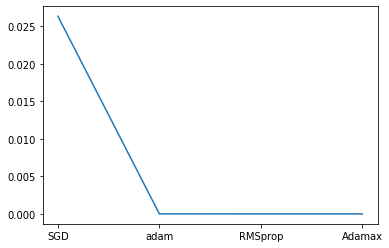

In [805]:
plt.plot(byod_scores_round4.loss_score)

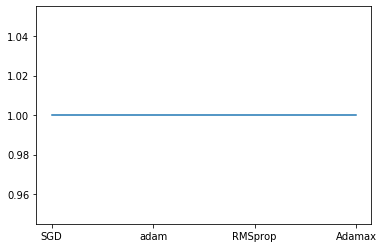

In [806]:
plt.plot(byod_scores_round4.accuracy)

#### Result
Adam, Adamax and RMSProp are the best optimizers.

### Final Result
According to my testing, the best model has 5 hidden layers, uses 10 neurons, uses the sigmoid activator and either the adam, adamax or RMSprop optimizer. This model produced a loss score of zero with 100% accuracy.